# Sommaire

### Introduction 
* Présentation de la mission
* Compréhension du sujet et analyse logique

### Partie 1 Importation des données 
* Présentation du jeu de données
 
### Partie 2 Analyse et nettoyage du jeu de données 
* Analyse du jeu de données
* Indicateurs pertinents du jeux de données
 
### Partie 3 Représentation des variables et analyse exploratoire
* Recherche et selection des indicateurs 
* Mise en forme des fichiers pour l'analyse de données
* Second tri de données
* Création du dataframe final
* Choix des pays candidats
* Evolution des pays choisis

# Introduction 
#### Présentation de la mission 

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.



Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :


* Quels sont les pays avec un fort potentiel de clients pour nos services ?
* Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
* Dans quels pays l'entreprise doit-elle opérer en priorité ?


**Votre mission**


Mark vous a donc demandé de réaliser une analyse pré-exploratoire de ce jeu de données. Il vous a transmis cet email à la suite de la réunion :


Hello,


Les données de la Banque mondiale sont disponibles à l’adresse suivante :


https://datacatalog.worldbank.org/dataset/education-statistics


Ou en téléchargement direct à ce lien.


Je te laisse regarder la page d'accueil qui décrit le jeu de données. En résumé, l’organisme “EdStats All Indicator Query” de la Banque mondiale répertorie 4000 indicateurs internationaux décrivant l’accès à l’éducation, l’obtention de diplômes et des informations relatives aux professeurs, aux dépenses liées à l’éducation... Tu trouveras plus d'info sur ce site :


http://datatopics.worldbank.org/education/




**Pour la pré-analyse, pourrais-tu :**


* Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
* Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
* Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
* Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)


Ton travail va nous permettre de déterminer si ce jeu de données peut informer les décisions d'ouverture vers de nouveaux pays. On va partager ton analyse avec le board, alors merci de soigner la présentation et de l'illustrer avec des graphiques pertinents et lisibles !

#### Compréhension du sujet et analyse logique

Aprés avoir chargé un dataset depuis le site de la banque mondiale, nous allons devoir explorer les fichiers afin de les nettoyer. Le but de ce nettoyage sera le tri des données indispensables et l'éviction des données inutiles. Cela nous permettra de prendre connaissance des informations globales contenues par les jeux de donnéees, mais aussi de repérer les différentes incohérences, les données manquantes ou dupliquées. L'analyse exploratoire nous permettra aussi de déterminer les données à conserver afin de répondre aux questions. 


**Problématique** : L'entreprise Academy a pour projet de s'étendre à l'international. Afin de sélectionner les sources lui permettant de valider l'étude, la mission est de déterminer la pertinence ou non des jeux de données sur l'éducation émanant de la banque mondiale. 


##### Les objectifs sont donc :
* Valider la qualité du jeu de données en repérant et traitant les données incohérentes, manquantes ou dupliquées
* Décrire le jeu de données et les informations contenus par ceux-ci
* Determination des données à exploiter et des indicateurs statistiques. 


##### Les compétences évaluées sont : 
* Effectuer une représentation graphique à l'aide d'une librairie Python adaptée
* Mettre en place un environnement Python
* Manipuler des données avec des librairies Python spécialisées
* Utiliser un notebook Jupyter pour faciliter la rédaction du code et la collaboration
* Maîtriser les opérations fondamentales du langage Python pour la Data Science

# Importation des données 

In [144]:
# importation des librairies
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import csv
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Versions 
print('Vérification de la mise à jour des librairies utilisées :')
print('Python: {}'.format(sys.version)) 
print('NumPy         : ' + np.version.full_version)
print('Pandas        : ' + pd.__version__)
print('Matplotlib    : ' + mpl.__version__)
print('Seaborn       : ' + sns.__version__)
print('csv           : ' + csv.__version__)
print('Geopandas     : ' + gpd.__version__)
print('sklearn       : ' + sklearn.__version__)

import datetime
now  = datetime.datetime.now().isoformat()
print('Lancé le      : ' + now)

Vérification de la mise à jour des librairies utilisées :
Python: 3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]
NumPy         : 1.24.1
Pandas        : 1.5.2
Matplotlib    : 3.6.2
Seaborn       : 0.12.1
csv           : 1.0
Geopandas     : 0.12.2
sklearn       : 1.2.0
Lancé le      : 2023-01-19T11:00:30.901116


In [2]:
#réglage de l'affichage de données
pd.set_option('display.max_row',250)
pd.set_option('display.max_column',70)
pd.set_option('display.precision', 5)

In [3]:
#Chargement du jeu de données

countries = pd.read_csv(r'EdStatsCountry.csv')
series = pd.read_csv(r'EdStatsSeries.csv')
donneesStat = pd.read_csv(r'EdStatsData.csv')
countrySeries = pd.read_csv(r'EdStatsCountry-Series.csv')
footNote = pd.read_csv(r'EdStatsFootNote.csv')

In [4]:
#Format de pourcentage avec 2 virgules en décimale
def format_percentage(value):
    return "{0:.2f}%".format(value * 100)


In [5]:
# Analyse du Data set et affichage des informations le concernant 

# Création d'un tableau donnant les informations principales des 5 fichiers
files_description = pd.DataFrame(columns = ["Nb lignes", "Nb colonnes", "Taux remplissage moyen", "Doublons", "Description"],
                                 index = ["EdStatsCountry.csv", 
                                          "EdStatsSeries.csv", 
                                          "EdStatsData.csv", 
                                          "EdStatsCountry-Series.csv", 
                                          "EdStatsFootNote.csv"])


# Description pour chacun des fichiers
files_description["Description"] = [
    "Informations géographique des pays, code iso-3166 alpha 2 et données sur les revenus, le niveau de vie du pays",
    "Descritption et thématique des indicateurs",
    "Données statistiques par indicateur par pays et par années",
    "Informations sur les indicateurs et leurs sources pour les pays ",
    "Référence de mise à jour des indicateurs, exceptions, incertitudes, données estimées"
]

# Remplissage du nombre de lignes pour chaque fichier
files_description["Nb lignes"] = [
    len(countries.index),
    len(series.index),
    len(donneesStat.index),
    len(countrySeries.index),
    len(footNote.index)
] 

# Remplissage du nombre de colonnes pour chaque fichier
files_description["Nb colonnes"] = [
    len(countries.columns),
    len(series.columns),
    len(donneesStat.columns),
    len(countrySeries.columns),
    len(footNote.columns)
]

#Remplissage du taux de remplissage moyen pour chaque fichier
files_description["Taux remplissage moyen"] = [
    format_percentage(countries.notna().mean().mean()),
    format_percentage(series.notna().mean().mean()),
    format_percentage(donneesStat.notna().mean().mean()),
    format_percentage(countrySeries.notna().mean().mean()),
    format_percentage(footNote.notna().mean().mean())
]

#Remplissage des doublons pour chaque fichier
files_description["Doublons"] = [
    countries.duplicated().sum(),
    series.duplicated().sum(),
    donneesStat.duplicated().sum(),
    countrySeries.duplicated().sum(),
    footNote.duplicated().sum(),
]
files_description
    

Nb lignes  Nb colonnes Taux remplissage moyen  \
EdStatsCountry.csv               241           32                 69.48%   
EdStatsSeries.csv               3665           21                 28.28%   
EdStatsData.csv               886930           70                 13.90%   
EdStatsCountry-Series.csv        613            4                 75.00%   
EdStatsFootNote.csv           643638            5                 80.00%   

                           Doublons  \
EdStatsCountry.csv                0   
EdStatsSeries.csv                 0   
EdStatsData.csv                   0   
EdStatsCountry-Series.csv         0   
EdStatsFootNote.csv               0   

                                                                 Description  
EdStatsCountry.csv         Informations géographique des pays, code iso-3...  
EdStatsSeries.csv                 Descritption et thématique des indicateurs  
EdStatsData.csv            Données statistiques par indicateur par pays e...  
EdStatsCountry-Series.csv  Informations sur les indicateurs et leurs sour...  
EdStatsFootNote.csv        Référence de mise à jour des indicateurs, exce...

## Analyse et nettoyage des données


### Analyse du jeux de données EdStatsCountry.csv    

In [6]:
#Comptage des lignes et des colonnes du fichier
lignes = len(countries.index)
colonnes = len(countries.columns)
print('Le nombre de lignes du fichier est de ', lignes, 'et de son nombre de colonnes est de', colonnes)

Le nombre de lignes du fichier est de  241 et de son nombre de colonnes est de 32


In [7]:
#Affichage des 3 premieres lignes du data set 
countries.head(3)

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   

  National accounts base year  National accounts reference year  \
0                        2000                               NaN   
1                     2002/03                               NaN   
2                        2002                               NaN   

                    SNA price valuation Lending category Other groups  \
0     Value added at basic prices (VAB)              NaN          NaN   
1     Value added at basic prices (VAB)              IDA         HIPC   
2  Value added at producer prices (VAP)             IBRD          NaN   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1993 System of National Accou...   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   
2                       1991–96            2005   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   
2  IMF Balance of Payments Manual, 6th edition.   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system   
1                         Actual  General trade system   
2                         Actual  Special trade system   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   

  Latest population census                            Latest household survey  \
0                     2010                                                NaN   
1                     1979  Multiple Indicator Cluster Survey (MICS), 2010/11   
2                     1970               Malaria Indicator Survey (MIS), 2011   

  Source of most recent Income and expenditure data  \
0                                               NaN   
1           Integrated household survey (IHS), 2008   
2           Integrated household survey (IHS), 2008   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   

   Latest industrial data  Latest trade data Latest water withdrawal data  \
0                     NaN             2012.0                          NaN   
1                     NaN             2012.0                         2000   
2                     NaN                NaN                         2005   

   Unnamed: 31  
0          NaN  
1          NaN  
2          NaN

In [8]:
#Affichage des colonnes
countries.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [9]:
#Résumé de variable qualitative
countries.describe(exclude=[np.number])

Country Code Short Name Table Name Long Name 2-alpha code  \
count           241        241        241       241          238   
unique          241        241        241       241          238   
top             ABW      Aruba      Aruba     Aruba           AW   
freq              1          1          1         1            1   

       Currency Unit                                      Special Notes  \
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   

                       Region         Income Group WB-2 code  \
count                     214                  214       240   
unique                      7                    5       240   
top     Europe & Central Asia  Upper middle income        AW   
freq                       57                   55         1   

       National accounts base year                SNA price valuation  \
count                          205                                197   
unique                          43                                  2   
top                           2005  Value added at basic prices (VAB)   
freq                            34                                163   

       Lending category Other groups  \
count               144           58   
unique                3            2   
top                IBRD         HIPC   
freq                 67           40   

                              System of National Accounts  \
count                                                 215   
unique                                                  3   
top     Country uses the 1993 System of National Accou...   
freq                                                  165   

       Alternative conversion factor PPP survey year  \
count                             47             145   
unique                            32               3   
top                          1990–95            2005   
freq                               8              98   

                   Balance of Payments Manual in use  \
count                                            181   
unique                                             1   
top     IMF Balance of Payments Manual, 6th edition.   
freq                                             181   

       External debt Reporting status       System of trade  \
count                             124                   200   
unique                              3                     2   
top                            Actual  General trade system   
freq                              107                   106   

          Government Accounting concept  \
count                               161   
unique                                2   
top     Consolidated central government   
freq                                 95   

                 IMF data dissemination standard Latest population census  \
count                                        181                      213   
unique                                         2                       27   
top     General Data Dissemination System (GDDS)                     2011   
freq                                         110                       59   

                Latest household survey  \
count                               141   
unique                               60   
top     World Health Survey (WHS), 2003   
freq                                 10   

       Source of most recent Income and expenditure data  \
count                                                160   
unique                                                75   
top              Integrated household survey (IHS), 2012   
freq                                                  15   

       Vital registration complete Latest agricultural census  \
count                          111

In [10]:
#Résumé de variable quantitative
countries.describe()

National accounts reference year  Latest industrial data  \
count                          32.00000               107.00000   
mean                         2001.53125              2008.10280   
std                             5.24856                 2.61683   
min                          1987.00000              2000.00000   
25%                          1996.75000              2007.50000   
50%                          2002.00000              2009.00000   
75%                          2005.00000              2010.00000   
max                          2012.00000              2010.00000   

       Latest trade data  Unnamed: 31  
count          185.00000          0.0  
mean          2010.99459          NaN  
std              2.56968          NaN  
min           1995.00000          NaN  
25%           2011.00000          NaN  
50%           2012.00000          NaN  
75%           2012.00000          NaN  
max           2012.00000          NaN

In [11]:
#Type de données pour chaque colonne
countries.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [12]:
#Affichage des colonnes pour lesquelles il manque des données en valeur absolue
nb_na = countries.isnull().sum()
nb_na[nb_na>0]

2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                                       96
Balance of Payments Manual in use                     60
External debt Reporting status                       117
System of trade                                       41
Government Accounting concept  

In [13]:
#Affichage des colonnes pour lesquelles il manque des données en pourcentage
nb_na = countries.isnull().mean()
nb_na[nb_na>0]

2-alpha code                                         0.01245
Currency Unit                                        0.10788
Special Notes                                        0.39834
Region                                               0.11203
Income Group                                         0.11203
WB-2 code                                            0.00415
National accounts base year                          0.14938
National accounts reference year                     0.86722
SNA price valuation                                  0.18257
Lending category                                     0.40249
Other groups                                         0.75934
System of National Accounts                          0.10788
Alternative conversion factor                        0.80498
PPP survey year                                      0.39834
Balance of Payments Manual in use                    0.24896
External debt Reporting status                       0.48548
System of trade         

In [14]:
#Comptage des valeurs nulles 
vnulles = countries.isnull().sum().sum()
nb_donnees_tot = np.product(countries.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 2354 valeurs manquantes pour  7712 valeurs, soit 30.52 %


[]

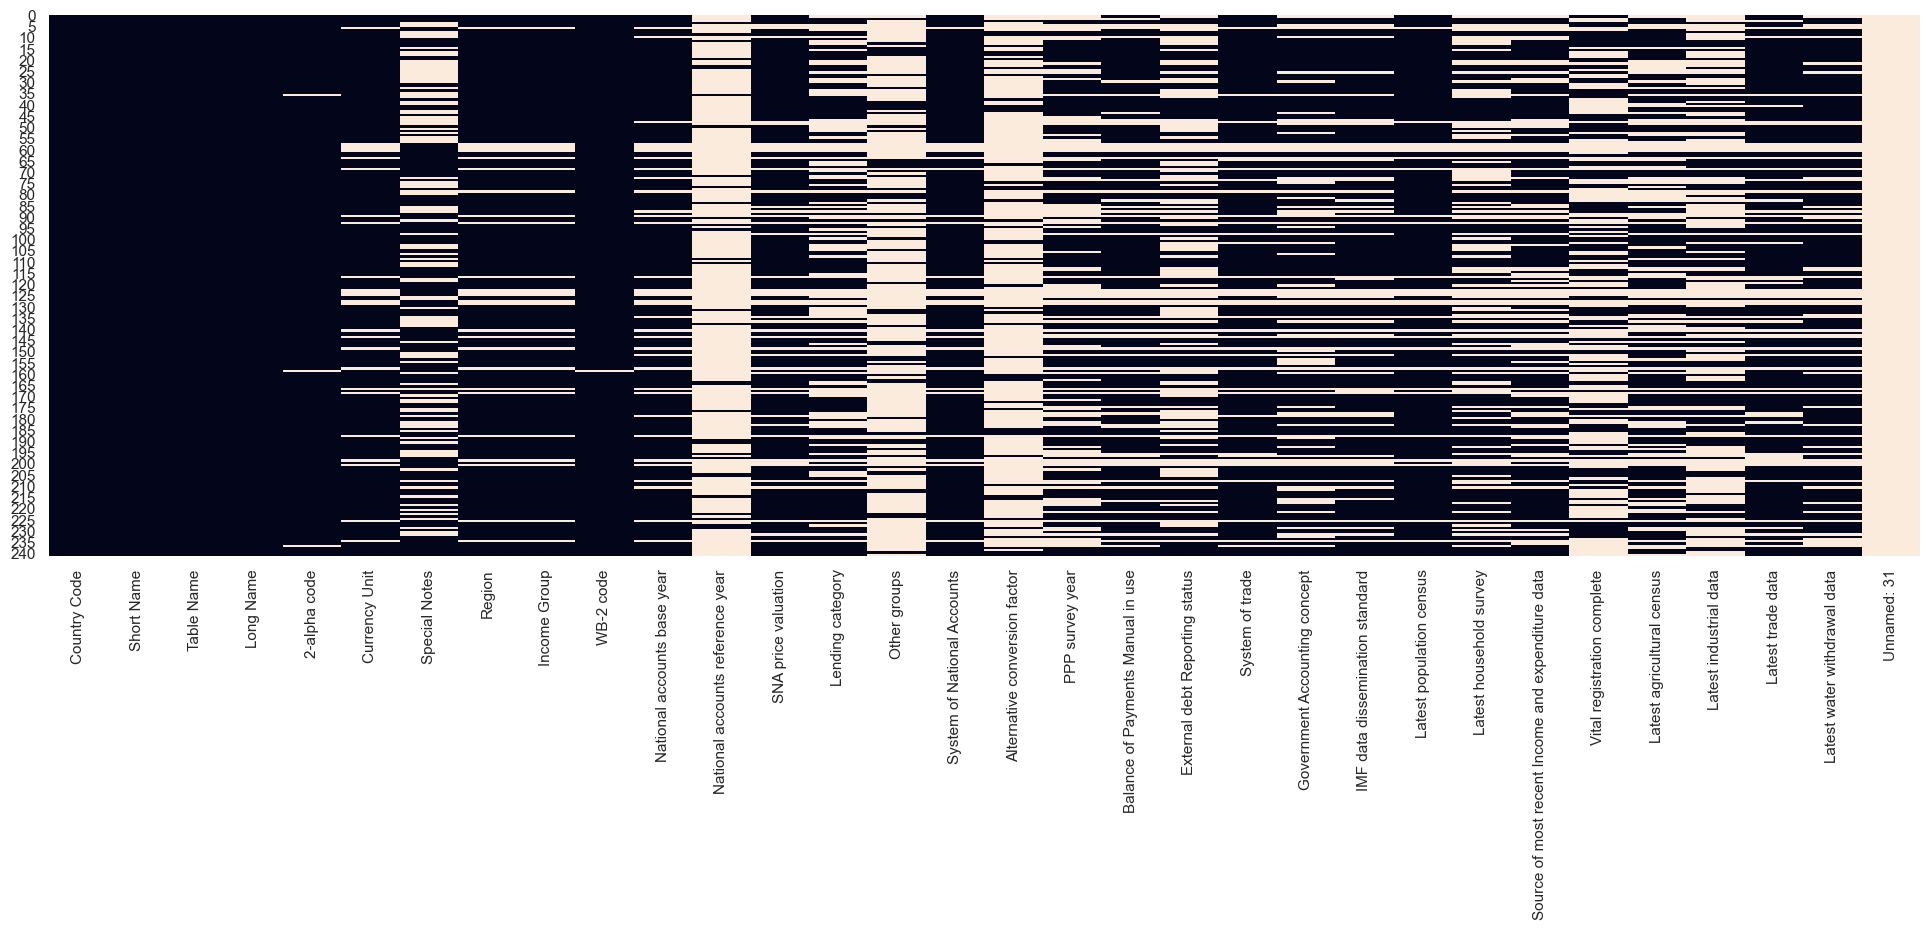

In [15]:
#Représentation graphique des données manquantes
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(countries.isnull(), cbar=False)
plt.rcParams.update({'font.size': 30})
plt.tight_layout()
plt.plot()

In [16]:
#Recherche des doublons sur la colonne Country Code
countries.loc[countries[['Country Code']].duplicated(keep=False),:]

Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data, Unnamed: 31]
Index: []

In [17]:
# Comptage des doublons sur la colonne Country Code en utilisant le resumé de variable quantitative
data = countries['Country Code'].value_counts()
data.describe()

count    241.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: Country Code, dtype: float64

In [18]:
#Traitement Nan
#Modification des NAN en autres
list_region = countries['Region'] = countries['Region'].replace(np.nan, 'Autres')
print('Region :\n' ,countries['Region'].unique())
#countries['Region'] = countries['Region'].replace(np.nan, 'Autres')
#print('Régions :\n',countries['Region'].unique())

Region :
 ['Latin America & Caribbean' 'South Asia' 'Sub-Saharan Africa'
 'Europe & Central Asia' 'Autres' 'Middle East & North Africa'
 'East Asia & Pacific' 'North America']


In [19]:
#Traitement Nan
#Modification des NAN en autres sur la colonne 2 alpha code
countries['2-alpha code'] = countries['2-alpha code'].replace(np.nan, 'Autres')
print('2-alpha code :\n',countries['2-alpha code'].unique())

2-alpha code :
 ['AW' 'AF' 'AO' 'AL' 'AD' '1A' 'AE' 'AR' 'AM' 'AS' 'AG' 'AU' 'AT' 'AZ'
 'BI' 'BE' 'BJ' 'BF' 'BD' 'BG' 'BH' 'BS' 'BA' 'BY' 'BZ' 'BM' 'BO' 'BR'
 'BB' 'BN' 'BT' 'BW' 'CF' 'CA' 'CH' 'Autres' 'CL' 'CN' 'CI' 'CM' 'CD' 'CG'
 'CO' 'KM' 'CV' 'CR' 'CU' 'CW' 'KY' 'CY' 'CZ' 'DE' 'DJ' 'DM' 'DK' 'DO'
 'DZ' '4E' 'Z4' '7E' 'Z7' 'EC' 'EG' 'XC' 'ER' 'ES' 'EE' 'ET' 'EU' 'FI'
 'FJ' 'FR' 'FO' 'FM' 'GA' 'GB' 'GE' 'GH' 'GI' 'GN' 'GM' 'GW' 'GQ' 'GR'
 'GD' 'GL' 'GT' 'GU' 'GY' 'XD' 'HK' 'HN' 'XE' 'HR' 'HT' 'HU' 'ID' 'IM'
 'IN' 'IE' 'IR' 'IQ' 'IS' 'IL' 'IT' 'JM' 'JO' 'JP' 'KZ' 'KE' 'KG' 'KH'
 'KI' 'KN' 'KR' 'KW' 'XJ' 'LA' 'LB' 'LR' 'LY' 'LC' 'ZJ' 'XL' 'XM' 'LI'
 'LK' 'XN' 'XO' 'LS' 'LT' 'LU' 'LV' 'MO' 'MF' 'MA' 'MC' 'MD' 'MG' 'MV'
 'ZQ' 'MX' 'MH' 'XP' 'MK' 'ML' 'MT' 'MM' 'XQ' 'ME' 'MN' 'MP' 'MZ' 'MR'
 'MU' 'MW' 'MY' 'XU' 'NC' 'NE' 'NG' 'NI' 'NL' 'NO' 'NP' 'NR' 'NZ' 'OE'
 'OM' 'PK' 'PA' 'PE' 'PH' 'PW' 'PG' 'PL' 'PR' 'KP' 'PT' 'PY' 'PS' 'PF'
 'QA' 'RO' 'RU' 'RW' '8S' 'SA' 'SD' 'SN' 'SG' 'SB' 'SL' '

In [20]:
# Regroupement des colonnes par Région et par type de revenus
regions = countries.groupby(['Region']).size().reset_index()
regions.columns = ['Region','Short Name']
revenu = countries.groupby(['Income Group']).size().reset_index()
revenu.columns = ['Income Group', 'Short Name']

In [21]:
#liste des pays présents dans Région
list_countries = countries[~countries['Short Name'].isin(list_region)]['Short Name'].unique().tolist()
print(list_countries)

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'East Asia & Pacific (developing only)', 'East Asia & Pacific (all income levels)', 'Europe & Central Asia (developing only)', 'Europe & Central Asia (all income levels)', 'Ecuador', 'Egypt', 'Euro area', 'Eritrea', 'Spain', 'Estonia', 'E

In [22]:
#création d'un df_list_countries pour un usage ultérieur
df_list_countries = pd.DataFrame (list_countries, columns = ['Country Name'])

<function matplotlib.pyplot.show(close=None, block=None)>

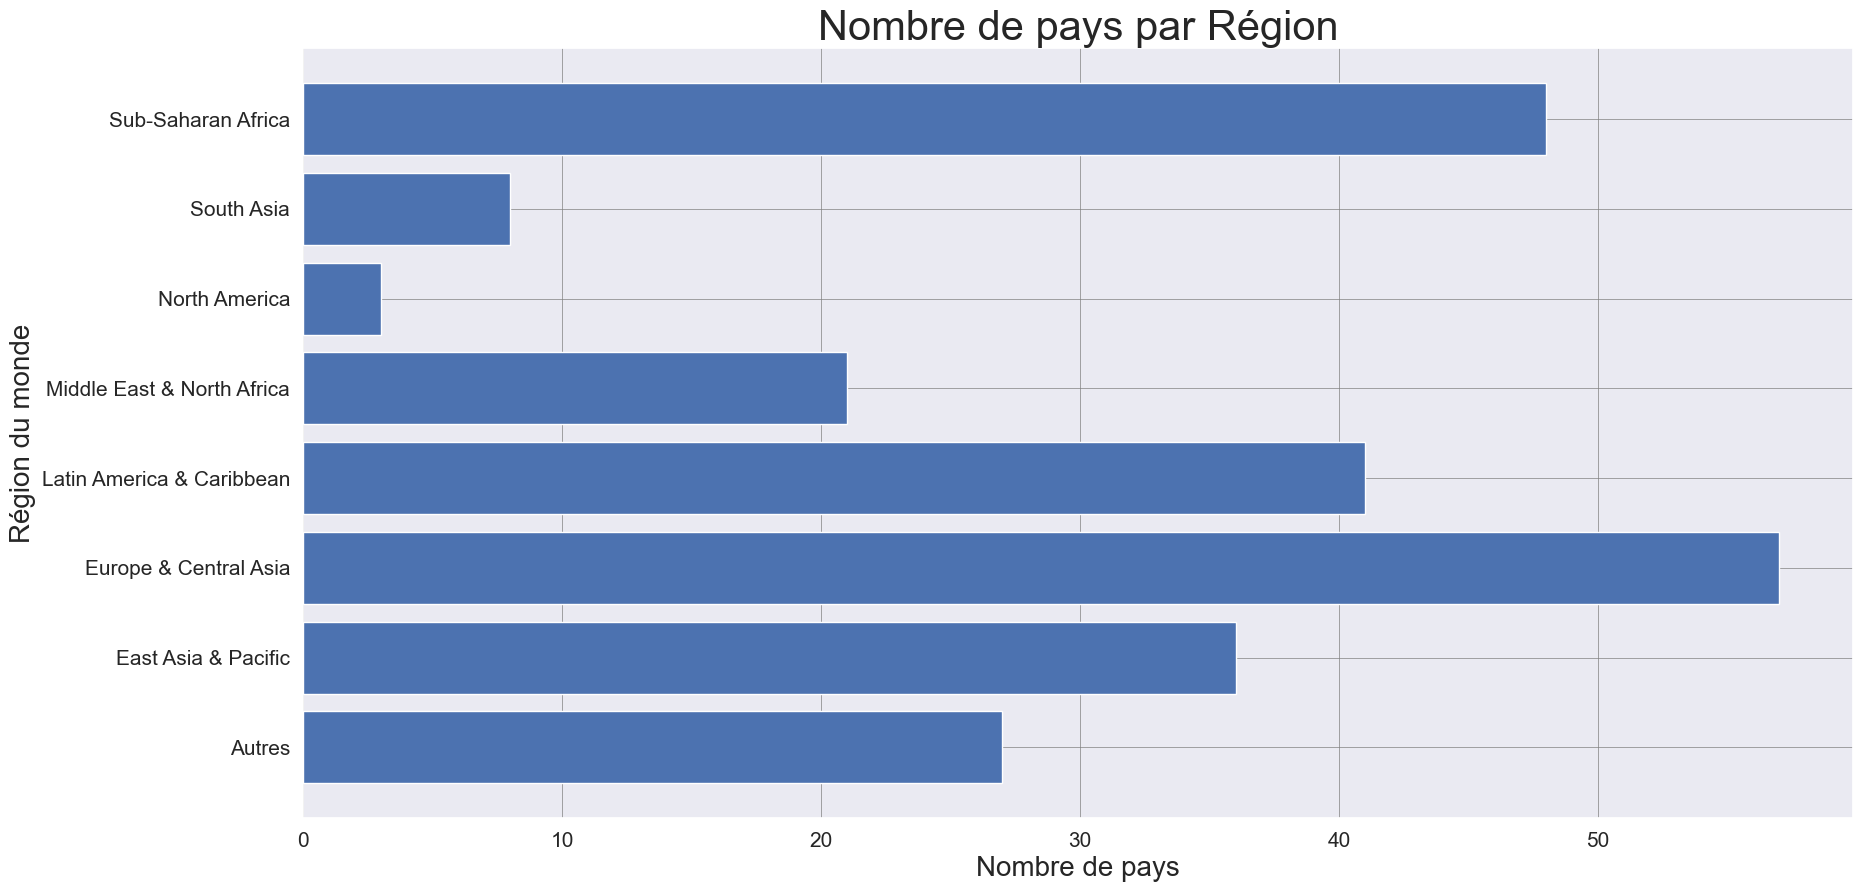

In [23]:
#Visuel du Nombre de pays par Région
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
plt.barh(regions['Region'], regions['Short Name'])
plt.ylabel('Région du monde', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Nombre de pays', fontsize=20)
plt.xticks(fontsize=15)
plt.title('Nombre de pays par Région', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

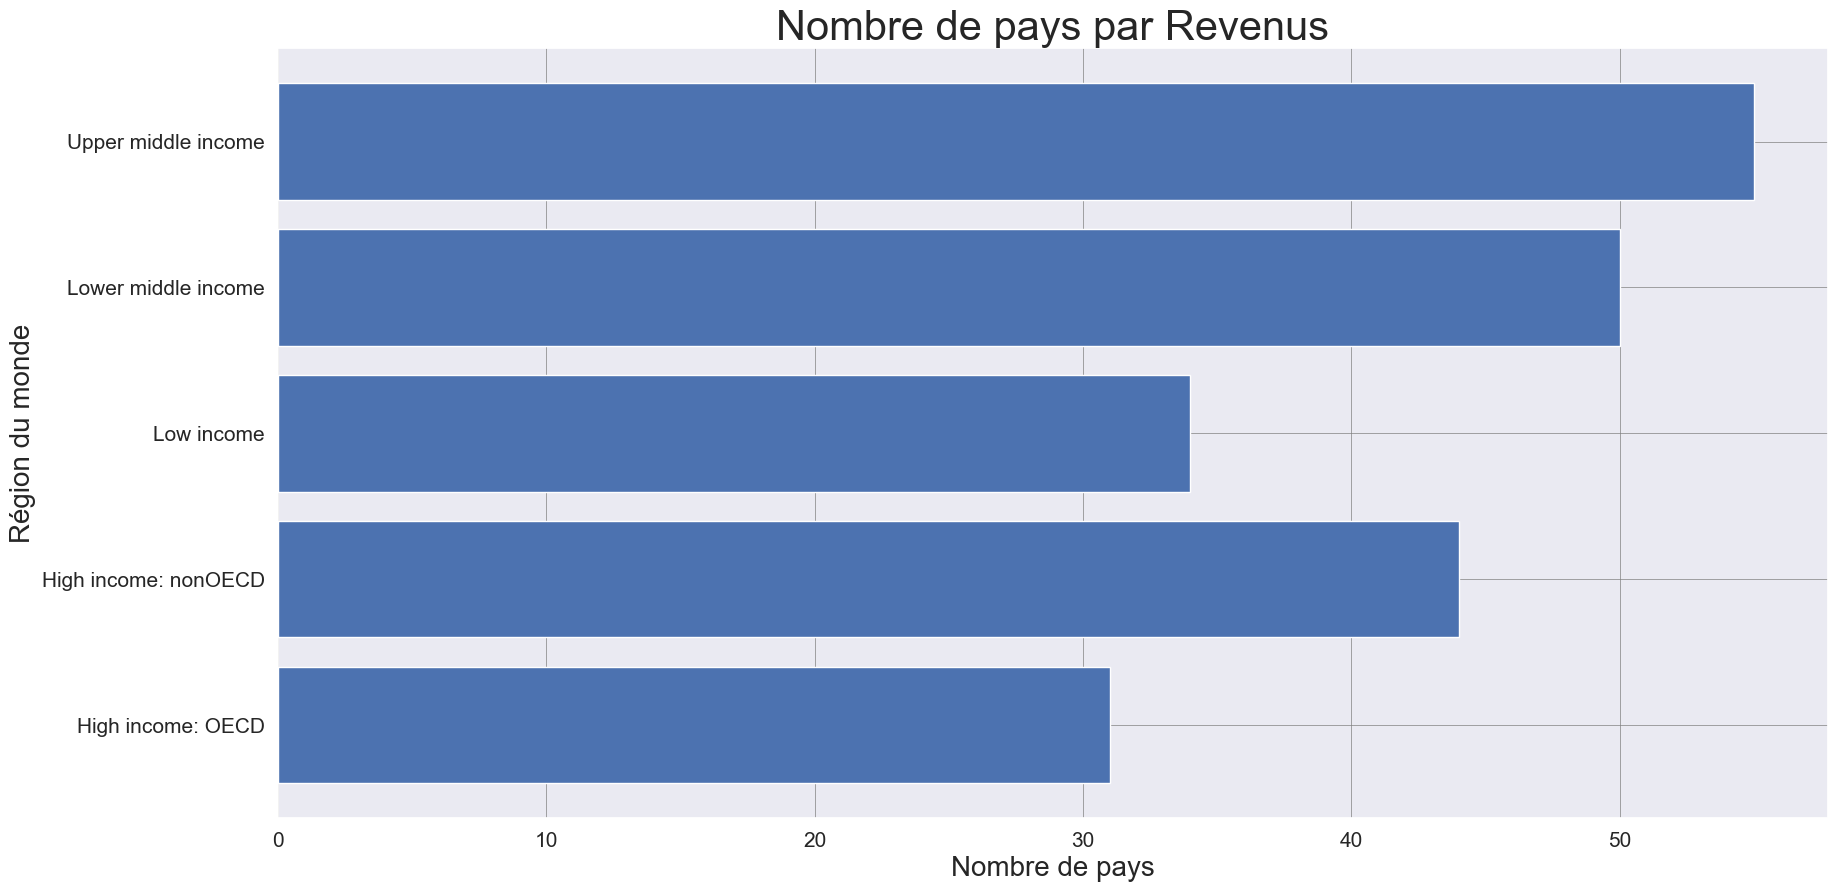

In [24]:
#Visuel du Nombre de pays par revenus
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
plt.barh(revenu['Income Group'], revenu['Short Name'])
plt.ylabel('Région du monde', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Nombre de pays', fontsize=20)
plt.xticks(fontsize=15)
plt.title('Nombre de pays par Revenus', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show

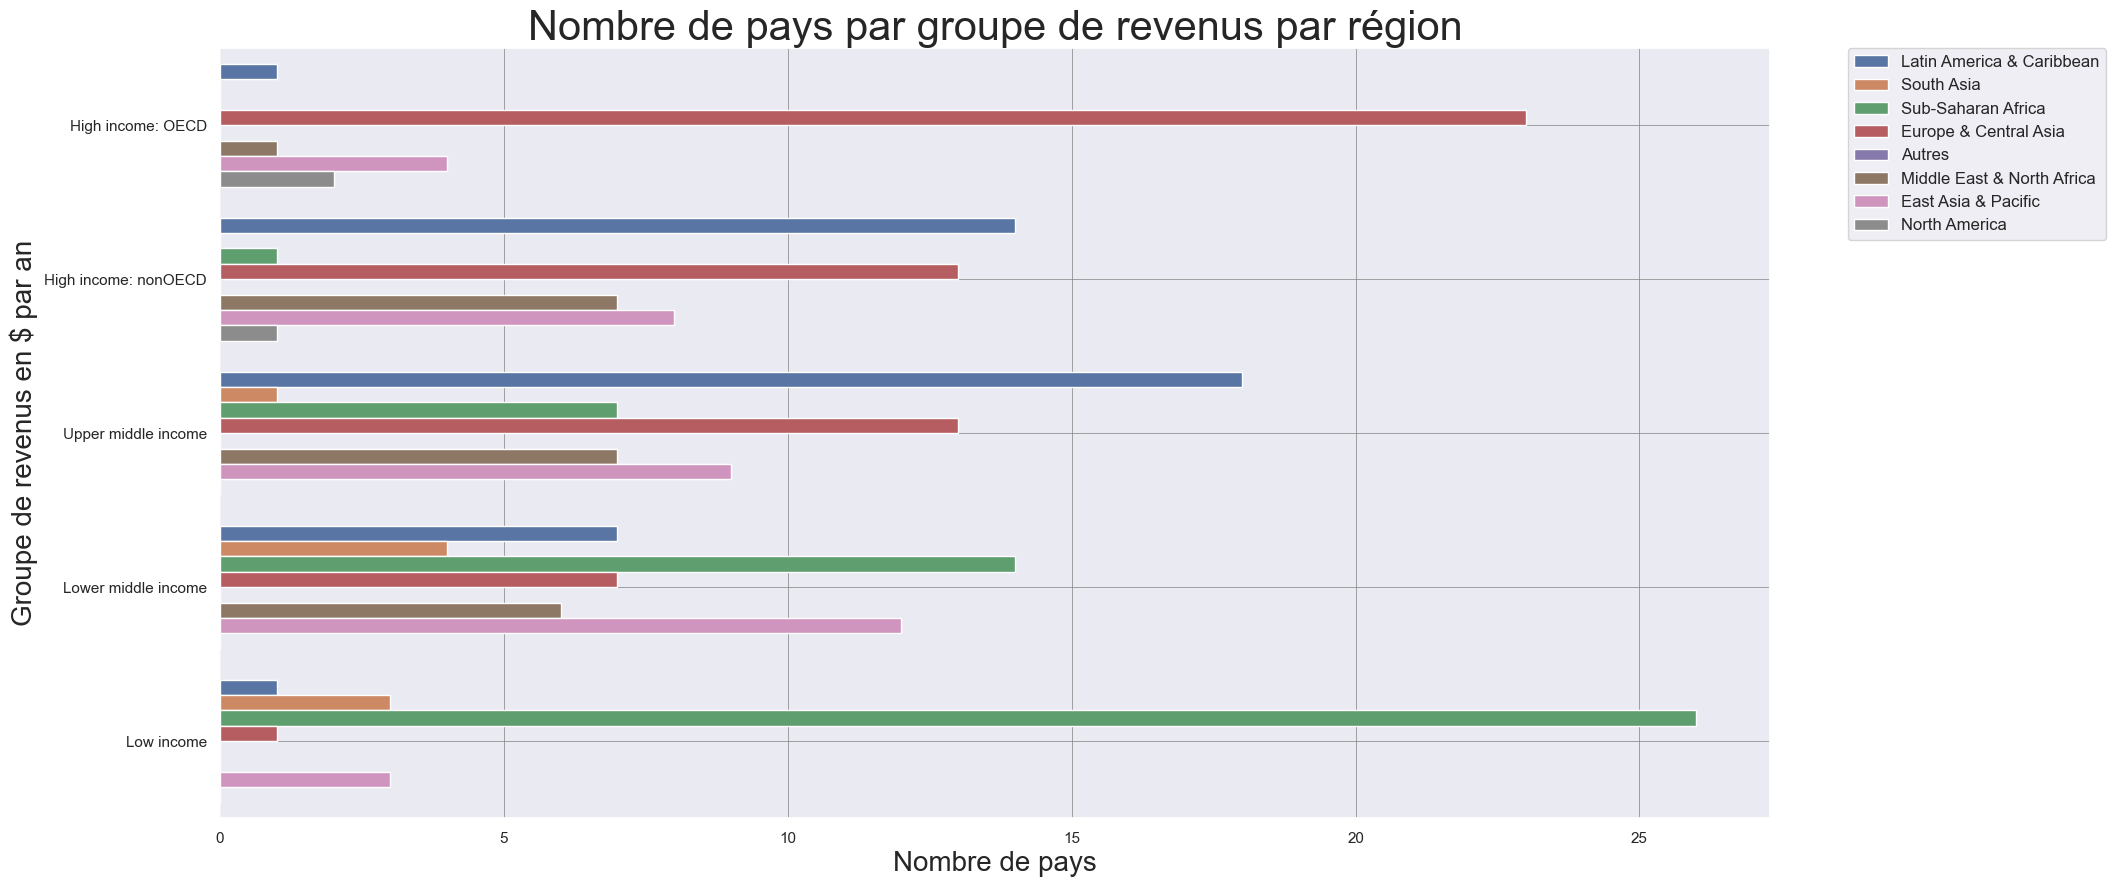

In [25]:
# Regroupement des pays par catégorie de revenus et presentation par Région
plt.figure(figsize=(20,10))
sns.countplot(y='Income Group', hue='Region', data=countries, orient='h',
                   order=['High income: OECD', 'High income: nonOECD', 'Upper middle income', 'Lower middle income', 'Low income'])
plt.xlabel('Nombre de pays', fontsize=20)
plt.ylabel('Groupe de revenus en $ par an', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
plt.title('Nombre de pays par groupe de revenus par région', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show()

##### **Analyse du jeu de données EdStatsCountry.csv**


* Le data set contient les informations géographiques des pays, code iso-3166 alpha 2 et les données sur les catégories de revenus, le niveau de vie du pays, les dates des différentes études menées par la banque mondiale dans les pays. 

* Le data set fait 241 lignes pour 32 colonnes.


    * Il est notable que le dataset est classé par son country code, correspondant au code court du pays, et qu'il fait donc 241 lignes, or l'ONU décompte 193 pays dans le monde, nous avons ainsi 48 entrées de plus dans la variable Country Code. Les pays en plus (241 dans EdStatsCountry.csv et de 211 dans le jeu de données EdStatsCountry-Series.csv) sont des noms de région ou de regroupement de revenus ou certains regroupement de pays (European Union, Arab world..) et certains pays devenus autonomes (Curaçao).

* La colonne National accounts reference year est en float64, elle devrait être en int64, toutefois, les données contenus ne sont pas utiles pour notre étude
* Le jeu de données contient 2354 valeurs manquantes pour  7712 valeurs, soit 30.52 % de valeurs vides
* Le jeu de données est cohérent, et il ne présente pas de doublons.
* Les données manquantes des colonnes Region et 2-alpha code ont été remplacées par des données 'Autres'
* Le groupe revenu prend en compte les informations suivantes : 
    * Low Income : < à 1036 \$ par an
    * Lower middle income de 1 036 \$ à 4 045 \$ par an
    * Upper middle income de 4 045 \$ à 12 535 \$ par an
    * High income > 12535 \$ par an
    





## Analyse du jeux de données EdStatsSeries.csv


In [26]:
#Comptage des lignes et des colonnes du fichier
lignes = len(series.index)
colonnes = len(series.columns)
print('Le nombre de lignes du fichier est de', lignes, 'et de son nombre de colonnes est de', colonnes)

Le nombre de lignes du fichier est de 3665 et de son nombre de colonnes est de 21


In [27]:
#Affichage des 3 premières lignes du data set 
series.head(3)

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  \
0                  NaN              NaN                 NaN           NaN   
1                  NaN              NaN                 NaN           NaN   
2                  NaN              NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN

In [28]:
#Affichage des colonnes
series.columns

Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')

In [29]:
#Résumé de variable qualitative
series.describe(exclude=[np.number])

Series Code              Topic  \
count                  3665               3665   
unique                 3665                 37   
top     BAR.NOED.1519.FE.ZS  Learning Outcomes   
freq                      1               1046   

                                           Indicator Name  \
count                                                3665   
unique                                               3665   
top     Barro-Lee: Percentage of female population age...   
freq                                                    1   

                                         Short definition  \
count                                                2156   
unique                                               1169   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
freq                                                  215   

                                          Long definition Periodicity  \
count                                                3665          99   
unique                                               2060           1   
top     Data Interpretation: 1=Latent; 2=Emerging; 3=E...      Annual   
freq                                                  215          99   

                       Base Period Other notes Aggregation method  \
count                          314         552                 47   
unique                           4          14                  3   
top     Projections (2010 to 2100)        EGRA   Weighted average   
freq                           308         403                 31   

                               Limitations and exceptions  \
count                                                  14   
unique                                                  9   
top     Data should be used cautiously because of diff...   
freq                                                    3   

                                         General comments  \
count                                                  14   
unique                                                  8   
top     When NEET rates are available for more than tw...   
freq                                                    3   

                                 Source Statistical concept and methodology  \
count                              3665                                  23   
unique                               31                                   2   
top     UNESCO Institute for Statistics                               TIMSS   
freq                               1269                                  20   

                                    Development relevance  \
count                                                   3   
unique                                                  1   
top     Unemployment and total employment are the broa...   
freq                                                    3   

                        Related source links  
count                                    215  
unique                                     1  
top     http://saber.worldbank.org/index.cfm  
freq                                     215

In [30]:
#Résumé de variable quantitative
series.describe()

Unit of measure  Notes from original source  Other web links  \
count              0.0                         0.0              0.0   
mean               NaN                         NaN              NaN   
std                NaN                         NaN              NaN   
min                NaN                         NaN              NaN   
25%                NaN                         NaN              NaN   
50%                NaN                         NaN              NaN   
75%                NaN                         NaN              NaN   
max                NaN                         NaN              NaN   

       Related indicators  License Type  Unnamed: 20  
count                 0.0           0.0          0.0  
mean                  NaN           NaN          NaN  
std                   NaN           NaN          NaN  
min                   NaN           NaN          NaN  
25%                   NaN           NaN          NaN  
50%                   NaN           NaN          NaN  
75%                   NaN           NaN          NaN  
max                   NaN           NaN          NaN

In [31]:
#Type de données pour chaque colonne
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
Unnamed: 20                            float64
dtype: object

In [32]:
#Affichage des colonnes pour lesquelles il manque des données
nb_na = series.isnull().sum()
nb_na[nb_na>0]

Short definition                       1509
Unit of measure                        3665
Periodicity                            3566
Base Period                            3351
Other notes                            3113
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Statistical concept and methodology    3642
Development relevance                  3662
Related source links                   3450
Other web links                        3665
Related indicators                     3665
License Type                           3665
Unnamed: 20                            3665
dtype: int64

In [33]:
#Affichage des colonnes pour lesquelles il manque des données
nb_na = series.isnull().mean()
nb_na[nb_na>0]

Short definition                       0.41173
Unit of measure                        1.00000
Periodicity                            0.97299
Base Period                            0.91432
Other notes                            0.84939
Aggregation method                     0.98718
Limitations and exceptions             0.99618
Notes from original source             1.00000
General comments                       0.99618
Statistical concept and methodology    0.99372
Development relevance                  0.99918
Related source links                   0.94134
Other web links                        1.00000
Related indicators                     1.00000
License Type                           1.00000
Unnamed: 20                            1.00000
dtype: float64

In [34]:
# Comptage des valeurs nulles
vnulles = series.isnull().sum().sum()
nb_donnees_tot = np.product(series.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 55203 valeurs manquantes pour  76965 valeurs, soit 71.72 %


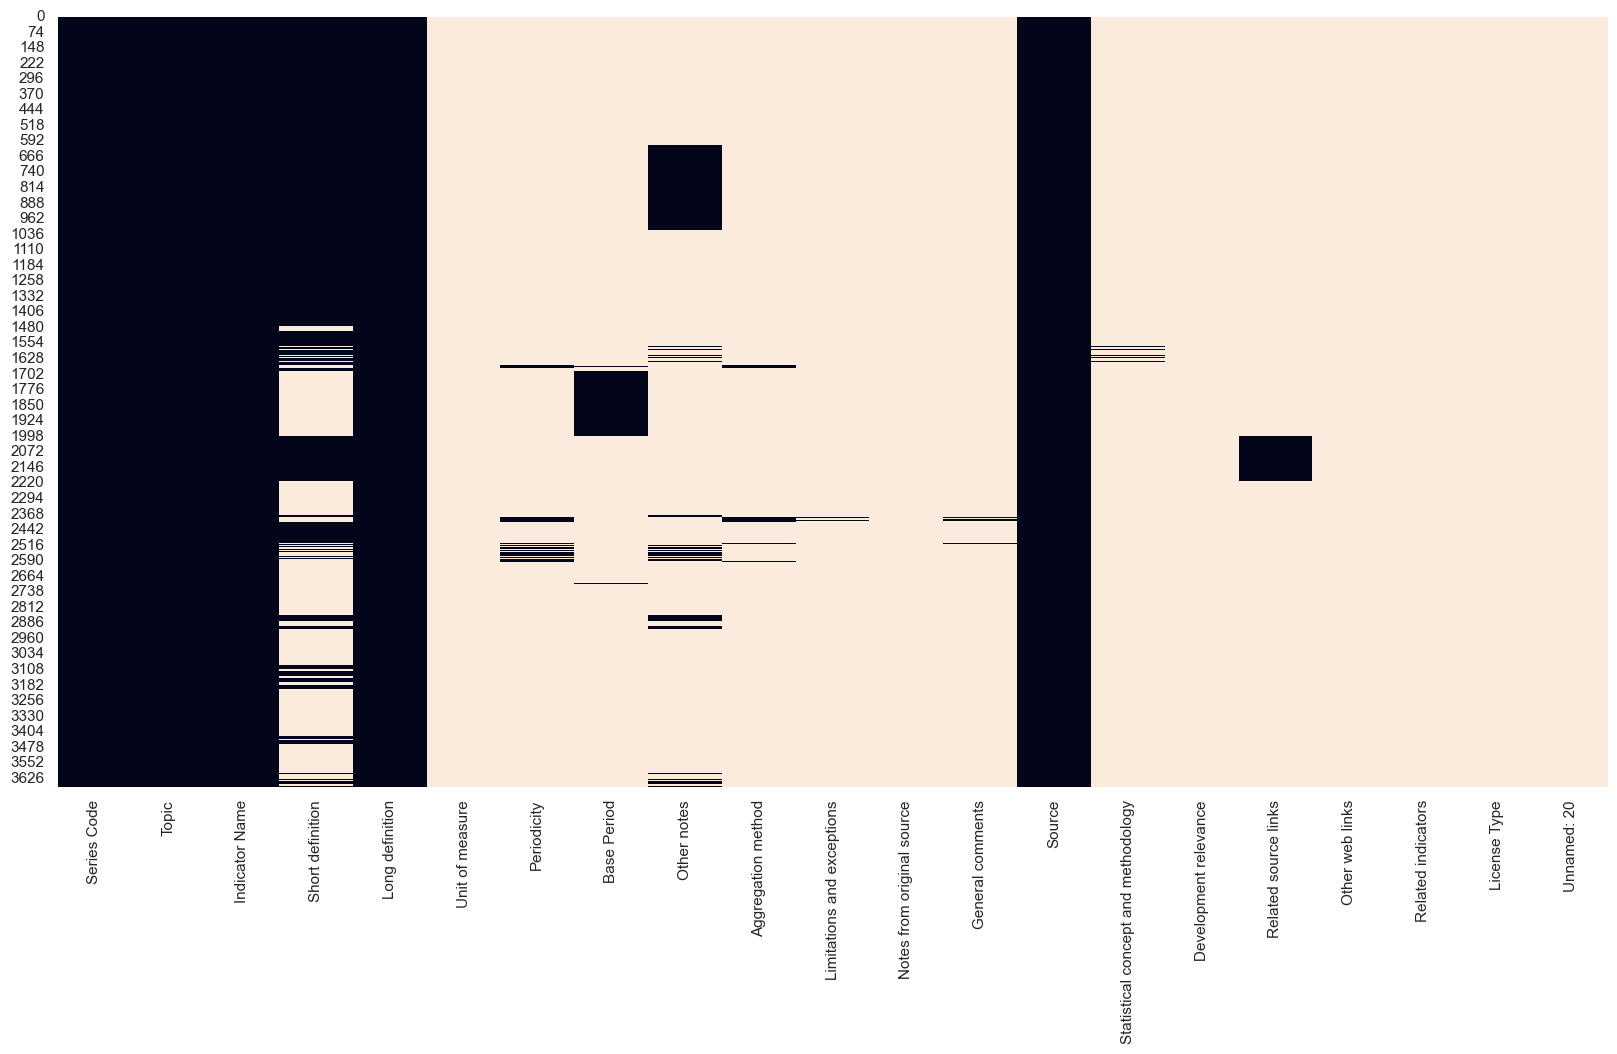

In [35]:
#Représentation graphique des données manquantes
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(series.isnull(), cbar=False)
plt.rcParams.update({'font.size': 30})

In [36]:
#Recherche des doublons sur la colonne Series Code
series.loc[series[['Series Code']].duplicated(keep=False),:]

Empty DataFrame
Columns: [Series Code, Topic, Indicator Name, Short definition, Long definition, Unit of measure, Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, Notes from original source, General comments, Source, Statistical concept and methodology, Development relevance, Related source links, Other web links, Related indicators, License Type, Unnamed: 20]
Index: []

In [37]:
# Comptage des doublons sur la colonne Country Code en utilisant le resumé de variable quantitative
data = series['Series Code'].value_counts()
data.describe()

count    3665.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Series Code, dtype: float64

In [38]:
#vérification de la bonne concordance des valeurs avec le fichier EdStatsData.csv
series['Series Code'].nunique() == donneesStat['Indicator Code'].nunique()

True

In [39]:
#Regroupement des données par thèmes (Topic)
topic = series.groupby(['Topic']).size().reset_index()
topic.columns = ['Topic','Series Code']
data = topic['Topic'].value_counts()
data.describe()

count    37.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Topic, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

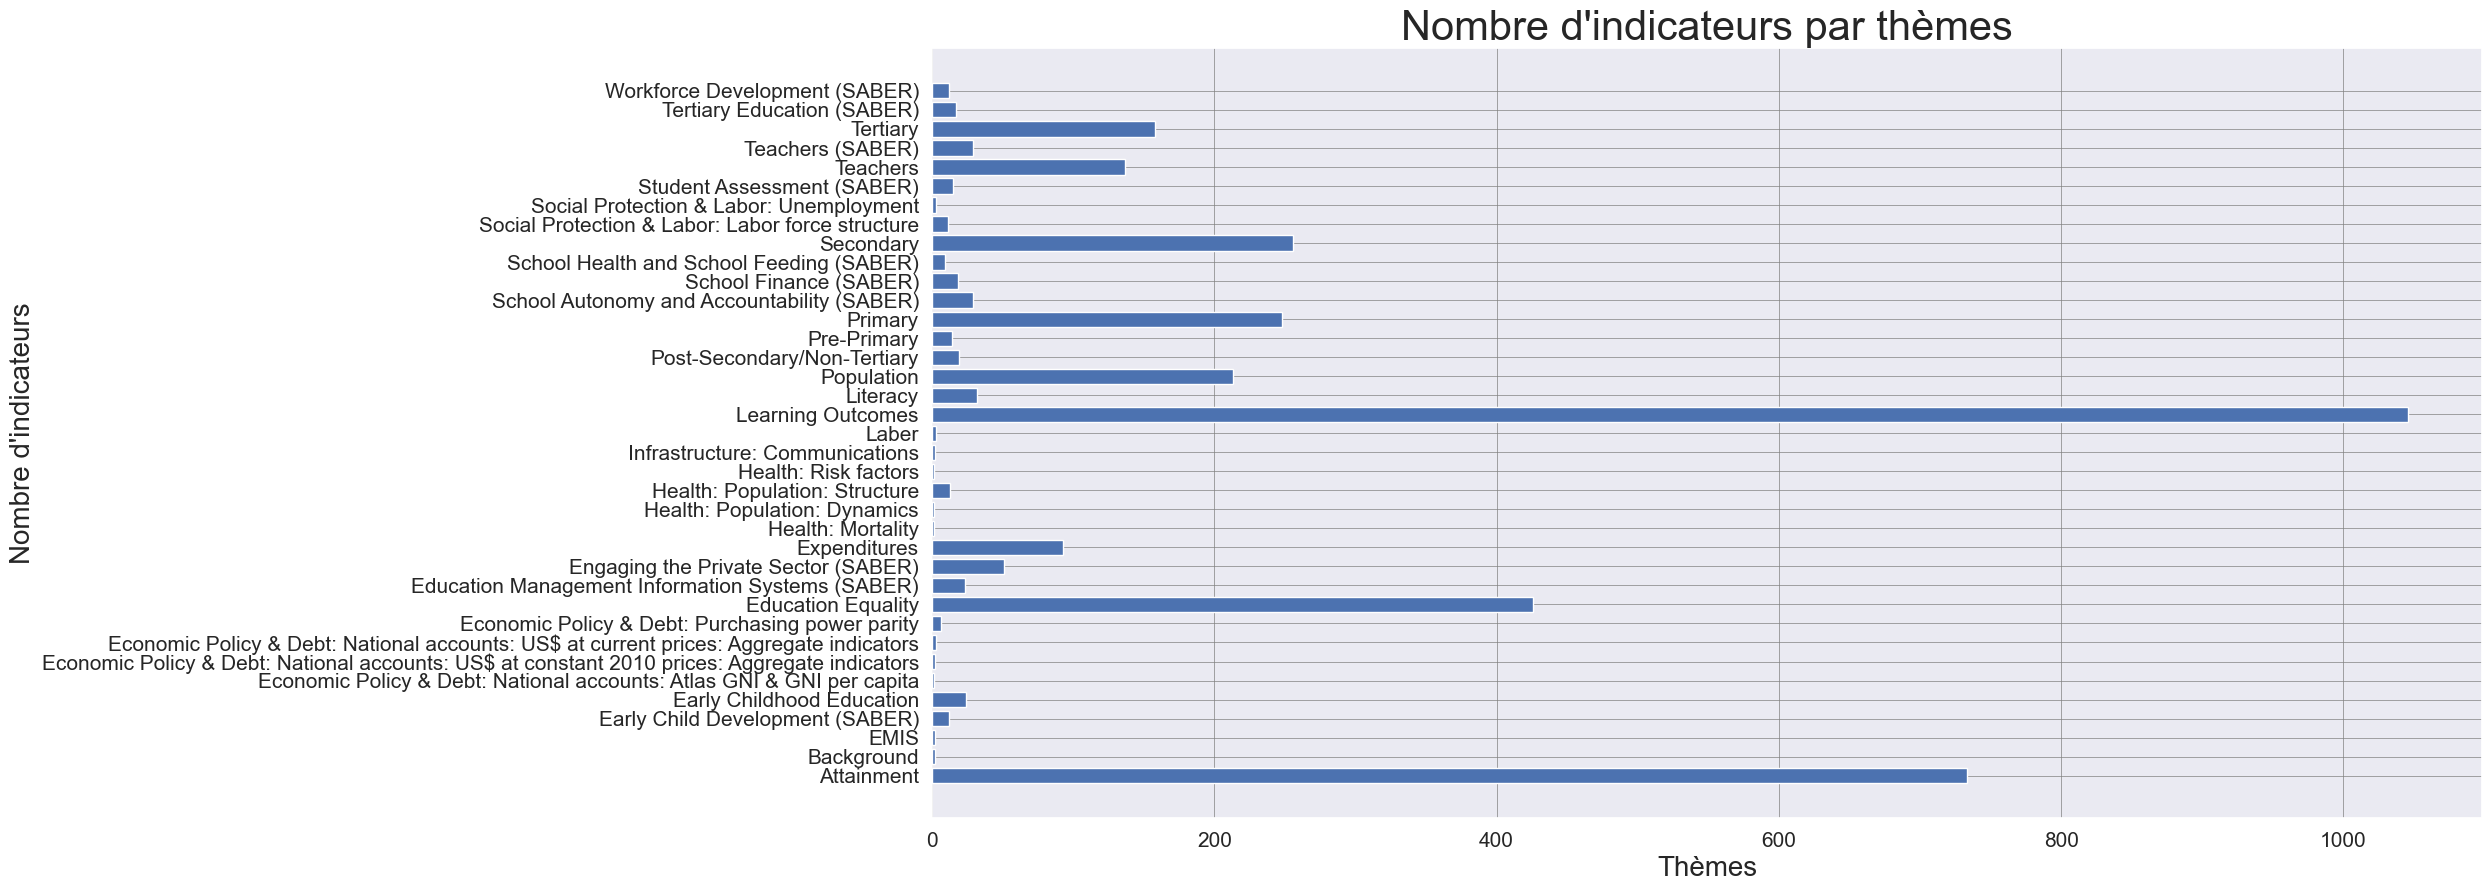

In [40]:
#visuel du Nombre d'indicateurs par thèmes
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
plt.barh(topic['Topic'], topic['Series Code'])
plt.ylabel('Nombre d\'indicateurs', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Thèmes', fontsize=20)
plt.xticks(fontsize=15)
plt.title('Nombre d\'indicateurs par thèmes', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show

##### **Analyse du jeu de données EdStatsSeries.csv**


* Le data set contient les données descriptives des 3665 indicateurs disponibles dans EdStatsData.csv. Les indicateurs sont répartis en 37 thèmes. 
* Le data set fait 3665 lignes pour 21 colonnes.
* Ce fichier reprend donc l'intégralité des indicateurs fournis par la banque mondiale. 
* Le jeu de données contient 55203 valeurs manquantes pour  76965 valeurs, soit 71.72 % de valeurs vides
* Le jeu de données est cohérent, et il ne présente pas de doublons.
* Une grande partie du jeu de donnée est vide. 
    

## Analyse du jeux de données EdStatsCountry-Series.csv



In [41]:
#Comptage des lignes et des colonnes du fichier
lignes = len(countrySeries.index)
colonnes = len(countrySeries.columns)
print('Le nombre de lignes du fichier est de', lignes, 'et de son nombre de colonnes est de', colonnes)

Le nombre de lignes du fichier est de 613 et de son nombre de colonnes est de 4


In [42]:
#Affichage des 3 premieres lignes du data set 
countrySeries.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [43]:
#Affichage des colonnes
countrySeries.columns

Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')

In [44]:
#Résumé de variable qualitative
countrySeries.describe(exclude=[np.number])

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.TOTL   
freq            18          211   

                                              DESCRIPTION  
count                                                 613  
unique                                                 97  
top     Data sources : United Nations World Population...  
freq                                                  154

In [45]:
#Résumé de variable quantitative
countrySeries.describe()

Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [46]:
#Type de données pour chaque colonne
countrySeries.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [47]:
#Affichage des colonnes pour lesquelles il manque des données
nb_na = countrySeries.isnull().sum()
nb_na[nb_na>0]

Unnamed: 3    613
dtype: int64

In [48]:
#Comptage des valeurs nulles
vnulles = countrySeries.isnull().sum().sum()
nb_donnees_tot = np.product(countrySeries.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 613 valeurs manquantes pour  2452 valeurs, soit 25.0 %


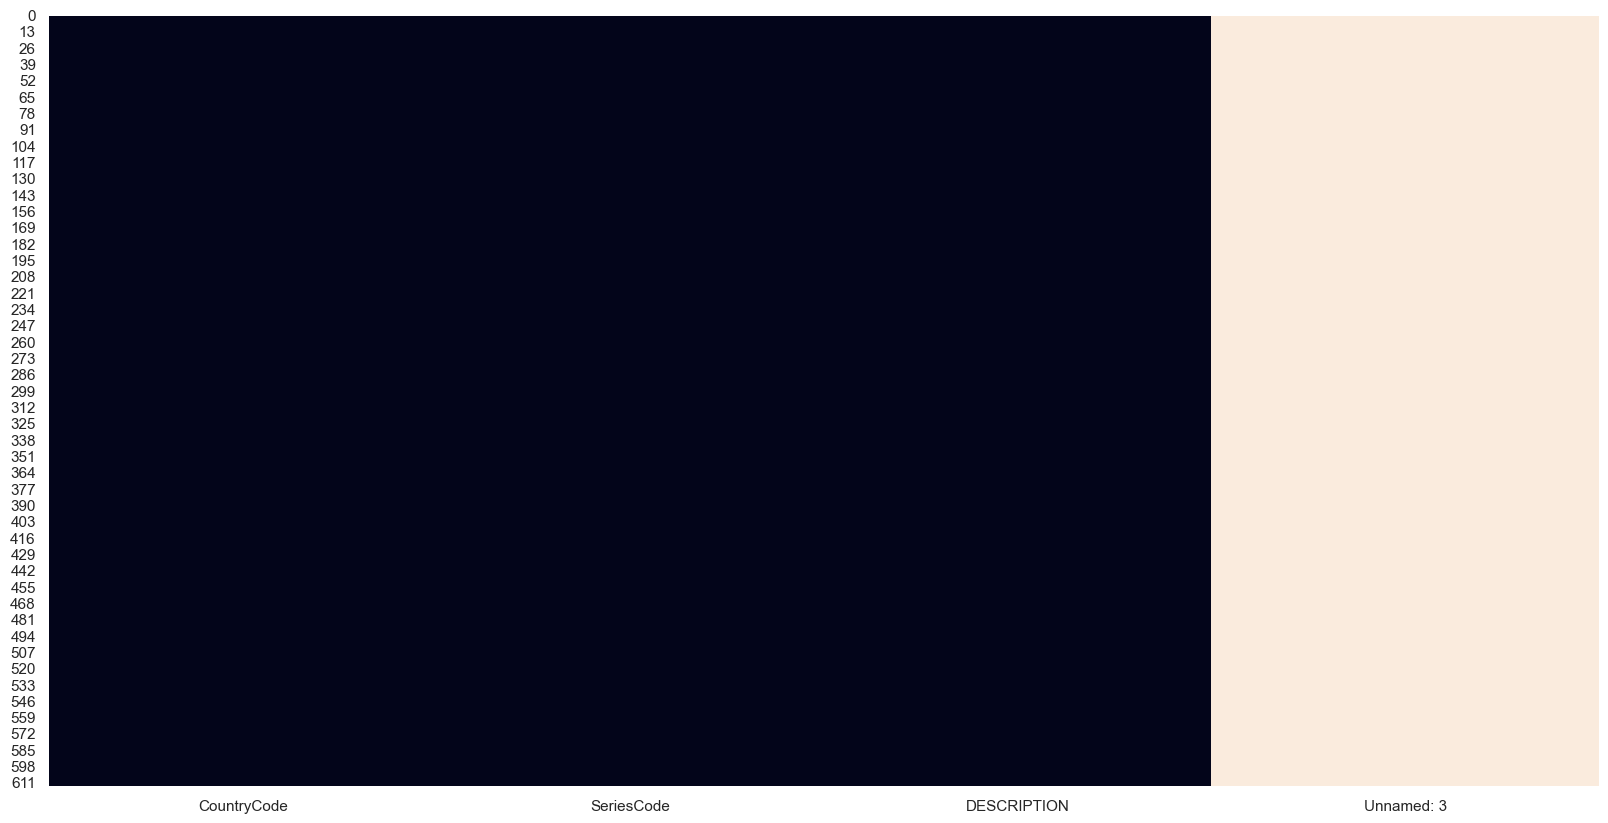

In [49]:
#Représentation graphique des données manquantes
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(countrySeries.isnull(), cbar=False)
plt.rcParams.update({'font.size': 30})

In [50]:
#Recherche des doublons sur la colonne Country Code
countrySeries.loc[countrySeries[['CountryCode']].duplicated(keep=False),:]

CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statistics South Africa, United...         NaN  
609  Data sources: United Nations World Population ...         NaN  
610  Data sources : United Nations World Population...         NaN  
611  Data sources : United Nations World Population...         NaN  
612  Data sources: United Nations World Population ...         NaN  

[613 rows x 4 columns]

In [51]:
#Recherche des doublons sur la colonne CountryCode et SerieCode
countrySeries.loc[countrySeries[['CountryCode', 'SeriesCode']].duplicated(keep=False),:]

Empty DataFrame
Columns: [CountryCode, SeriesCode, DESCRIPTION, Unnamed: 3]
Index: []

In [52]:
#Regroupement des données par le 'serie code'
code = countrySeries.groupby(['SeriesCode']).size().reset_index()
code.columns = ['SeriesCode','CountryCode']
data = code['SeriesCode'].value_counts()
data.describe()

count    21.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: SeriesCode, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

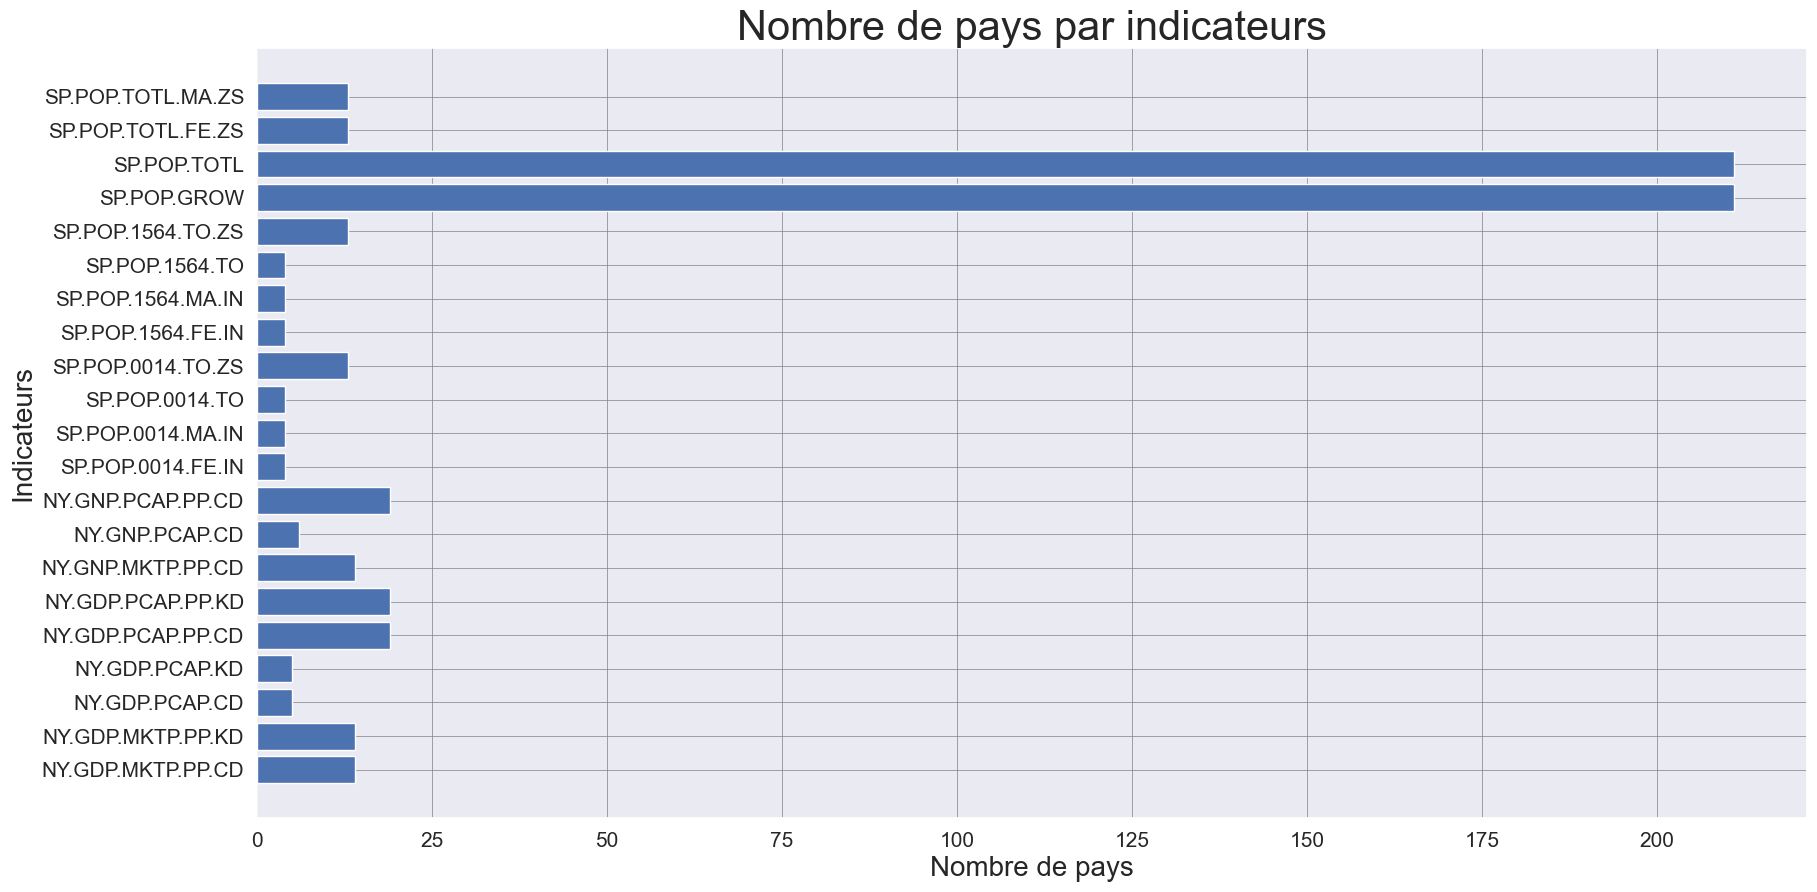

In [53]:
#Visuel du Nombre de pays par indicateurs
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
plt.barh(code['SeriesCode'], code['CountryCode'])
plt.ylabel('Indicateurs', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Nombre de pays', fontsize=20)
plt.xticks(fontsize=15)
plt.title('Nombre de pays par indicateurs', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)

plt.show

##### **Analyse du jeu de données EdStatsSeries.csv**

* Le data set contient les références pour les sources de certains indicateurs
* Le data set fait 613 lignes pour 4 colonnes.
* Le jeu de données contient 613 valeurs manquantes pour  2452 valeurs, soit 25,00 % de valeurs vides
* Le jeu de données est cohérent, et il ne présente pas de doublons.


## Analyse du jeux de données EdStatsData.csv



In [54]:
#comptage de nombre de lignes et de colonnes
lignes = len(donneesStat.index)
colonnes = len(donneesStat.columns)
print('Le nombre de lignes du fichier est de', lignes, 'et de son nombre de colonnes est de', colonnes)

Le nombre de lignes du fichier est de 886930 et de son nombre de colonnes est de 70


In [55]:
#Affichage des 3 premieres lignes du data set 
donneesStat.head(3)

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   

                                      Indicator Name  Indicator Code  1970  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   NaN   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   NaN   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   NaN   

   1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  2006  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  2020  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

   2085  2090  2095  2100  Unnamed: 69  
0   NaN   NaN   NaN   NaN          NaN  
1   NaN   NaN   NaN   NaN          NaN  
2   NaN   NaN   NaN   NaN          NaN

In [56]:
#Affichage des colonnes
donneesStat.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [57]:
#Résumé de variable qualitative
donneesStat.describe(exclude=[np.number])

Country Name Country Code  \
count        886930       886930   
unique          242          242   
top      Arab World          ARB   
freq           3665         3665   

                                           Indicator Name Indicator Code  
count                                              886930         886930  
unique                                               3665           3665  
top     Adjusted net enrolment rate, lower secondary, ...     UIS.NERA.2  
freq                                                  242            242

In [58]:
#Résumé de variable quantitative
donneesStat.describe()

1970         1971         1972         1973         1974  \
count  7.22880e+04  3.55370e+04  3.56190e+04  3.55450e+04  3.57300e+04   
mean   1.97477e+09  4.25364e+09  4.59236e+09  5.10501e+09  5.40149e+09   
std    1.21169e+11  1.80481e+11  1.91408e+11  2.05917e+11  2.11215e+11   
min   -1.43556e+00 -1.59462e+00 -3.05652e+00 -4.03258e+00 -4.21356e+00   
25%    8.90000e-01  8.85321e+00  9.24092e+00  9.59520e+00  9.86159e+00   
50%    6.31772e+00  6.31624e+01  6.65514e+01  6.96960e+01  7.08776e+01   
75%    6.25125e+01  5.65520e+04  5.86365e+04  6.20290e+04  6.38368e+04   
max    1.90393e+13  1.98646e+13  2.10092e+13  2.23837e+13  2.28299e+13   

              1975         1976         1977         1978         1979  \
count  8.73060e+04  3.74830e+04  3.75740e+04  3.75760e+04  3.68090e+04   
mean   2.31429e+09  5.73181e+09  6.12444e+09  6.67149e+09  7.43672e+09   
std    1.37506e+11  2.21555e+11  2.32549e+11  2.47399e+11  2.66096e+11   
min   -3.65857e+00 -2.95094e+00 -3.17487e+00 -3.55875e+00 -2.97361e+00   
25%    1.40000e+00  9.31261e+00  9.51991e+00  1.00000e+01  1.00000e+01   
50%    9.67742e+00  7.10159e+01  7.13333e+01  7.29051e+01  7.51017e+01   
75%    7.85416e+01  5.68280e+04  5.73918e+04  5.94042e+04  6.41150e+04   
max    2.30063e+13  2.42413e+13  2.52138e+13  2.62210e+13  2.73087e+13   

              1980         1981         1982         1983         1984  \
count  8.91220e+04  3.87770e+04  3.75110e+04  3.84600e+04  3.86060e+04   
mean   3.28390e+09  7.66497e+09  7.91372e+09  7.85691e+09  8.11800e+09   
std    1.78077e+11  2.74414e+11  2.79055e+11  2.82381e+11  2.94063e+11   
min   -1.40424e+00 -1.47834e+00 -2.35876e+00 -2.86727e+00 -2.80055e+00   
25%    1.77000e+00  9.46869e+00  9.98933e+00  9.58182e+00  9.06805e+00   
50%    1.10700e+01  7.46721e+01  7.71097e+01  7.59253e+01  7.53314e+01   
75%    8.20276e+01  6.31040e+04  6.92330e+04  6.30412e+04  6.36070e+04   
max    2.78432e+13  2.83793e+13  2.84807e+13  2.91644e+13  3.04852e+13   

              1985         1986         1987         1988         1989  \
count  9.02960e+04  3.93720e+04  3.86410e+04  3.85520e+04  3.75400e+04   
mean   3.62276e+09  9.15655e+09  1.01490e+10  1.10471e+10  1.19544e+10   
std    2.00293e+11  3.26467e+11  3.53535e+11  3.80426e+11  4.01487e+11   
min   -2.21632e+00 -1.55672e+00 -1.41089e+00 -1.42520e+00 -1.56242e+00   
25%    2.15000e+00  9.33292e+00  9.59533e+00  9.71550e+00  9.67964e+00   
50%    1.20000e+01  7.40943e+01  7.35701e+01  7.35427e+01  7.93532e+01   
75%    8.33831e+01  6.60852e+04  7.00110e+04  7.59788e+04  8.55838e+04   
max    3.16646e+13  3.27128e+13  3.38824e+13  3.54574e+13  3.67874e+13   

              1990         1991         1992         1993         1994  \
count  1.24405e+05  7.44370e+04  7.55430e+04  7.57930e+04  7.74620e+04   
mean   9.08442e+09  1.57167e+10  1.60467e+10  1.64353e+10  1.68402e+10   
std    3.66567e+11  4.88136e+11  5.01206e+11  5.12196e+11  5.29298e+11   
min   -1.80375e+00 -5.81434e+00 -5.08933e+00 -6.18486e+00 -4.79269e+00   
25%    4.83000e+00  5.13455e+01  4.93385e+01  4.94488e+01  4.78328e+01   
50%    5.04838e+01  3.91600e+04  3.47730e+04  3.49710e+04  3.18250e+04   
75%    9.13430e+04  4.38313e+05  4.24612e+05  4.31625e+05  4.24460e+05   
max    4.71434e+13  4.78127e+13  4.86645e+13  4.95960e+13  5.10658e+13   

              1995         1996         1997         1998         1999  \
count  1.31361e+05  7.68070e+04  7.34530e+04  8.49140e+04  1.18839e+05   
mean   1.05254e+10  1.87463e+10  2.02739e+10  1.79468e+10  1.33156e+10   
std    4.28522e+11  5.81259e+11  6.14236e+11  5.85915e+11  5.15347e+11   
min   -2.69772e+00 -3.82017e+00 -2.51724e+00 -6.08620e+04 -6.52600e+04   
25%    5.20000e+00  4.83649e+01  5.51085e+01  3.34687e+01  1.74905e+01   
50%    5.01866e+01  3.26240e+04  4.31960e+04  1.52140e+04  1.25100e+03   
75%    7.95400e+04  4.37106e+05  4.90970e+05  3.76821e+05  1.86736e+05   
max    5.27545e+13  5.47803e+13  5.69552e+13  5.83514e+13  6.04063e+13   

            

In [59]:
#Type de données pour chaque colonne
donneesStat.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
1971              float64
1972              float64
1973              float64
1974              float64
1975              float64
1976              float64
1977              float64
1978              float64
1979              float64
1980              float64
1981              float64
1982              float64
1983              float64
1984              float64
1985              float64
1986              float64
1987              float64
1988              float64
1989              float64
1990              float64
1991              float64
1992              float64
1993              float64
1994              float64
1995              float64
1996              float64
1997              float64
1998              float64
1999              float64
2000              float64
2001              float64
2002              float64
2003              float64
2004        

In [60]:
#Affichage des colonnes pour lesquelles il manque des données
nb_na = donneesStat.isnull().sum()
nb_na[nb_na>0]

1970           814642
1971           851393
1972           851311
1973           851385
1974           851200
1975           799624
1976           849447
1977           849356
1978           849354
1979           850121
1980           797808
1981           848153
1982           849419
1983           848470
1984           848324
1985           796634
1986           847558
1987           848289
1988           848378
1989           849390
1990           762525
1991           812493
1992           811387
1993           811137
1994           809468
1995           755569
1996           810123
1997           813477
1998           802016
1999           768091
2000           710254
2001           763421
2002           762725
2003           756567
2004           758116
2005           702822
2006           746618
2007           749658
2008           752543
2009           744822
2010           644488
2011           740918
2012           739666
2013           749421
2014           773141
2015      

In [61]:
#Affichage des colonnes pour lesquelles il manque des données en pourcentage
nb_na = donneesStat.isnull().mean()
nb_na[nb_na>0]

1970           0.91850
1971           0.95993
1972           0.95984
1973           0.95992
1974           0.95971
1975           0.90156
1976           0.95774
1977           0.95764
1978           0.95763
1979           0.95850
1980           0.89952
1981           0.95628
1982           0.95771
1983           0.95664
1984           0.95647
1985           0.89819
1986           0.95561
1987           0.95643
1988           0.95653
1989           0.95767
1990           0.85974
1991           0.91607
1992           0.91483
1993           0.91454
1994           0.91266
1995           0.85189
1996           0.91340
1997           0.91718
1998           0.90426
1999           0.86601
2000           0.80080
2001           0.86075
2002           0.85996
2003           0.85302
2004           0.85476
2005           0.79242
2006           0.84180
2007           0.84523
2008           0.84848
2009           0.83978
2010           0.72665
2011           0.83537
2012           0.83396
2013       

In [62]:
#Comptage des valeurs Nulles
vnulles = donneesStat.isnull().sum().sum()
nb_donnees_tot = np.product(donneesStat.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 53455179 valeurs manquantes pour  62085100 valeurs, soit 86.1 %


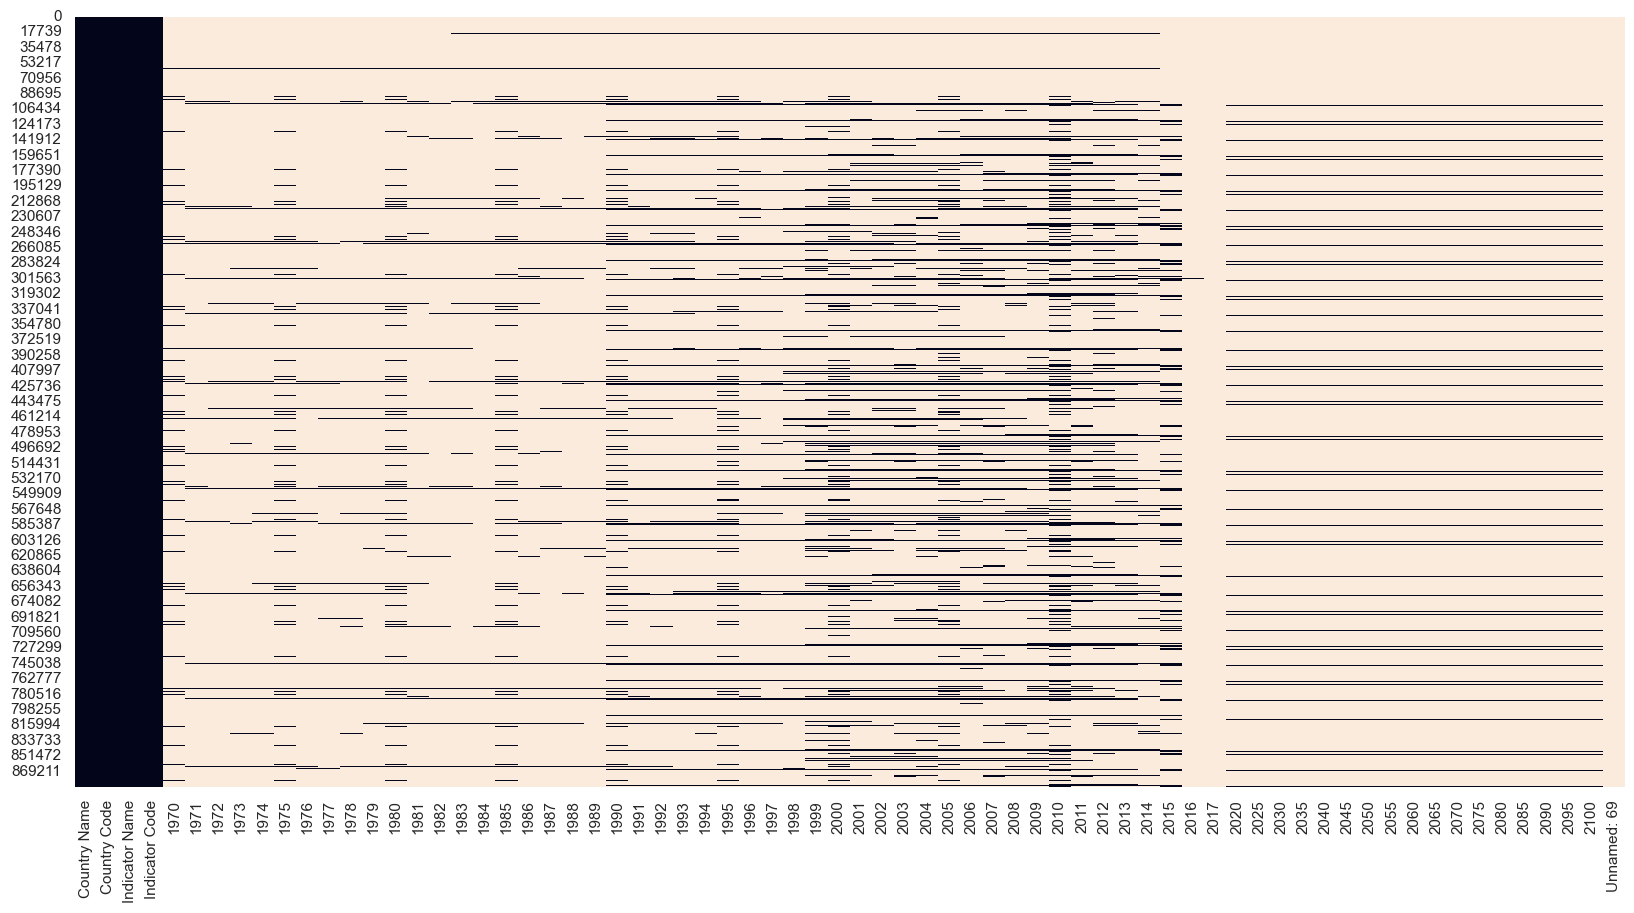

In [63]:
#Representation graphique des données manquantes
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(donneesStat.isnull(), cbar=False)
plt.rcParams.update({'font.size': 30})

In [64]:
#Recherche des doublons sur la colonne Country Code
donneesStat.loc[donneesStat[['Country Name']].duplicated(keep=False),:]

Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code      1970      1971      1972      1973  \
0                 UIS.NERA.2       NaN       NaN       NaN       NaN   
1               UIS.NERA.2.F       NaN       NaN       NaN       NaN   
2             UIS.NERA.2.GPI       NaN       NaN       NaN       NaN   
3               UIS.NERA.2.M       NaN       NaN       NaN       NaN   
4                SE.PRM.TENR  54.82212  54.89414  56.20944  57.26711   
...                      ...       ...       ...       ...       ...   
886925      UIS.LP.AG15T24.M       NaN       NaN       NaN       NaN   
886926     SE.ADT.1524.LT.ZS       NaN       NaN       NaN       NaN   
886927  SE.ADT.1524.LT.FE.ZS       NaN       NaN       NaN       NaN   
886928  SE.ADT.1524.LT.FM.ZS       NaN       NaN       NaN       NaN   
886929  SE.ADT.1524.LT.MA.ZS       NaN       NaN       NaN       NaN   

            1974      1975      1976      1977      1978      1979      1980  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4       57.99114  59.36554  60.99996  61.92268  62.69342  64.38319  65.61777   
...          ...       ...       ...       ...       ...       ...       ...   
886925       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
886926       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
886927       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
886928       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
886929       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

            1981         1982      1983      1984      1985      1986  \
0            NaN          NaN       NaN       NaN       NaN       NaN   
1            NaN          NaN       NaN       NaN       NaN       NaN   
2            NaN          NaN       NaN       NaN       NaN       NaN   
3            NaN          NaN       NaN       NaN       NaN       NaN   
4       66.08515     66.60814  67.29045  68.51009  69.03321  69.94491   
...          ...          ...       ...       ...       ...       ...   
886925       NaN  47631.00000       NaN       NaN       NaN       NaN   
886926       NaN     89.02185       NaN       NaN       NaN       NaN   
886927       NaN     84.81224       NaN       NaN       NaN       NaN   
886928       NaN      0.90392       NaN       NaN       NaN       NaN   
886929       NaN     93.82696       NaN       NaN       NaN       NaN   

            1987      1988     1989      1990      1991         1992  \
0            NaN       NaN      NaN       NaN       NaN          N

In [65]:
#Recherche des doublons sur la colonne CountryCode et SerieCode
donneesStat.loc[donneesStat[['Country Name', 'Country Code', 'Indicator Name']].duplicated(keep=False),:]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

<function matplotlib.pyplot.show(close=None, block=None)>

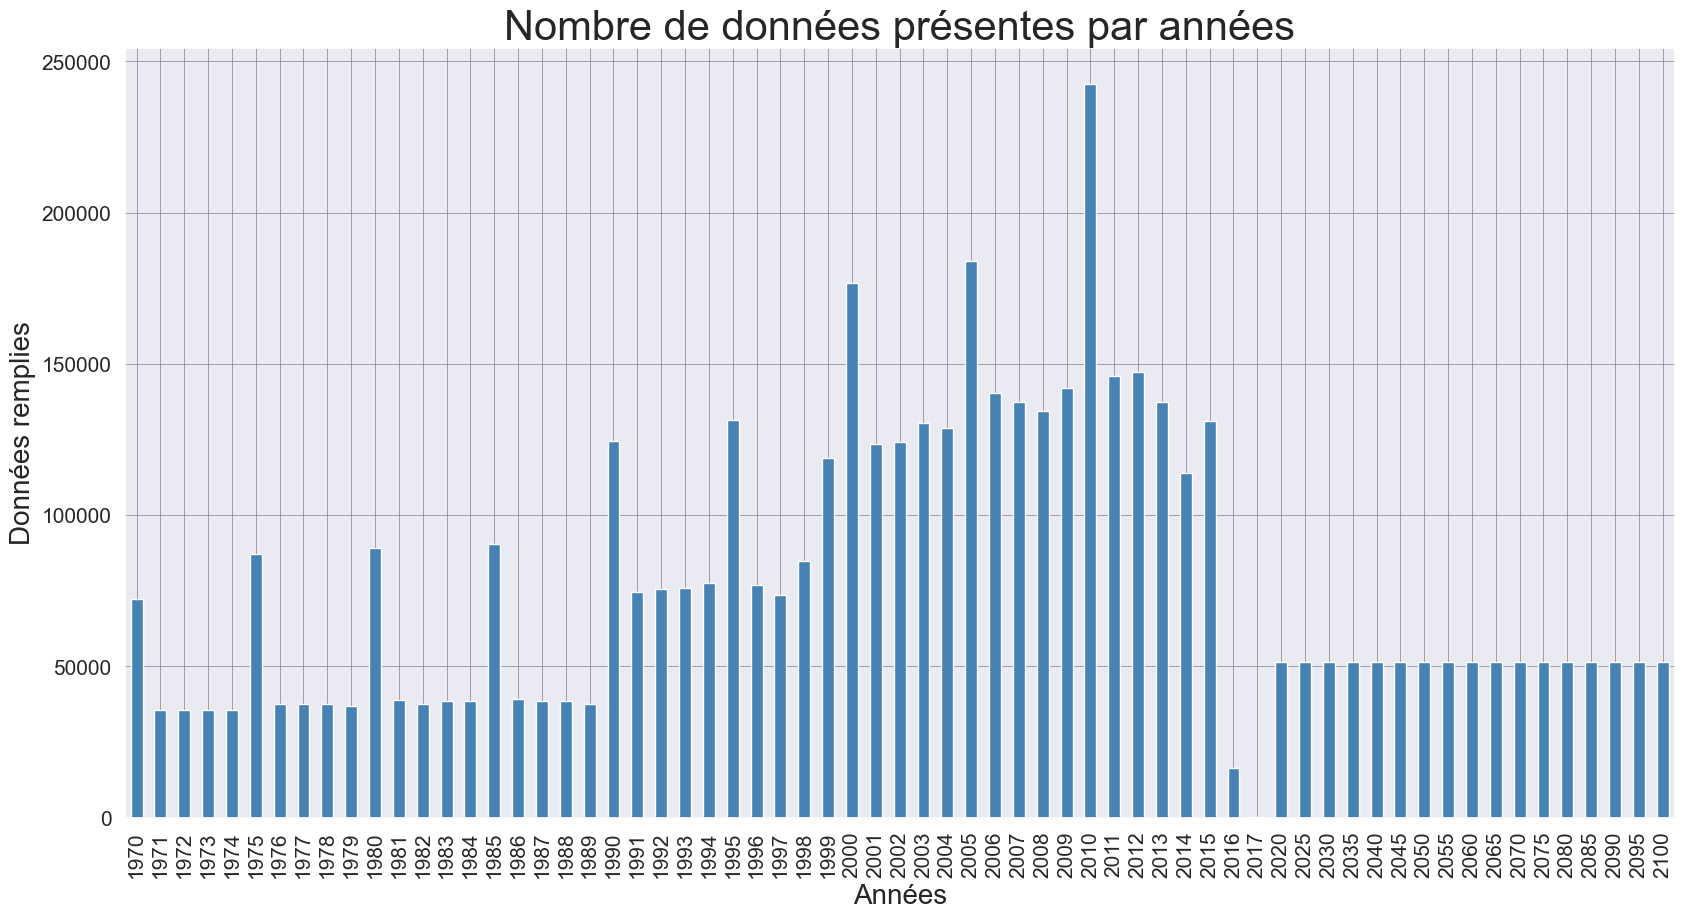

In [66]:
#Visuel Nombre de données par années
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
annees = donneesStat.loc[:,'1970':'2100'].notnull().sum()
annees.plot(kind='bar', color='SteelBlue')
plt.ylabel('Données remplies', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Années', fontsize=20)
plt.xticks(fontsize=15)
plt.title('Nombre de données présentes par années', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show

In [67]:
#regroupement des années par décénies
donneesStats = donneesStat.copy()
donneesStats['1970s'] = donneesStats[[str(year) for year in range(1970,1980,1)]].mean(1)
donneesStats['1980s'] = donneesStats[[str(year) for year in range(1980,1990,1)]].mean(1)
donneesStats['1990s'] = donneesStats[[str(year) for year in range(1990,2000,1)]].mean(1)
donneesStats['2000s'] = donneesStats[[str(year) for year in range(2000,2010,1)]].mean(1)
donneesStats['2010s'] = donneesStats[[str(year) for year in [2010,2011,2012,2013,2014,2015,2016,2017]]].mean(1)
donneesStats['2020s'] = donneesStats[[str(year) for year in [2020,2025]]].mean(1)
donneesStats['2030s'] = donneesStats[[str(year) for year in [2030,2035]]].mean(1)
donneesStats['2040s'] = donneesStats[[str(year) for year in [2040,2045]]].mean(1)
donneesStats['2050s'] = donneesStats[[str(year) for year in [2050,2055]]].mean(1)
donneesStats['2060s'] = donneesStats[[str(year) for year in [2060,2065]]].mean(1)
donneesStats['2070s'] = donneesStats[[str(year) for year in [2070,2075]]].mean(1)
donneesStats['2080s'] = donneesStats[[str(year) for year in [2080,2085]]].mean(1)
donneesStats['2090s'] = donneesStats[[str(year) for year in [2090,2095]]].mean(1)
donneesStats['2100s'] = donneesStats[[str(2100)]].mean(1)

<Figure size 2000x1000 with 0 Axes>

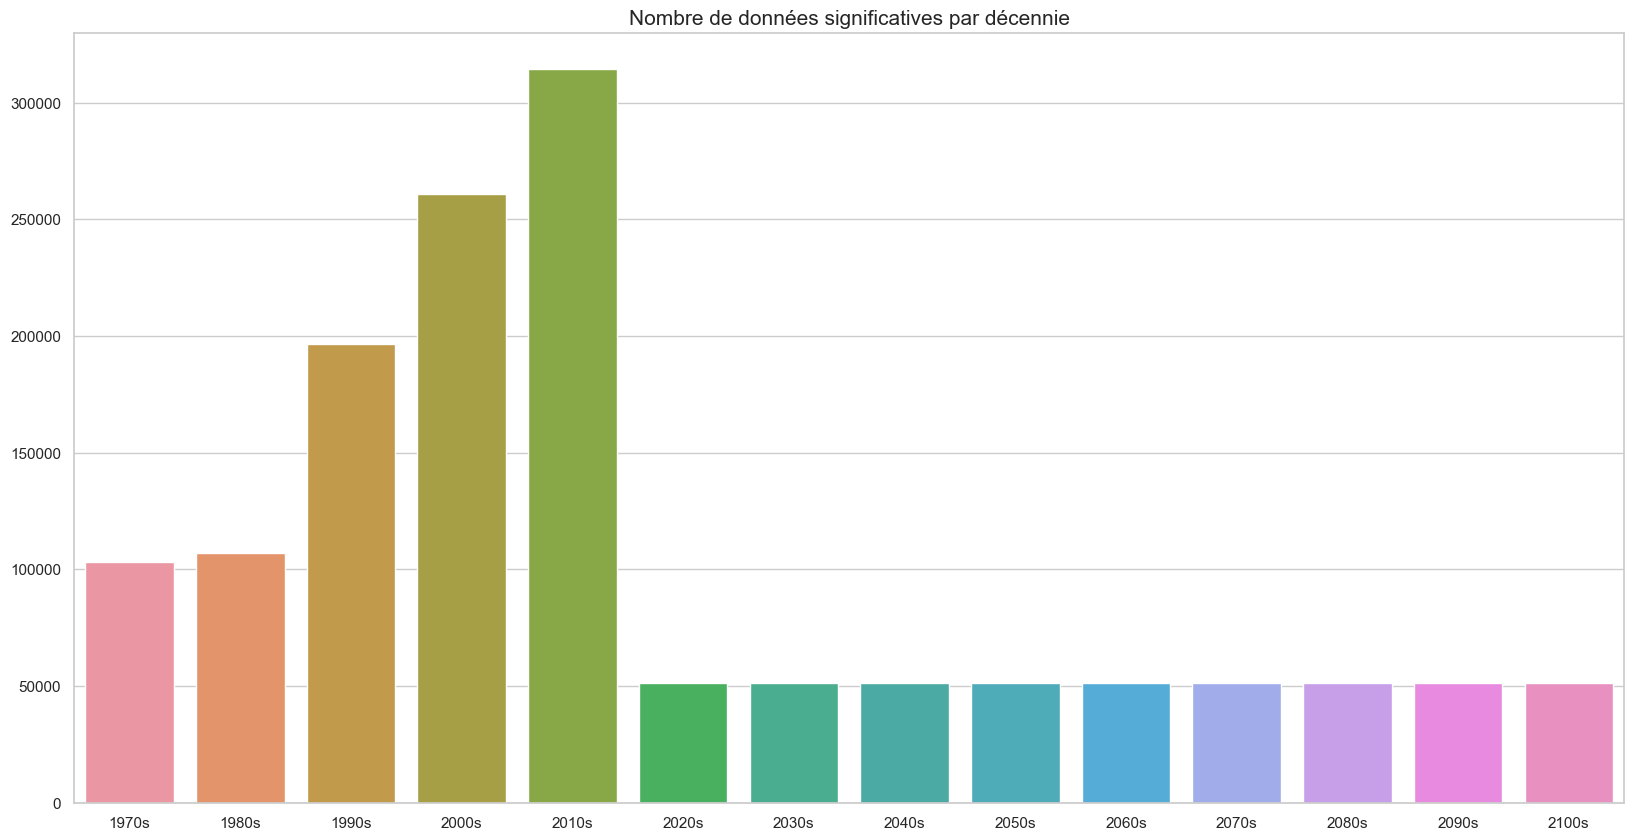

In [68]:
#Visuel Nombre de données par décénies
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))
plt.title('Nombre de données significatives par décennie', size=15)
plot = sns.barplot(y = donneesStats.shape[0] - donneesStats[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().values, x = donneesStats[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s', '2030s', '2040s',
       '2050s', '2060s', '2070s', '2080s', '2090s', '2100s']].isna().sum().index)
plt.show()

##### **Analyse du jeu de données EdStatsSeries.csv**


* Le data set contient les 3665 indicateurs pour les 241 références pays
* Le data set fait 886930 lignes pour 70 colonnes.
* Le jeu de données contient 53455179 valeurs manquantes pour 62085100 valeurs, soit 86,1 % de valeurs vides
* Le jeu de données semble cohérent, et il ne présente pas de doublons.
* Un pic est observable tous les 5 ans, cela doit correspondre à la mise à jour des données avant retraitement. 
* Les données avant 1990 ne sont pas exploitables car pas assez fournies, et elles ne semblent pas avoir été mises à jour depuis 2015. Cela peut être dû à la mise à jour quinquénale des données, 2020 correspond à l'année COVID et aux différents confinements. 
* L'année 2017 est complètement vide.
* Les années entre 2015 et 2100 contiennent des données, cela peut être des données prédictives, à vérifier. Le cas échéant, à utiliser pour l'étude.
* La décénnie 2010 est la mieux renseignée. 

## Analyse du jeu de données EdStatsFootNote.csv variable


In [69]:
# Comptage du nombre de lignes et de colonnes
lignes = len(footNote.index)
colonnes = len(footNote.columns)
print('Le nombre de lignes du fichier est de', lignes, 'et de son nombre de colonnes est de', colonnes)

Le nombre de lignes du fichier est de 643638 et de son nombre de colonnes est de 5


In [70]:
#Affichage des 3 premieres lignes du data set 
footNote.head(3)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN

In [71]:
#Affichage des colonnes
footNote.columns

Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')

In [72]:
#Résumé de variable qualitative
footNote.describe(exclude=[np.number])

CountryCode   SeriesCode    Year   DESCRIPTION
count       643638       643638  643638        643638
unique         239         1558      56          9102
top            LIC  SH.DYN.MORT  YR2004  Country Data
freq          7320         9226   27128        191188

In [73]:
#Résumé de variable quantitative
footNote.describe()

Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [74]:
#Type de données pour chaque colonne
footNote.dtypes

CountryCode     object
SeriesCode      object
Year            object
DESCRIPTION     object
Unnamed: 4     float64
dtype: object

In [75]:
#Affichage des colonnes pour lesquelles il manque des données
nb_na = footNote.isnull().sum()
nb_na[nb_na>0]

Unnamed: 4    643638
dtype: int64

In [76]:
#Affichage des colonnes pour lesquelles il manque des données
nb_na = footNote.isnull().mean()
nb_na[nb_na>0]

Unnamed: 4    1.0
dtype: float64

In [77]:
# vnulles = footNote.isnull().sum().sum()
nb_donnees_tot = np.product(footNote.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 53455179 valeurs manquantes pour  3218190 valeurs, soit 1661.03 %


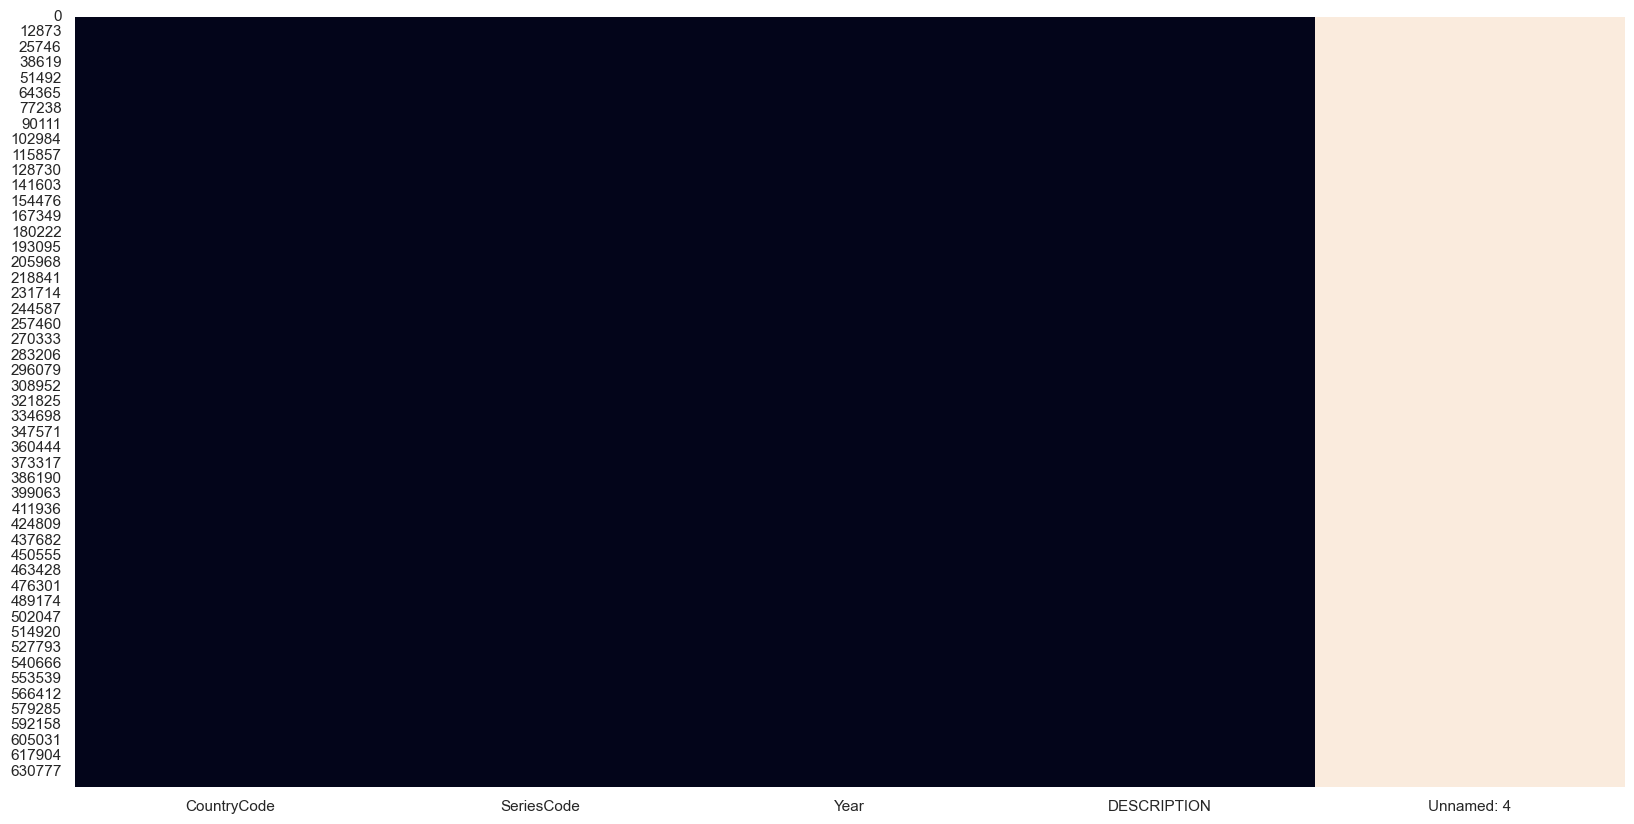

In [78]:
#Representation graphique des données manquantes
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(footNote.isnull(), cbar=False)
plt.rcParams.update({'font.size': 30})

In [79]:
#Recherche des doublons sur la colonne Country Code
footNote.loc[footNote[['CountryCode']].duplicated(keep=False),:]

CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633       Uncertainty bound is 91.6 - 109.3         NaN  
643634          Uncertainty bound is 54.3 - 76         NaN  
643635        Uncertainty bound is 48.3 - 73.3         NaN  
643636  5-year average value between 0s and 5s         NaN  
643637  5-year average value between 0s and 5s         NaN  

[643638 rows x 5 columns]

In [80]:
#Recherche des doublons sur la colonne CountryCode et SerieCode
footNote.loc[footNote[['CountryCode', 'SeriesCode', 'Year']].duplicated(keep=False),:]

Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]
Index: []

<function matplotlib.pyplot.show(close=None, block=None)>

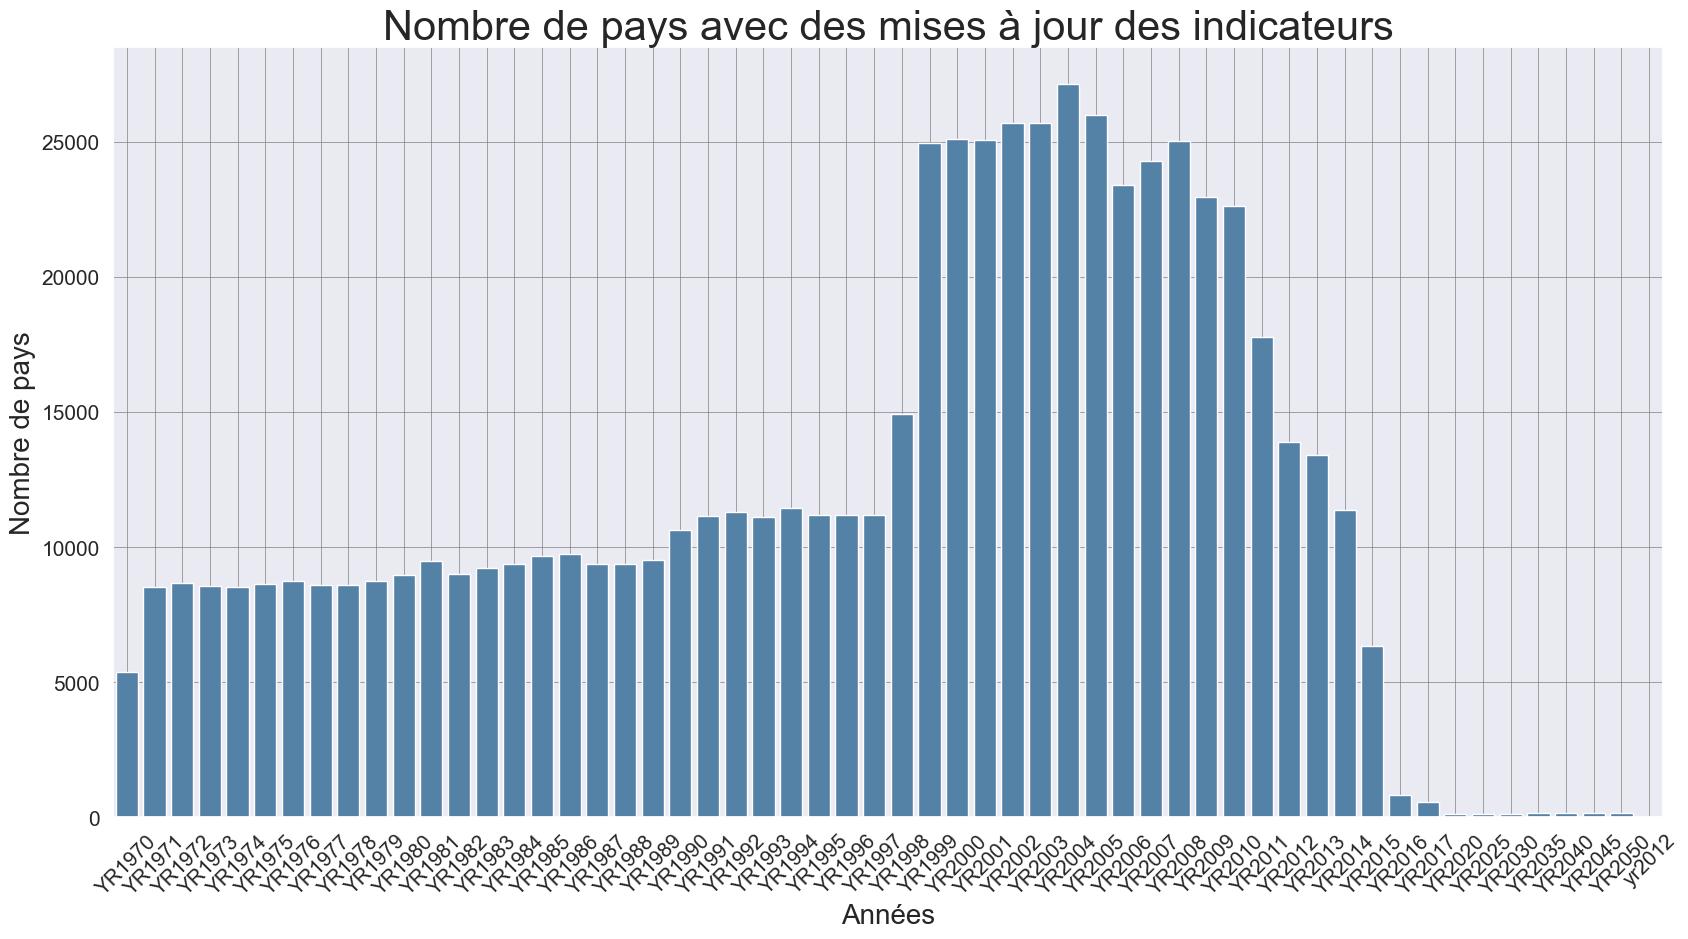

In [81]:
#Visuel Nombre de pays avec mise à jour des indicateurs
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 14})
sns.barplot(y = 'CountryCode', x='Year', data = footNote.groupby('Year').count().reset_index(), color='SteelBlue')
plt.ylabel('Nombre de pays', fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel('Années', fontsize=20)
plt.xticks(fontsize=15, rotation=45)
plt.title('Nombre de pays avec des mises à jour des indicateurs', fontsize=30)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show



##### **Analyse du jeu de données EdStatsSeries.csv**

* Le data set contient les référence de mise à jour des indicateurs, exceptions, incertitudes, données estimées pour les indicateurs pour tous les pays
* Le data set fait 643638 lignes pour 5 colonnes.
* Le jeu de données contient 634638 valeurs manquantes pour 3218190 valeurs, soit 20,0 % de valeurs vides
* Le jeu de données semble cohérent, et il ne présente pas de doublons.




#### **Synthèse sur le dataset**


* Nous sommes en présence d'un jeu de données à caractère mixte, une parties très spécialisée dans les données éducatives,  mais il contient aussi des informations plus générales, et économiques. Il est peut être un peu trop 
spécialisé pour notre problématique. 
* Un travail sur les fichiers va devoir être réalisé afin d'en faciliter le traitement. 
* La question de la pertinence se porte sur au moins 2 fichiers. 


# Représentation des variables et analyse exploratoire

Mark, votre manager, vous a convié à une réunion pour vous présenter le projet d’expansion à l’international de l’entreprise. Il vous confie une première mission d’analyse exploratoire, pour déterminer si les données sur l’éducation de la banque mondiale permettent d’informer le projet d’expansion.
Voici les différentes questions que Mark aimerait explorer, que vous avez notées durant la réunion :

*Quels sont les pays avec un fort potentiel de clients pour nos services ?

*Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

*Dans quels pays l'entreprise doit-elle opérer en priorité ?

Afin de répondre à ces question nous devons chercher dans les bases de données les indicateurs les plus pertinents. Le choix de ces indicateurs nous permettra aussi de définir une liste de pays à étudier. 

La formation doit se faire en "ligne", il apparait a fortiori que l'équipement informatique, **ordinateur** et **internet** est primordiale. 

Notre société est une start-up ayant pour cible un public de niveau lycée et université, nous aurons à determiner le public ayant ce niveau de formation. La population cible sera celle des personnes en âge de faire appel à la société Academy, à savoir les 15-24 ans

La capacité économique va devoir aussi être étudiée, car la formation a un coût. Afin de pouvoir estimer si le pays ciblé est pertinent, nous étudirons le niveau de vie du pays. 

Enfin l'évolution du potentiel repose essentiellement sur la génération future, nous analyserons donc l'évolution à venir du marché. 


## Recherche et sélection des indicateurs 

Afin de sélectionner les indicateurs, nous avons fait le choix de travailler directement à partir du site de la banque mondiale en nous rendant à cette adresse : https://datatopics.worldbank.org/education/indicators


Nous avons sélectionné 10 indicateurs nous semblant pertinents pour la suite de notre étude.

In [82]:
#Affichage des indicateurs sélectionnés et de leurs définitions
code_internet=series[series["Long definition"].str.contains("Internet")]['Series Code'].unique() 
code_internet_def = series[series["Series Code"].str.contains("IT.NET.USER.P2")]['Long definition'].unique()
print(code_internet[0],'' ,'' ,'' ,code_internet_def[0])


code_computer=series[series["Long definition"].str.contains("computer")]['Series Code'].unique()
code_computer_def = series[series["Series Code"].str.contains("IT.CMP.PCMP.P2")]['Long definition'].unique()
print(code_computer[0],'' ,'' ,'' ,code_computer_def[0]) 

print('_'*50)

code_GDP_corrected=series[series["Indicator Name"].str.contains("GDP, PP")]['Series Code'].unique()
code_GDP_def = series[series["Series Code"].str.contains("NY.GDP.PCAP.PP.CD")]['Long definition'].unique()
print(code_GDP_corrected[0],'' ,'' ,'' ,code_GDP_def[0]) 

print('_'*50)

code_1524_pop_tot=series[series["Series Code"].str.contains("SP.POP.1524")]['Series Code'].unique()
code_1524_def = series[series["Series Code"].str.contains("SP.POP.1524.TO.UN")]['Long definition'].unique()
print(code_1524_pop_tot[0],'' ,'' ,'' ,code_1524_def[0]) 

code_1015_pop_tot=series[series["Series Code"].str.contains("SP.POP.1015")]['Series Code'].unique()
code_1015_def = series[series["Series Code"].str.contains("SP.POP.1015.TO.UN")]['Long definition'].unique()
print(code_1015_pop_tot[0],'' ,'' ,'' ,code_1015_def[0]) 

code_pop_grow=series[series["Series Code"].str.contains("SP.POP.GROW")]['Series Code'].unique()
code_pop_def = series[series["Series Code"].str.contains("SP.POP.GROW")]['Long definition'].unique()
print(code_pop_grow[0],'' ,'' ,'' ,code_pop_def[0]) 

code_pop_tot=series[series["Series Code"].str.contains("SP.POP.TOTL")]['Series Code'].unique()
code_pop_tot_def = series[series["Series Code"].str.contains("SP.POP.TOTL")]['Long definition'].unique()
print(code_pop_tot[0],'' ,'' ,'' ,code_pop_tot_def[0]) 

print('_'*50)

code_pop_secondary=series[series["Series Code"].str.contains('SE.SEC.ENRL')]['Series Code'].unique()
code_pop_secondary_def = series[series["Series Code"].str.contains("SE.SEC.ENRL")]['Long definition'].unique()
print(code_pop_secondary[0],'' ,'' ,'' ,code_pop_secondary_def[0]) 

code_pop_tertiary=series[series["Series Code"].str.contains('SE.TER.ENRR')]['Series Code'].unique()
code_pop_tertiary_def = series[series["Series Code"].str.contains("SE.TER.ENRR")]['Long definition'].unique()
print(code_pop_tertiary[0],'' ,'' ,'' ,code_pop_tertiary_def[0]) 

code_pop_post_secondary=series[series["Series Code"].str.contains('UIS.E.4')]['Series Code'].unique()
code_pop_post_secondary_def = series[series["Series Code"].str.contains("UIS.E.4")]['Long definition'].unique()
print(code_pop_post_secondary[0],'' ,'' ,'' ,code_pop_post_secondary_def[0]) 

IT.NET.USER.P2    Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.
IT.CMP.PCMP.P2    Personal computers are self-contained computers designed to be used by a single individual.
__________________________________________________
NY.GDP.MKTP.PP.CD    GDP per capita based on purchasing power parity (PPP). PPP GDP is gross domestic product converted to international dollars using purchasing power parity rates. An international dollar has the same purchasing power over GDP as the U.S. dollar has in the United States. GDP at purchaser's prices is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural res

In [83]:
#affichage des codes indicateurs
indicateurs =[code_internet[0],code_computer[0],'NY.GDP.PCAP.PP.CD',code_1524_pop_tot[2],code_1015_pop_tot[2],
             code_pop_grow[0],code_pop_tot[0],code_pop_tertiary[0],code_pop_secondary[0],code_pop_post_secondary[0]]
print(indicateurs)

['IT.NET.USER.P2', 'IT.CMP.PCMP.P2', 'NY.GDP.PCAP.PP.CD', 'SP.POP.1524.TO.UN', 'SP.POP.1015.TO.UN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SE.TER.ENRR', 'SE.SEC.ENRL', 'UIS.E.4']


In [84]:
#Comptage des données présente dans les indicateurs pour l'année 2010
data_indic = donneesStats[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2010s']]
data_indic[data_indic['Indicator Code'].isin(indicateurs)][['Indicator Name', 'Indicator Code', '2010s']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2010s',ascending=False)


Indicator Name     Indicator Code  2010s
6                       Population growth (annual %)        SP.POP.GROW    240
9                                  Population, total        SP.POP.TOTL    240
4                    Internet users (per 100 people)     IT.NET.USER.P2    229
2      GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD    217
1  Enrolment in secondary education, both sexes (...        SE.SEC.ENRL    209
3    Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR    190
7                      Population, ages 10-15, total  SP.POP.1015.TO.UN    181
8                      Population, ages 15-24, total  SP.POP.1524.TO.UN    181
0  Enrolment in post-secondary non-tertiary educa...            UIS.E.4    137
5                Personal computers (per 100 people)     IT.CMP.PCMP.P2      0

La population est de 241 individus par indicateur. La plupart des indicateurs est à plus de 50% de données, hormis l'équipement en ordinateur personnel qui est totalement vide. 


### Description des indicateurs

* **IT.Net.User.P2**: Taux d'internet pour 100 personnes

* **IT.CMP.PCMP.P2**: Nombre d'ordinateur personnel pour 100 personnes

* **NY.GDP.PCAP.PP.CD**: PIB par têtes

* **SP.POP.1524.TO.UN**: total de la population agée de 15 à 24 ans

* **SP.POP.1015.TO.UN**: total de la population agée de 10 à 15 ans

* **SP.POP.GROW**: augmentation de la population...

* **SP.POP.TOTL**: total de la population

* **SE.SEC.ENRL**: Personnes inscrites au lycée

* **SE.TER.ENRR**: Personnes inscrites à l'université

* **UIS.E.4**: Personnes inscrites en formation post-bac


## Mise en forme des fichiers pour l'analyse de données

#### Suppression des données inutiles

In [85]:
#suppression de l'indicateur vide
indicateurs.remove('UIS.E.4')
indicateurs.remove('IT.CMP.PCMP.P2')
print(indicateurs)

['IT.NET.USER.P2', 'NY.GDP.PCAP.PP.CD', 'SP.POP.1524.TO.UN', 'SP.POP.1015.TO.UN', 'SP.POP.GROW', 'SP.POP.TOTL', 'SE.TER.ENRR', 'SE.SEC.ENRL']


In [86]:
# Recherche des codes pays des regroupements de pays
pays_supp=donneesStats[~donneesStats['Country Code'].isin(countrySeries['CountryCode'])][['Country Name','Country Code']].sort_values(by = 'Country Name')
pays_supp.drop_duplicates(inplace=True)
pays_supp
iso3_supp=pays_supp['Country Code'].to_list()
iso3_supp.remove('VGB')
iso3_supp.remove('CUW')
iso3_supp.remove('NRU')
iso3_supp.remove('SXM')
iso3_supp.remove('SSD')
iso3_supp.remove('MAF')    
print(f'Pays hors norme ISO : {iso3_supp}')

Pays hors norme ISO : ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD']


In [87]:
# Liste des codes à supprimer
code_supp = ['ARB', 'EAS', 'EAP', 'EMU', 'ECS', 'ECA', 'EUU', 'HPC', 'HIC', 'LCN', 'LAC', 'LDC', 'LMY', 'LIC', 'LMC', 
             'MEA', 'MNA', 'MIC', 'NAC', 'OED', 'SAS', 'SSF', 'SSA', 'UMC', 'WLD']
#suppression des codes
donneesStats.copy()
donneesStats=donneesStats[~donneesStats['Country Code'].isin(iso3_supp)]
print(f'Nombre de lignes restantes : {donneesStats.shape[0]}')

Nombre de lignes restantes : 795305


In [88]:
#Supression des colonnes de dates hors décennie 2010
df_wk=donneesStats.copy()
cols_supp=donneesStats.columns[4:44].to_list()
cols_supp.extend(donneesStats.columns[50:-1].to_list())
df_wk.drop(columns=cols_supp,inplace=True)

# Liste des indicateurs pertinents à conserver
indicateurs_ok= indicateurs

# On ne conserve que les lignes donnant des informations sur les indicateurs retenus
df_wk = df_wk[df_wk['Indicator Code'].isin(indicateurs)]
ng_lignes=df_wk.shape[0]
print(f'Nombre de lignes restantes : {df_wk.shape[0]}')

Nombre de lignes restantes : 1736


In [89]:
#Ajout des data revenu et région au fichier de travail
countries_income = pd.DataFrame({'Country_Code' : countries['Country Code'].unique(), 
                                 'Region' : countries['Region'], 
                                 'Income Group' : countries['Income Group']})
df_wk = pd.merge(df_wk,countries_income, left_on='Country Code', right_on='Country_Code', how='left')
df_wk.drop(columns=['Country_Code'],inplace=True)
df_wk.drop(columns=['2100s'],inplace=True)
df_wk.columns;


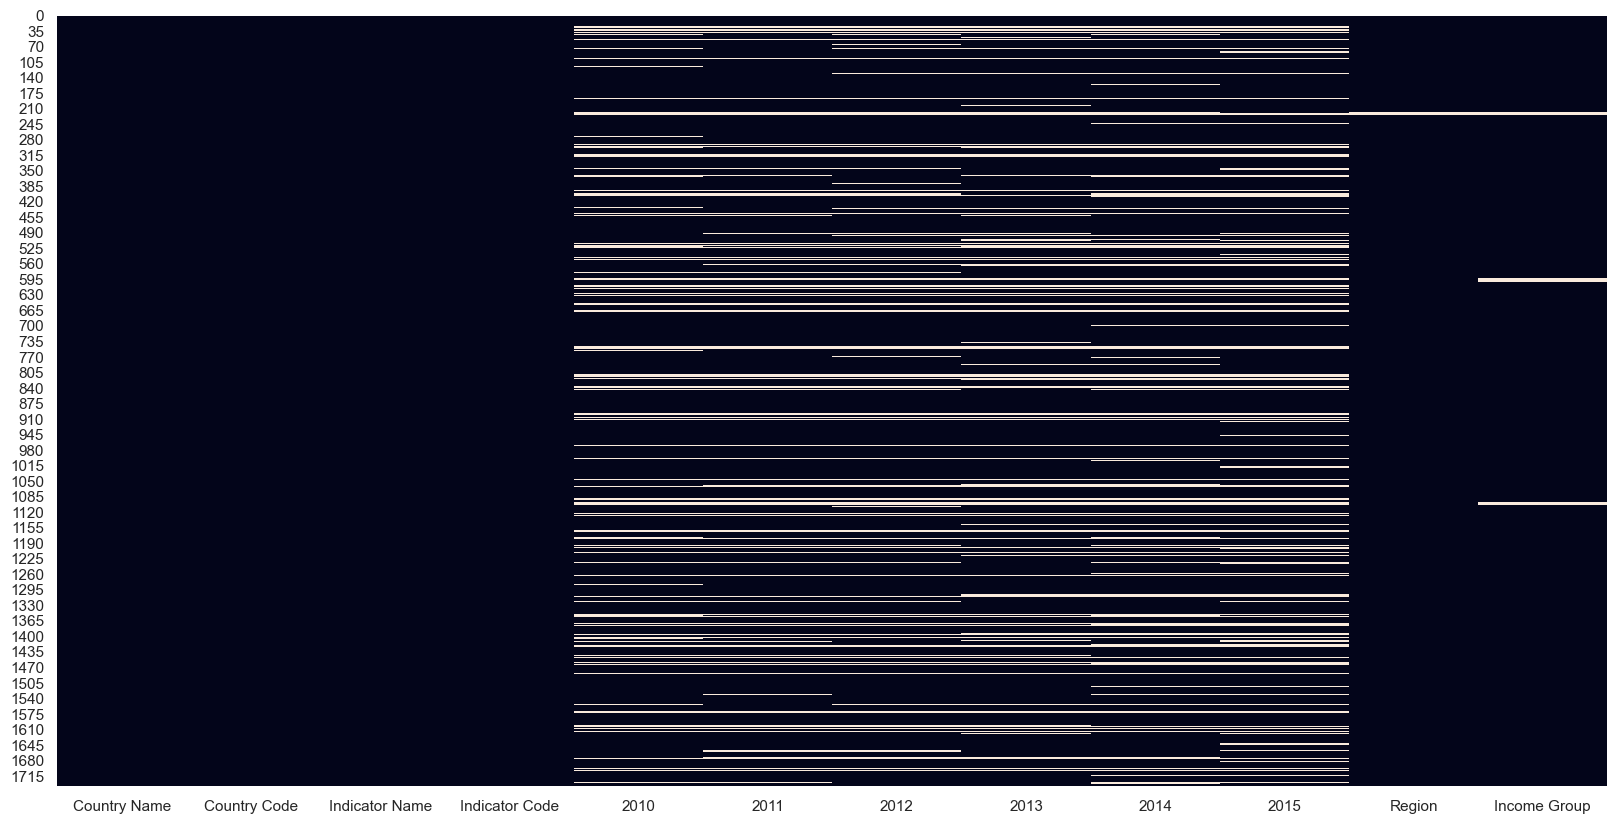

In [90]:
#Représentation graphique des données manquantes
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(df_wk.isnull(), cbar=False)
plt.rcParams.update({'font.size': 30})

In [91]:
#Nombre de lignes restantes
df_wk[df_wk['Region'].isna()]
print(f'Nombre de lignes restantes : {df_wk.shape[0]}')

Nombre de lignes restantes : 1736


In [92]:
#création du df

df_regions=df_wk.copy()
cols_regions=df_wk.columns[1:10].to_list()
cols_regions.extend(df_wk.columns[11:,].to_list())
df_regions.drop(columns=cols_regions,inplace=True)
df_regions.columns


Index(['Country Name', 'Region'], dtype='object')

In [93]:
# Propagation des valeurs non nulles de 2010 vers 2015 pour travailler sur dernière valeur connue non nulle la plus récente en 2015
df_wk_fillna=df_wk.copy()
cols_to_interpolate=df_wk_fillna.columns[4:-2].tolist()
#  Variables quantitatives
df_numeric = df_wk_fillna[cols_to_interpolate]
# Variables qualitatives
df_categ = df_wk_fillna.loc[:, ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'Income Group', 'Region']]
df_numeric.fillna(method='ffill', axis=1, inplace=True)
df_wk_fillna = pd.concat([df_categ, df_numeric], axis=1)
nb_pays=df_wk_fillna['Country Name'].nunique()
print(f'Nombre de pays : {nb_pays}')
# On ne conserve que la dernière année totalement remplie : 2015
df_pays_1an=df_wk_fillna[['Country Name','Country Code','Indicator Name','Indicator Code', 'Region', 
                       'Income Group','2015']]
# # Dernière colonne remplie renommée en 'Last info'
df_pays_1an.rename(columns={'2015': 'Last info'}, inplace=True)
# # La méthode fillna transforme tous les types en object nous retransformons alors la dernière colonne en numérique
df_pays_1an=df_pays_1an.astype({'Last info': 'float64'})
df_pays_1an;
df_pays_1an.head()

Nombre de pays : 217


/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/4233148796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.fillna(method='ffill', axis=1, inplace=True)
/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/4233148796.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pays_1an.rename(columns={'2015': 'Last info'}, inplace=True)


Country Name Country Code  \
0  Afghanistan          AFG   
1  Afghanistan          AFG   
2  Afghanistan          AFG   
3  Afghanistan          AFG   
4  Afghanistan          AFG   

                                      Indicator Name     Indicator Code  \
0  Enrolment in secondary education, both sexes (...        SE.SEC.ENRL   
1      GDP per capita, PPP (current international $)  NY.GDP.PCAP.PP.CD   
2    Gross enrolment ratio, tertiary, both sexes (%)        SE.TER.ENRR   
3                    Internet users (per 100 people)     IT.NET.USER.P2   
4                       Population growth (annual %)        SP.POP.GROW   

       Region Income Group    Last info  
0  South Asia   Low income  2.69882e+06  
1  South Asia   Low income  1.86497e+03  
2  South Asia   Low income  8.66280e+00  
3  South Asia   Low income  8.26000e+00  
4  South Asia   Low income  2.94323e+00

In [94]:
# Suppression de Macao et Hong Kong qui sont rattachés à la Chine
df_eco_choice = df_pays_1an.drop(df_pays_1an[df_pays_1an['Country Name'] == 'Macao SAR, China'].index)
df_eco_choices = df_eco_choice.drop(df_eco_choice[df_eco_choice['Country Name'] == 'Hong Kong SAR, China'].index)

In [95]:
# Création de df spécifiques par indicateurs
df_tech=df_pays_1an[df_pays_1an['Indicator Code'] == 'IT.NET.USER.P2']
df_eco=df_eco_choices[df_eco_choices['Indicator Code'] == 'NY.GDP.PCAP.PP.CD']
df_pop1015=df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.1015.TO.UN']
df_pop1524=df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.1524.TO.UN']
df_pop=df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.GROW']
df_poptot=df_pays_1an[df_pays_1an['Indicator Code'] == 'SP.POP.TOTL']
df_edu_sec=df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.SEC.ENRL']
df_edu_ter=df_pays_1an[df_pays_1an['Indicator Code'] == 'SE.TER.ENRR']

In [96]:
#Création d'un indicateur global pour la population lycéenne et etudiante
df_edu_total = pd.concat([df_edu_sec, df_edu_ter]).groupby('Country Name')['Last info'].sum().reset_index()

In [97]:
#Nettoyage des df par suppression des Nan et tri 
df_tech_clean = df_tech.dropna(axis=0)
tech = df_tech_clean.sort_values(by = 'Last info', ascending = False)

df_eco_clean = df_eco.dropna(axis=0)
eco = df_eco_clean.sort_values(by = 'Last info', ascending = False)

df_poptot_clean = df_poptot.dropna(axis=0)
poptot = df_poptot_clean.sort_values(by = 'Last info', ascending = False)

df_pop1524_clean = df_pop1524.dropna(axis=0)
pop1524 = df_pop1524_clean.sort_values(by = 'Last info', ascending = False)

df_edu_total_clean = df_edu_total.dropna(axis=0)
edutotal = df_edu_total_clean.sort_values(by = 'Last info', ascending = False)

In [98]:
#Creation d'un tableau donnant les moyennes et les médianes des indicateurs retenus pour le choix final
files_description = pd.DataFrame(columns = ["Nombre pays", "Indicateur", "Minimum", "Maximum", "Médianes", "Moyennes", "Variance", "Ecart-Type", "Description"],
                                 index = ["IT.NET.USER.P2",
                                          "NY.GDP.PCAP.PP.CD",
                                          "SP.POP.TOTL",
                                          "SP.POP.1524.TO.UN",
                                          "SE.SEC & SE.TER total"])


# Description pour chacun des fichiers
files_description["Description"] = [
    "Pourcentage d'utilisateurs d'internet",
    "PIB par habitants",
    "Population totale",
    "Population des 15 - 24 ans ",
    "Total des populations lycéennes et étudiantes"
]

# Remplissage du nombre de lignes pour chaque fichiers
files_description["Nombre pays"] = [
    len(tech.index),
    len(eco.index),
    len(poptot.index),
    len(pop1524.index),
    len(edutotal.index)
]

#Remplissage du nombre de colonnes pour chaque fichier
files_description["Indicateur"] = [
    "IT.NET.USER.P2",
    "NY.GDP.PCAP.PP.CD",
    "SP.POP.TOTL",
    "SP.POP.1524.TO.UN",
    "SE.SEC & SE.TER total"
]

#Remplissage des minimum pour chaque indicateur
files_description["Minimum"] = [
    round(df_tech_clean['Last info'].min(),2),
    round(df_eco_clean['Last info'].min(),2),
    round(df_poptot_clean['Last info'].min(),2),
    round(df_pop1524_clean['Last info'].min(),2),
    round(df_edu_total_clean['Last info'].min(),2)  
]

#Remplissage des maximum pour chaque indicateur
files_description["Maximum"] = [
    round(df_tech_clean['Last info'].max(),2),
    round(df_eco_clean['Last info'].max(),2),
    round(df_poptot_clean['Last info'].max(),2),
    round(df_pop1524_clean['Last info'].max(),2),
    round(df_edu_total_clean['Last info'].max(),2)  
]

#Remplissage des médianes pour chaque indicateur
files_description["Médianes"] = [
    round(df_tech_clean['Last info'].median(),2),
    round(df_eco_clean['Last info'].median(),2),
    round(df_poptot_clean['Last info'].median(),2),
    round(df_pop1524_clean['Last info'].median(),2),
    round(df_edu_total_clean['Last info'].median(),2)
]

#Remplissage des moyennes pour chaque fichier
files_description["Moyennes"] = [
    round(df_tech_clean['Last info'].mean(),2),
    round(df_eco_clean['Last info'].mean(),2),
    round(df_poptot_clean['Last info'].mean(),2),
    round(df_pop1524_clean['Last info'].mean(),2),
    round(df_edu_total_clean['Last info'].mean(),2)
]

#Remplissage de la variance pour chaque fichier
files_description["Variance"] = [
    round(df_tech_clean['Last info'].var(ddof=0),2),
    round(df_eco_clean['Last info'].var(ddof=0),2),
    round(df_poptot_clean['Last info'].var(ddof=0),2),
    round(df_pop1524_clean['Last info'].var(ddof=0),2),
    round(df_edu_total_clean['Last info'].var(ddof=0),2)
]

#Remplissage de l'ecart-type pour chaque fichier
files_description["Ecart-Type"] = [
    round(df_tech_clean['Last info'].std(ddof=0),2),
    round(df_eco_clean['Last info'].std(ddof=0),2),
    round(df_poptot_clean['Last info'].std(ddof=0),2),
    round(df_pop1524_clean['Last info'].std(ddof=0),2),
    round(df_edu_total_clean['Last info'].std(ddof=0),2)
]

files_description

Nombre pays             Indicateur   Minimum  \
IT.NET.USER.P2                 203         IT.NET.USER.P2      0.00   
NY.GDP.PCAP.PP.CD              190      NY.GDP.PCAP.PP.CD    668.34   
SP.POP.TOTL                    214            SP.POP.TOTL  11001.00   
SP.POP.1524.TO.UN              181      SP.POP.1524.TO.UN  14455.00   
SE.SEC & SE.TER total          217  SE.SEC & SE.TER total      0.00   

                           Maximum    Médianes     Moyennes     Variance  \
IT.NET.USER.P2         9.83200e+01       50.14  4.85500e+01  8.14280e+02   
NY.GDP.PCAP.PP.CD      1.27764e+05    11989.00  1.92380e+04  4.24592e+08   
SP.POP.TOTL            1.37122e+09  6273716.50  3.42557e+07  1.79227e+16   
SP.POP.1524.TO.UN      2.44120e+08  1331040.00  6.65499e+06  5.74750e+14   
SE.SEC & SE.TER total  1.29542e+08   360274.05  2.60797e+06  1.20160e+14   

                        Ecart-Type  \
IT.NET.USER.P2         2.85400e+01   
NY.GDP.PCAP.PP.CD      2.06056e+04   
SP.POP.TOTL            1.33876e+08   
SP.POP.1524.TO.UN      2.39739e+07   
SE.SEC & SE.TER total  1.09617e+07   

                                                         Description  
IT.NET.USER.P2                 Pourcentage d'utilisateurs d'internet  
NY.GDP.PCAP.PP.CD                                  PIB par habitants  
SP.POP.TOTL                                        Population totale  
SP.POP.1524.TO.UN                        Population des 15 - 24 ans   
SE.SEC & SE.TER total  Total des populations lycéennes et étudiantes

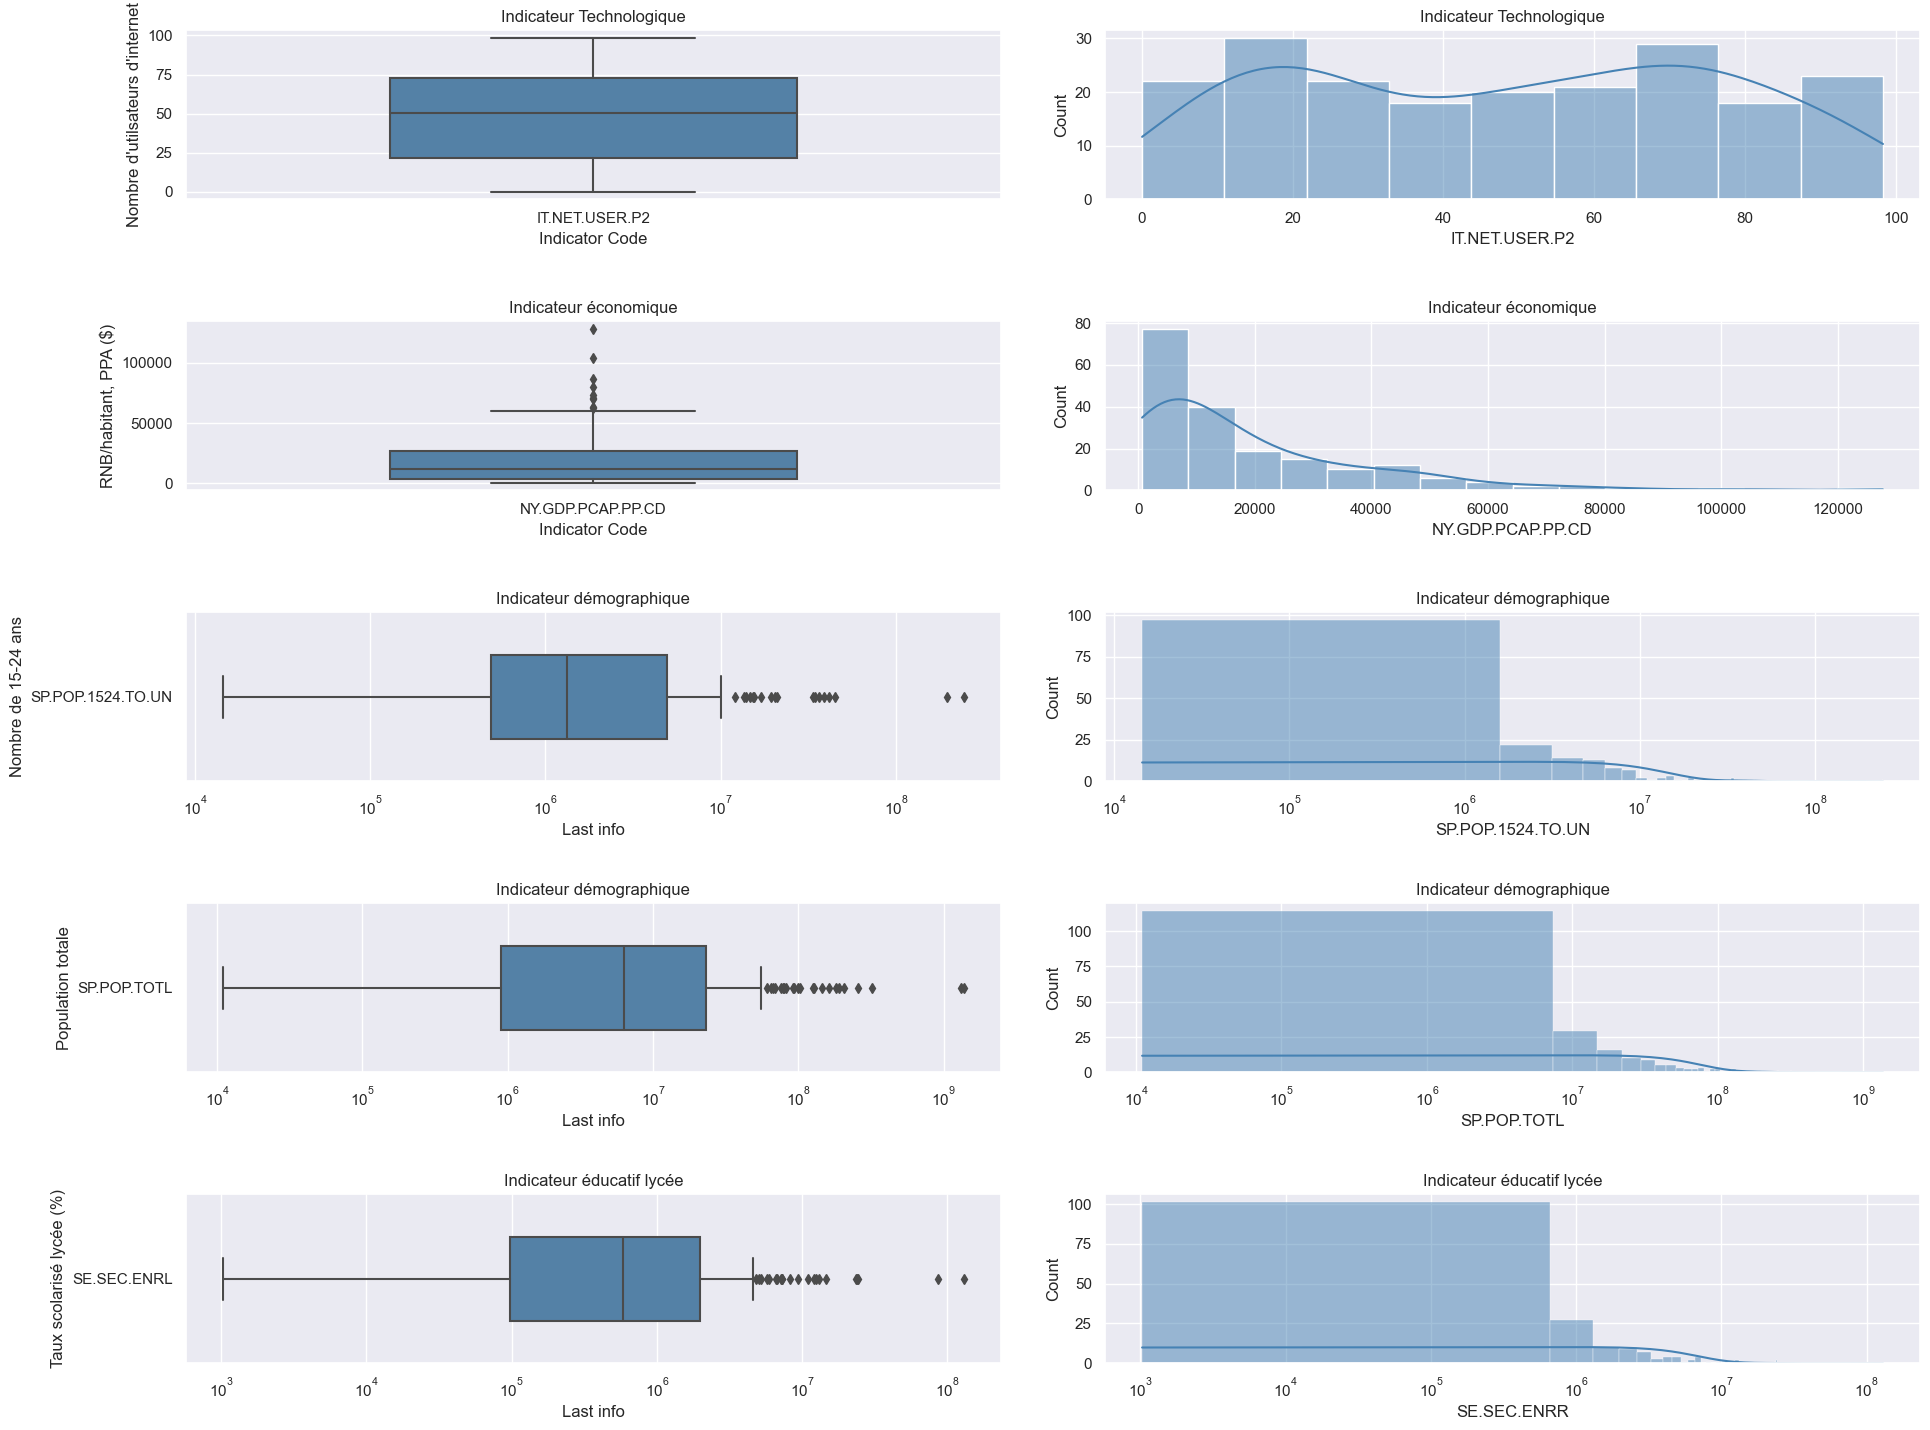

In [99]:
#Graphiques statistiques sur les 8 indicateurs  
plt.figure(figsize = (20,15))


# Indicateur Technologique : IT.NET.USER.P2
plt.subplot(5,2,1)
sns.boxplot( x=tech['Indicator Code'], y=tech['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur Technologique')
plt.ylabel('Nombre d\'utilsateurs d\'internet')

plt.subplot(5,2,2)
sns.histplot(tech['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur Technologique')
plt.xlabel('IT.NET.USER.P2')


# Indicateur économique : NY.GDP.PCAP.PP.CD
plt.subplot(5,2,3)
sns.boxplot( x=eco['Indicator Code'], y=eco['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur économique')
plt.ylabel('RNB/habitant, PPA ($)')

plt.subplot(5,2,4)
sns.histplot(eco['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur économique')
plt.xlabel('NY.GDP.PCAP.PP.CD')


# Indicateur démographique : SP.POP.1524.TO.UN
plt.subplot(5,2,5)
sns.boxplot( y=pop1524['Indicator Code'], x=pop1524['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xscale('log')
plt.ylabel('Nombre de 15-24 ans')

plt.subplot(5,2,6)
sns.histplot(pop1524['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xscale('log')
plt.xlabel('SP.POP.1524.TO.UN')


# Indicateur démographique : SP.POP.TOTL
plt.subplot(5,2,7)
sns.boxplot( y=poptot['Indicator Code'], x=poptot['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xscale('log')
plt.ylabel('Population totale')

plt.subplot(5,2,8)
sns.histplot(poptot['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur démographique')
plt.xscale('log')
plt.xlabel('SP.POP.TOTL')


# Indicateur éducatif lycée : SE.SEC & SE.TER total
plt.subplot(5,2,9)
sns.boxplot( y=df_edu_sec['Indicator Code'], x=df_edu_sec['Last info'], width=0.5, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xscale('log')
plt.ylabel('Taux scolarisé lycée (%)')

plt.subplot(5,2,10)
sns.histplot(df_edu_sec['Last info'], kde = True, color='SteelBlue')
plt.title('Indicateur éducatif lycée')
plt.xscale('log')
plt.xlabel('SE.SEC.ENRR')

plt.tight_layout()

L'écart-type et la variance des indicateurs SP.POP.1524.TO.UN, SP.POP.TOTL, SE.SEC.ENRR est très important (exprimé en dizaine de million), cela fausse les représentations visuelles. Cela est dû à la présence d'outliers.
L'indicateur technologique présente une répartition des pays en 3 groupes 20 %, 65% . et 90%.
Les indicateurs de population sont fortement corrélés. Leur pertinence sera à réévaluer. 


## Second tri de données


Le second tri de données a pour but d'affiner le tri en supprimant les variables en dessous de certaines valeurs. Le choix de ces valeurs peut être guidé par les indicateurs de valeurs centrales ou être décidé de manière empirique, en fonction de l'importance de l'indicateur dans le choix des pays ciblés. 

In [100]:
#Suppression des pays en dessous de 75 % d'équipement à internet, choix empirique
tech_final = tech.drop(tech[tech['Last info'] <60].index)
tech_choix = tech_final.sort_values(by = 'Last info', ascending = False)

#Suppression des pays en dessous de 19894 $, valeur médiane, de PIB
eco_final = eco.drop(eco[eco['Last info'] <19894].index)
eco_choix = eco_final.sort_values(by = 'Last info', ascending = False)

#Suppression des "petits" pays, avec moins de 10 millions d'habitants, choix empirique
poptot_final = poptot.drop(poptot[poptot['Last info'] <10000000].index)
poptot_choix = poptot_final.sort_values(by = 'Last info', ascending = False)

#Suppression des pays, avec moins de 360274 lycéens et étudiants, valeur moyenne
edutotal_final = edutotal.drop(edutotal[edutotal['Last info'] <360274].index)
edutotal_choix = edutotal_final.sort_values(by = 'Last info', ascending = False)
    
#Suppression des pays, avec moins de 1 331 040 jeunes entre 15 et 24 ans, valeur médiane
pop1524_final = pop1524.drop(pop1524[pop1524['Last info'] <1331040].index)
pop1524_choix = pop1524_final.sort_values(by = 'Last info', ascending = False)

In [101]:
#Création d'un tableau donnant les moyennes et les médianes des indicateurs retenus pour le choix final
files_description = pd.DataFrame(columns = ["Nombre pays", "Indicateur", "Minimum", "Maximum", "Médianes", "Moyennes", "Variance", "Ecart-Type", "Description"],
                                 index = ["Indicateur Technologique",
                                          "Indicateur Economique",
                                          "Indicateur Population",
                                          "Indicateur Education",
                                          "Indicateur Population 15-24 ans"])


# Description pour chacun des fichiers
files_description["Description"] = [
    "Pourcentage d'utilisateurs d'internet",
    "PIB par habitants",
    "Population totale",
    "Population lycéens et étudiants ", 
    "Population 15 - 24 ans"
]

# Remplissage du nombre de lignes pour chaque fichier
files_description["Nombre pays"] = [
    len(tech_choix.index),
    len(eco_choix.index),
    len(poptot_choix.index),
    len(edutotal_choix.index),
    len(pop1524_choix.index)
]

#Remplissage du nombre de colonnes pour chaque fichier
files_description["Indicateur"] = [
    "IT.NET.USER.P2",
    "NY.GDP.PCAP.PP.CD",
    "SP.POP.TOTL",
    "SE.SEC & SE.TER total",
    "SP.POP.1525.TO.UN"
]

#Remplissage des minimum pour chaque indicateur
files_description["Minimum"] = [
    round(df_tech_clean['Last info'].min(),2),
    round(df_eco_clean['Last info'].min(),2),
    round(df_poptot_clean['Last info'].min(),2),
    round(df_pop1524_clean['Last info'].min(),2),
    round(df_edu_total_clean['Last info'].min(),2)  
]

#Remplissage des maximum pour chaque indicateur
files_description["Maximum"] = [
    round(df_tech_clean['Last info'].max(),2),
    round(df_eco_clean['Last info'].max(),2),
    round(df_poptot_clean['Last info'].max(),2),
    round(df_pop1524_clean['Last info'].max(),2),
    round(df_edu_total_clean['Last info'].max(),2)  
]

#Remplissage des médianes pour chaque indicateur
files_description["Médianes"] = [
    round(tech_choix['Last info'].median(),2),
    round(eco_choix['Last info'].median(),2),
    round(poptot_choix['Last info'].median(),2),
    round(edutotal_choix['Last info'].median(),2),
    round(pop1524_choix['Last info'].median(),2)
]

#Remplissage des moyennes pour chaque fichier
files_description["Moyennes"] = [
    round(tech_choix['Last info'].mean(),2),
    round(eco_choix['Last info'].mean(),2),
    round(poptot_choix['Last info'].mean(),2),
    round(edutotal_choix['Last info'].mean(),2),
    round(pop1524_choix['Last info'].mean(),2)
]

#Remplissage de la variance pour chaque fichier
files_description["Variance"] = [
    round(tech_choix['Last info'].var(ddof=0),2),
    round(eco_choix['Last info'].var(ddof=0),2),
    round(poptot_choix['Last info'].var(ddof=0),2),
    round(edutotal_choix['Last info'].var(ddof=0),2),
    round(pop1524_choix['Last info'].var(ddof=0),2)
]

#Remplissage de l'ecart-type pour chaque fichier
files_description["Ecart-Type"] = [
    round(tech_choix['Last info'].std(ddof=0),2),
    round(eco_choix['Last info'].std(ddof=0),2),
    round(poptot_choix['Last info'].std(ddof=0),2),
    round(edutotal_choix['Last info'].std(ddof=0),2),
    round(pop1524_choix['Last info'].std(ddof=0),2)
]

files_description

Nombre pays             Indicateur   Minimum  \
Indicateur Technologique                  80         IT.NET.USER.P2      0.00   
Indicateur Economique                     65      NY.GDP.PCAP.PP.CD    668.34   
Indicateur Population                     87            SP.POP.TOTL  11001.00   
Indicateur Education                     109  SE.SEC & SE.TER total  14455.00   
Indicateur Population 15-24 ans           91      SP.POP.1525.TO.UN      0.00   

                                     Maximum     Médianes     Moyennes  \
Indicateur Technologique         9.83200e+01  7.70000e+01  7.85100e+01   
Indicateur Economique            1.27764e+05  3.59738e+04  4.17538e+04   
Indicateur Population            1.37122e+09  3.11551e+07  8.01518e+07   
Indicateur Education             2.44120e+08  1.54641e+06  5.12184e+06   
Indicateur Population 15-24 ans  1.29542e+08  4.94544e+06  1.27430e+07   

                                    Variance   Ecart-Type  \
Indicateur Technologique         1.13570e+02  1.06600e+01   
Indicateur Economique            4.14067e+08  2.03486e+04   
Indicateur Population            4.05235e+16  2.01305e+08   
Indicateur Education             2.26510e+14  1.50502e+07   
Indicateur Population 15-24 ans  1.06849e+15  3.26877e+07   

                                                           Description  
Indicateur Technologique         Pourcentage d'utilisateurs d'internet  
Indicateur Economique                                PIB par habitants  
Indicateur Population                                Population totale  
Indicateur Education                  Population lycéens et étudiants   
Indicateur Population 15-24 ans                 Population 15 - 24 ans

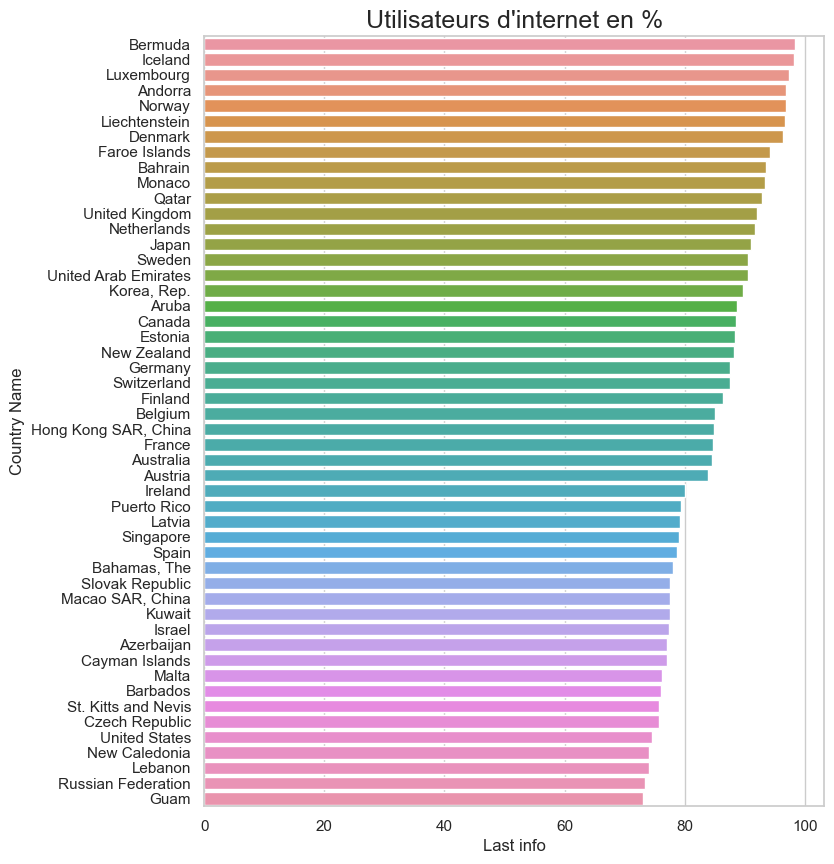

In [102]:
#Représentation visuelle du nombre d'utilisateurs internet en %, 50 pays
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Utilisateurs d\'internet en %', size=18)
plot = sns.barplot(y = tech_choix.iloc[:50]['Country Name'], 
                   x = tech_choix.iloc[:50]['Last info'])

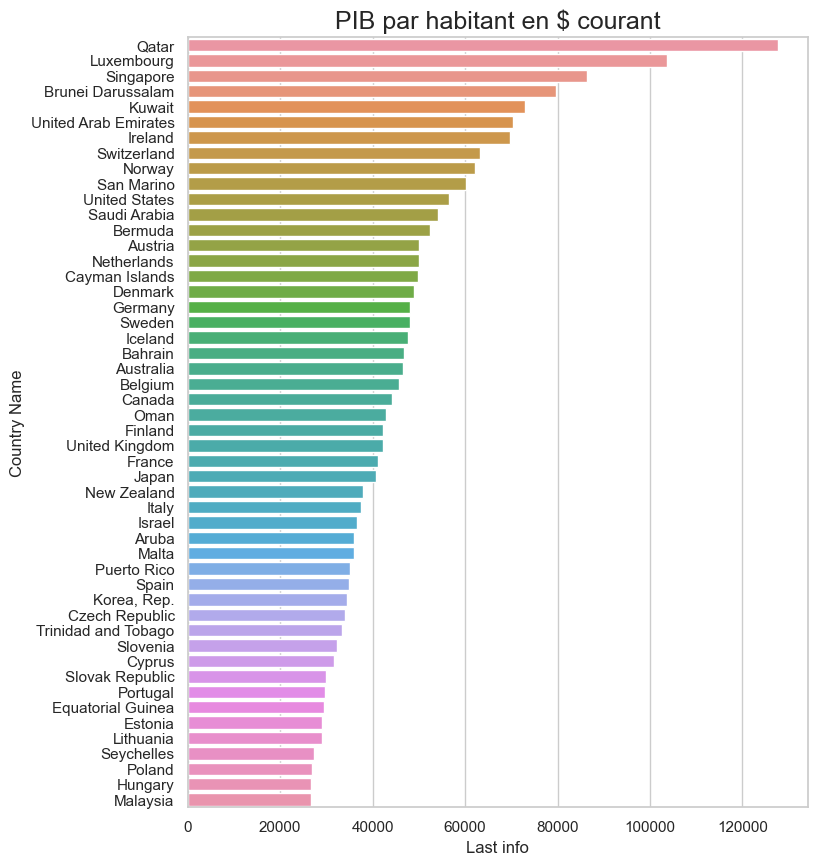

In [103]:
#Représentation visuelle du PIB par habitants en $ courant, 50 pays
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('PIB par habitant en $ courant', size=18)
plot = sns.barplot(y = eco_choix.iloc[:50]['Country Name'], 
                   x = eco_choix.iloc[:50]['Last info'])


Nous pouvons nous poser la question sur la présence d'un outlier pour le Qatar, selon la banque mondiale, son GDP per capita était de 66984 $ en 2015


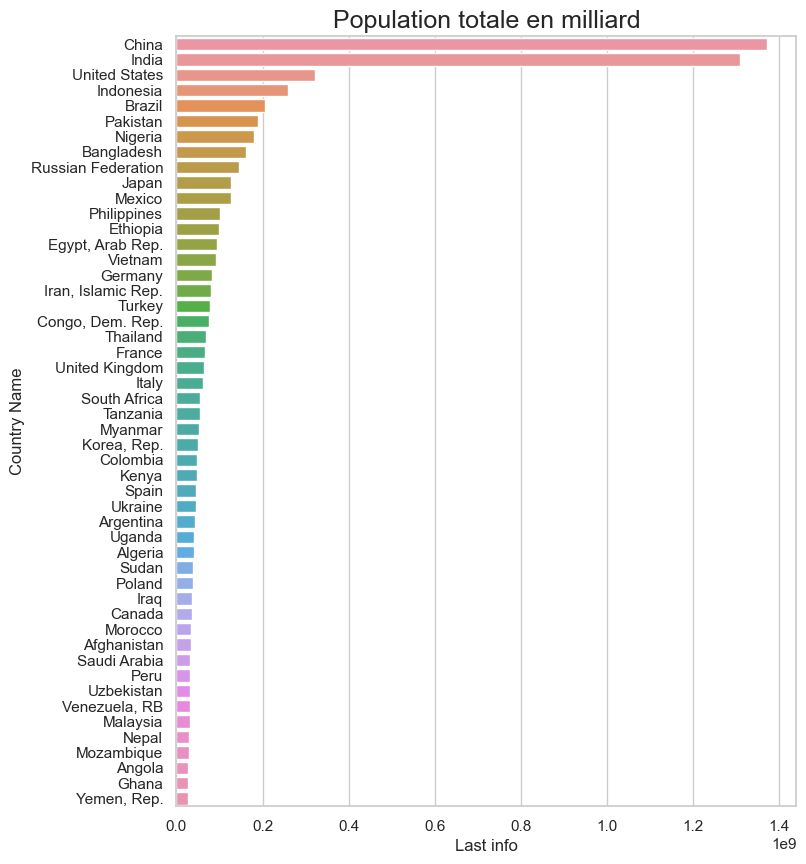

In [104]:
#Représentation visuelle de la population totale en milliard, 50 pays
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Population totale en milliard', size=18)
plot = sns.barplot(y = poptot_choix.iloc[:50]['Country Name'], 
                   x = poptot_choix.iloc[:50]['Last info'])

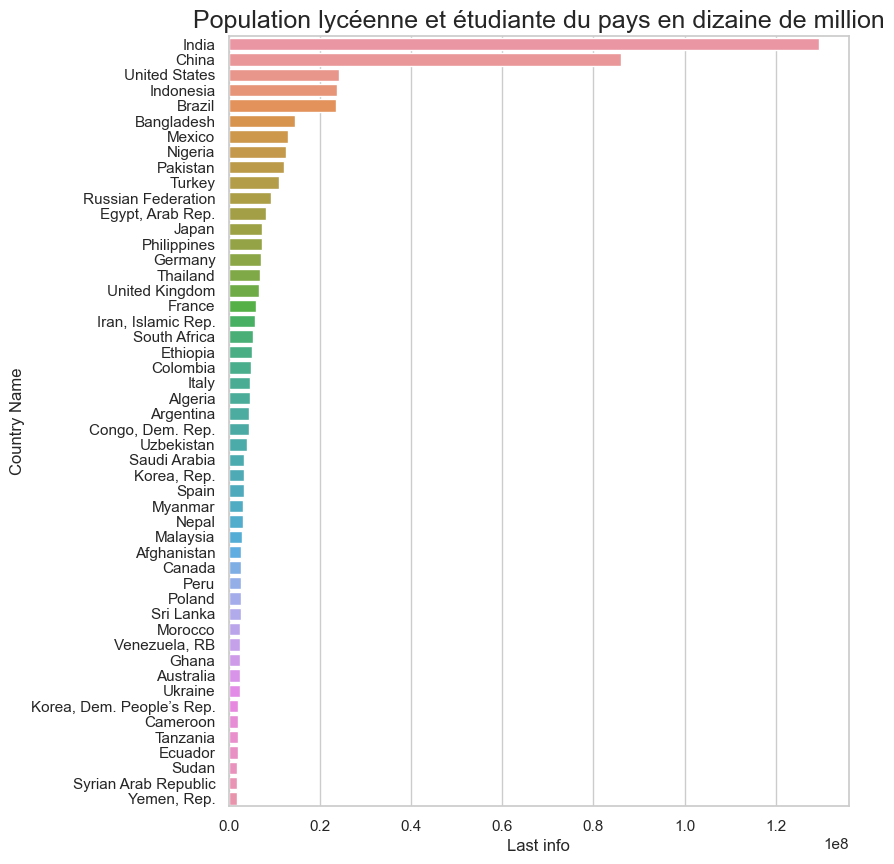

In [105]:
#Représentation visuelle la population lycéenne et étudiante en dizaine de million
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Population lycéenne et étudiante du pays en dizaine de million', size=18)
plot = sns.barplot(y = edutotal_choix.iloc[:50]['Country Name'], 
                   x = edutotal_choix.iloc[:50]['Last info'])

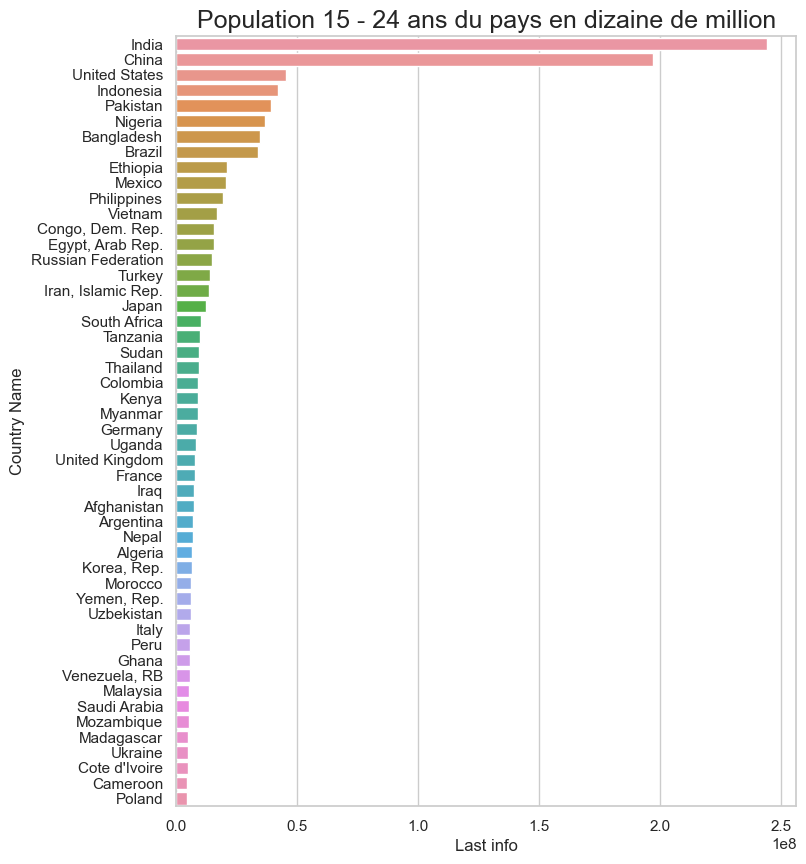

In [106]:
#Représentation visuelle la population des 15-24 ans en dizaine de million
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Population 15 - 24 ans du pays en dizaine de million', size=18)
plot = sns.barplot(y = pop1524_choix.iloc[:50]['Country Name'], 
                   x = pop1524_choix.iloc[:50]['Last info'])

## Création du dataframe final

In [107]:
#Concatenation des dataframes
df_choix1 = tech_choix.append(eco_choix)
df_choix2 = poptot_choix.append(edutotal_choix)
#Modification des NAN en SE.SEC & SE.TER total sur la colonne Indicator Code
df_choix2['Indicator Code'] = df_choix2['Indicator Code'].replace(np.nan, 'SE.SEC & SE.TER total')
#Création du dataframe final
df_choix_nan = df_choix1.append(df_choix2)
df_choix_na = df_choix_nan.append(pop1524_choix)
df_choix_final = df_choix_na.dropna(axis='columns')
df_choix_final


/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/2592084967.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_choix1 = tech_choix.append(eco_choix)
/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/2592084967.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_choix2 = poptot_choix.append(edutotal_choix)
/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/2592084967.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_choix_nan = df_choix1.append(df_choix2)
/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/2592084967.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  

Country Name     Indicator Code    Last info
171       Bermuda     IT.NET.USER.P2  9.83236e+01
699       Iceland     IT.NET.USER.P2  9.82000e+01
923    Luxembourg     IT.NET.USER.P2  9.73341e+01
35        Andorra     IT.NET.USER.P2  9.69100e+01
1171       Norway     IT.NET.USER.P2  9.68103e+01
...           ...                ...          ...
862       Lao PDR  SP.POP.1524.TO.UN  1.49372e+06
398          Cuba  SP.POP.1524.TO.UN  1.42163e+06
478   El Salvador  SP.POP.1524.TO.UN  1.41162e+06
1222     Paraguay  SP.POP.1524.TO.UN  1.36351e+06
790        Jordan  SP.POP.1524.TO.UN  1.33104e+06

[432 rows x 3 columns]

In [108]:
#Création de la liste des indicateurs utilisés
indicators = ['IT.NET.USER.P2',	
            'NY.GDP.PCAP.PP.CD', 
            'SE.SEC & SE.TER total', 
            'SP.POP.1524.TO.UN',	
            'SP.POP.TOTL']
            

In [109]:
#Boucle affichant la liste des pays par ordre decroissant 
for i in indicators:

    choix_final= df_choix_final.loc[(df_choix_final['Indicator Code']==i)].sort_values('Last info', ascending = False)
    print("Indicateur ", i, " : \n")
    print (choix_final[['Country Name', 'Last info']].head(10), "\n")


Indicateur  IT.NET.USER.P2  : 

       Country Name  Last info
171         Bermuda   98.32361
699         Iceland   98.20000
923      Luxembourg   97.33410
35          Andorra   96.91000
1171         Norway   96.81030
907   Liechtenstein   96.64120
427         Denmark   96.33050
515   Faroe Islands   94.20000
115         Bahrain   93.47830
1043         Monaco   93.36330 

Indicateur  NY.GDP.PCAP.PP.CD  : 

              Country Name     Last info
1265                 Qatar  127764.46234
921             Luxembourg  103732.63929
1361             Singapore   86306.30891
225      Brunei Darussalam   79593.28072
841                 Kuwait   73059.56244
1633  United Arab Emirates   70391.22013
737                Ireland   69627.54093
1505           Switzerland   63291.53828
1169                Norway   62066.80819
1305            San Marino   60145.46093 

Indicateur  SE.SEC & SE.TER total  : 

      Country Name    Last info
88           India  1.29542e+08
41           China  8.61272e+07
20

In [110]:
#Création de la table croisée 
df_choix_pivot= df_choix_final.pivot_table(index=['Country Name'], columns="Indicator Code")['Last info']
df_choix_pivot.shape;
df_choix_final_clean = df_choix_pivot.dropna(axis=0).reset_index(drop = False)

## Choix des pays candidats

### Uniformisation des indicateurs par la méthode MinMax Scale

La fonction MinMax scale permet d'uniformiser les indicateurs des dataframes en les ramenant entre 1 et 0. Cela va nous permettre de créer un indicateur composite qui sera la moyenne pondérée de chaque indicateur.
Un coéfficient de pondération est donc appliqué à chacun des indicateurs selon leur poids dans le choix : 
* IT.NET.USER.P2 : 25 %
* NY.GDP.PCAP.PP.CD : 25 %
* SE.SEC & SE.TER total : 15 %
* SP.POP.1524.TO.UN : 15 %
* SP.POP.TOTL : 10 %




In [111]:
#uniformisation des indicateurs 
choix_final = df_choix_pivot
minmax_scale = MinMaxScaler((0,1))
choix_final[indicators] = minmax_scale.fit_transform(choix_final[indicators])
choix_final.head(5)

Indicator Code  IT.NET.USER.P2  NY.GDP.PCAP.PP.CD  SE.SEC & SE.TER total  \
Country Name                                                               
Afghanistan                NaN                NaN                0.01810   
Albania                0.08214                NaN                    NaN   
Algeria                    NaN                NaN                0.03261   
Andorra                0.96300                NaN                    NaN   
Angola                     NaN                NaN                0.00406   

Indicator Code  SP.POP.1524.TO.UN  SP.POP.TOTL  
Country Name                                    
Afghanistan               0.02439      0.01729  
Albania                       NaN          NaN  
Algeria                   0.02116      0.02180  
Andorra                       NaN          NaN  
Angola                    0.01206      0.01298

In [112]:
#Pondération des indicateurs pour le choix final
choix_final['indicateur_composite'] = (choix_final['IT.NET.USER.P2']*0.25 
 + choix_final['NY.GDP.PCAP.PP.CD']*0.25 + 
 choix_final['SE.SEC & SE.TER total']*0.15 +
 choix_final['SP.POP.1524.TO.UN']*0.15 +  
 choix_final['SP.POP.TOTL']*0.10)

In [113]:
#Utilisation de la fonction MinMaxScaler et création de la variable indicateur composite
choix_minmax = MinMaxScaler((0,100))
choix_final['indicateur_composite']=choix_minmax.fit_transform(np.array(choix_final['indicateur_composite']).reshape(-1, 1))

In [114]:
#Classement des pays par ordre décroissant 
df_indicateur_pays = choix_final.groupby('Country Name')['indicateur_composite'].agg('median').reset_index()
df_indicateur_pays.columns=['Country Name','indicateur_composite']


In [115]:
#uniformisation des indicateurs 
choix_final = df_choix_final_clean
minmax_scale = MinMaxScaler((0,1))
choix_final[indicators] = minmax_scale.fit_transform(choix_final[indicators])
choix_final

Indicator Code        Country Name  IT.NET.USER.P2  NY.GDP.PCAP.PP.CD  \
0                        Argentina         0.13547            0.00000   
1                        Australia         0.73153            0.72310   
2                           Canada         0.87260            0.66017   
3                            Chile         0.00000            0.08866   
4                           France         0.73636            0.57630   
5                          Germany         0.84084            0.77005   
6                            Japan         0.96600            0.56267   
7                       Kazakhstan         0.31074            0.13070   
8                      Korea, Rep.         0.91514            0.38909   
9                         Malaysia         0.24449            0.17444   
10                     Netherlands         0.99003            0.82225   
11                          Poland         0.13381            0.17947   
12              Russian Federation         0.32914            0.09208   
13                    Saudi Arabia         0.19224            0.93488   
14                           Spain         0.51967            0.40059   
15                  United Kingdom         1.00000            0.60253   
16                   United States         0.37043            1.00000   

Indicator Code  SE.SEC & SE.TER total  SP.POP.1524.TO.UN  SP.POP.TOTL  
0                             0.12804            0.11313      0.08711  
1                             0.03637            0.02106      0.02253  
2                             0.05075            0.05488      0.06221  
3                             0.00000            0.01880      0.00271  
4                             0.19401            0.12892      0.16346  
5                             0.24540            0.15476      0.21301  
6                             0.25045            0.23531      0.36256  
7                             0.00586            0.00897      0.00199  
8                             0.08158            0.10316      0.11210  
9                             0.06369            0.07711      0.04535  
10                            0.00296            0.00000      0.00000  
11                            0.04827            0.05559      0.06924  
12                            0.34555            0.29336      0.41834  
13                            0.08258            0.07631      0.04809  
14                            0.07789            0.05285      0.09708  
15                            0.22089            0.13272      0.15854  
16                            1.00000            1.00000      1.00000

In [116]:
#Création du dataframe choix_final_viz
df_choix_viz = df_indicateur_pays.sort_values('indicateur_composite', ascending= False)
choix_final_viz = df_choix_viz.head(15)
choix_final_viz

Country Name  indicateur_composite
103         Netherlands             100.00000
154      United Kingdom              98.42332
73                Japan              97.82572
54              Germany              93.28164
155       United States              90.77191
28               Canada              87.20799
78          Korea, Rep.              82.30269
8             Australia              77.86508
52               France              77.34380
136               Spain              52.15325
125        Saudi Arabia              45.94670
122  Russian Federation              35.61822
75           Kazakhstan              24.83913
91             Malaysia              23.15989
117              Poland              14.80634

<AxesSubplot: title={'center': 'Choix des pays'}, xlabel='indicateur_composite', ylabel='Country Name'>

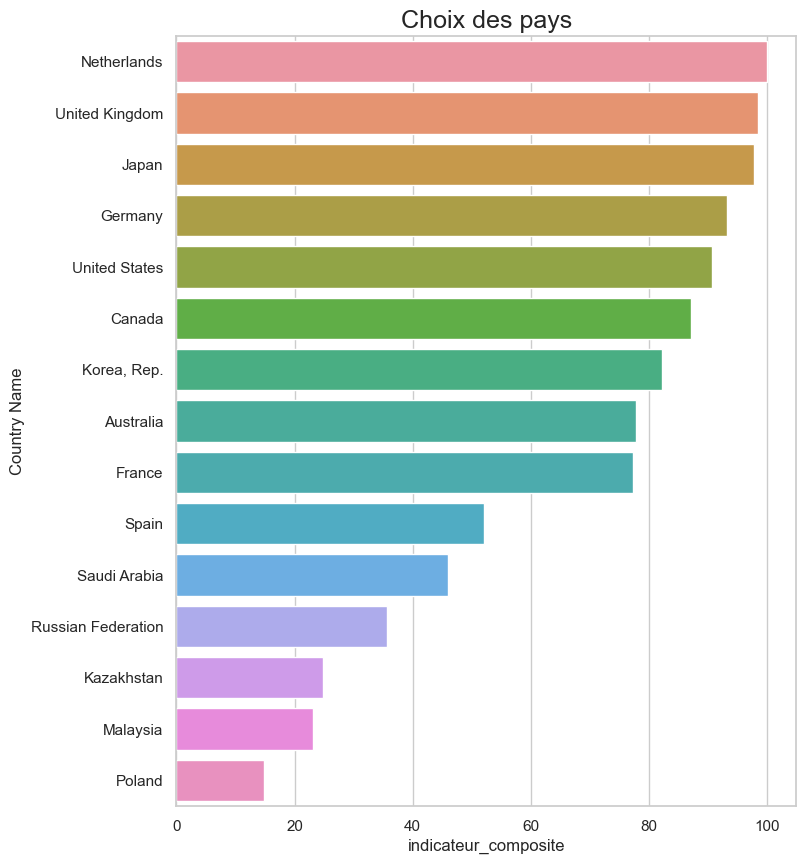

In [117]:
#Visuel de choix des pays
sns.set(style="whitegrid")
plt.figure(figsize=(8, 10))
plt.title('Choix des pays', size=18)
sns.barplot(x=choix_final_viz['indicateur_composite'],
        y =choix_final_viz['Country Name'], data=choix_final)

<AxesSubplot: >

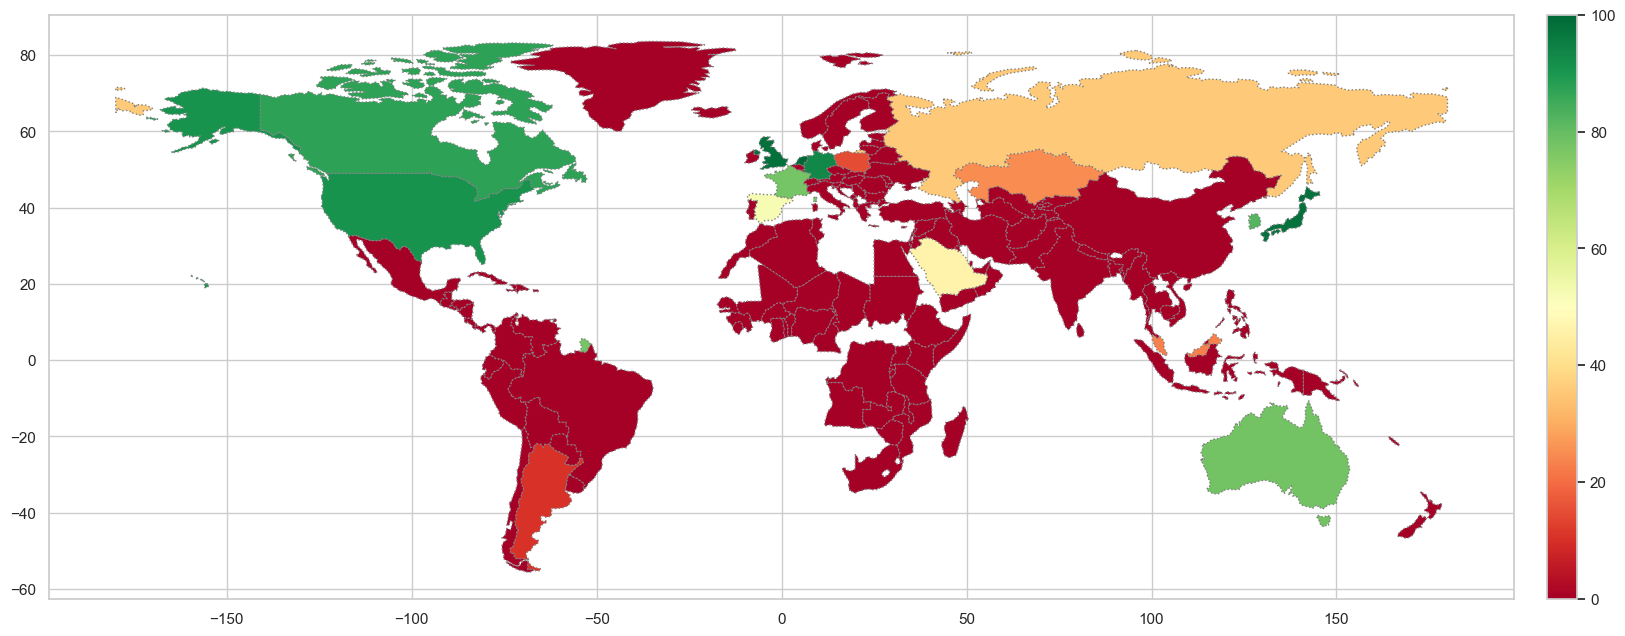

In [118]:
#Importation du dataset des pays du monde de geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world.loc[world.index[[4,11,17,18, 149,66,67,153,163,80,107,105,152,108,40,157,96]], 'name'] = ["United States", "Congo, Dem. Rep.","Dominican Republic","Russian Federation","Brunei Darussalam","Central African Republic","Congo, Rep.","Czech Republic","Egypt, Arab Rep.","Gambia, The","Iran, Islamic Rep.","Kyrgyz Republic","Slovak Republic","Syrian Arab Republic","Venezuela, RB", "Yemen, Rep.","Korea, Rep."]
#Merge des df world et df_indicateurs
geomap_df = world.merge(df_indicateur_pays, left_on = 'name', right_on = 'Country Name')[['geometry','Country Name','indicateur_composite']]
geomap_clean = geomap_df.fillna(0)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
fig.set_size_inches(20,12)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
geomap_clean.plot(column=geomap_clean['indicateur_composite'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle=":",edgecolor='grey' )

Les pays devant être choisis en priorité pour le développement de la sociéte sont : 
* Les états-unis 
* Le japon
* L'allemagne
* Le royaume-uni
* Les pays-bas


## Evolution des pays choisis

Nous avons choisi de cibler les indicateurs de projection Wittgenstein. Le Wittgenstein Center applique un modèle de scénario moyrn de croissance démographique et de niveau d'éducation aux estimations démographiques de World Population Prospects, pour produire des prévisions de population nationale ventilées par niveau d'éducation sur des intervalles de cinq ans. Le scénario moyen suppose une fécondité moyenne, une mortalité moyenne, une migration moyenne et le scénario de l'éducation selon la tendance mondiale de l'éducation (GET). Les chiffres du Wittgenstein Center sont convertis d'intervalles de cinq ans en chiffres annuels par interpolation linéaire. Plus de détails sur la méthodologie derrière ces chiffres peuvent être trouvés à: https://www.wittgensteincentre.org/en/data.htm


Ces derniers commencent tous par PRJ.POP. 
Le critère suivant discrimine l'age, dans notre cas, nous allons étudier toutes les classes d'age, et non plus seulement les 10-15 et 15-24 ans : notre offre peut s'adresser à tous. Le dicriminant sera donc .ALL



In [119]:
# Cible : Population ayant fini les études secondaires ou tertiaires
pd.set_option('max_colwidth', None)
proj_witt=[row for row in series['Series Code'] if ('PRJ.POP.') in row]
series[series['Series Code'].isin(proj_witt)][['Series Code','Indicator Name','Topic','Long definition']]

Series Code  \
1922    PRJ.POP.1519.1.FE   
1923    PRJ.POP.1519.1.MA   
1924    PRJ.POP.1519.1.MF   
1925    PRJ.POP.1519.2.FE   
1926    PRJ.POP.1519.2.MA   
1927    PRJ.POP.1519.2.MF   
1928    PRJ.POP.1519.3.FE   
1929    PRJ.POP.1519.3.MA   
1930    PRJ.POP.1519.3.MF   
1931    PRJ.POP.1519.4.FE   
1932    PRJ.POP.1519.4.MA   
1933    PRJ.POP.1519.4.MF   
1934  PRJ.POP.1519.NED.FE   
1935  PRJ.POP.1519.NED.MA   
1936  PRJ.POP.1519.NED.MF   
1937   PRJ.POP.1519.S1.FE   
1938   PRJ.POP.1519.S1.MA   
1939   PRJ.POP.1519.S1.MF   
1940    PRJ.POP.2024.1.FE   
1941    PRJ.POP.2024.1.MA   
1942    PRJ.POP.2024.1.MF   
1943    PRJ.POP.2024.2.FE   
1944    PRJ.POP.2024.2.MA   
1945    PRJ.POP.2024.2.MF   
1946    PRJ.POP.2024.3.FE   
1947    PRJ.POP.2024.3.MA   
1948    PRJ.POP.2024.3.MF   
1949    PRJ.POP.2024.4.FE   
1950    PRJ.POP.2024.4.MA   
1951    PRJ.POP.2024.4.MF   
1952  PRJ.POP.2024.NED.FE   
1953  PRJ.POP.2024.NED.MA   
1954  PRJ.POP.2024.NED.MF   
1955   PRJ.POP.2024.S1.FE   
1956   PRJ.POP.2024.S1.MA   
1957   PRJ.POP.2024.S1.MF   
1958    PRJ.POP.2529.1.FE   
1959    PRJ.POP.2529.1.MA   
1960    PRJ.POP.2529.1.MF   
1961    PRJ.POP.2529.2.FE   
1962    PRJ.POP.2529.2.MA   
1963    PRJ.POP.2529.2.MF   
1964    PRJ.POP.2529.3.FE   
1965    PRJ.POP.2529.3.MA   
1966    PRJ.POP.2529.3.MF   
1967    PRJ.POP.2529.4.FE   
1968    PRJ.POP.2529.4.MA   
1969    PRJ.POP.2529.4.MF   
1970  PRJ.POP.2529.NED.FE   
1971  PRJ.POP.2529.NED.MA   
1972  PRJ.POP.2529.NED.MF   
1973   PRJ.POP.2529.S1.FE   
1974   PRJ.POP.2529.S1.MA   
1975   PRJ.POP.2529.S1.MF   
1976     PRJ.POP.ALL.1.FE   
1977     PRJ.POP.ALL.1.MA   
1978     PRJ.POP.ALL.1.MF   
1979     PRJ.POP.ALL.2.FE   
1980     PRJ.POP.ALL.2.MA   
1981     PRJ.POP.ALL.2.MF   
1982     PRJ.POP.ALL.3.FE   
1983     PRJ.POP.ALL.3.MA   
1984     PRJ.POP.ALL.3.MF   
1985     PRJ.POP.ALL.4.FE   
1986     PRJ.POP.ALL.4.MA   
1987     PRJ.POP.ALL.4.MF   
1988   PRJ.POP.ALL.NED.FE   
1989   PRJ.POP.ALL.NED.MA   
1990   PRJ.POP.ALL.NED.MF   
1991    PRJ.POP.ALL.S1.FE   
1992    PRJ.POP.ALL.S1.MA   
1993    PRJ.POP.ALL.S1.MF   

                                                                                                            Indicator Name  \
1922             Projection: Population age 15-19 in thousands by highest level of educational attainment. Primary. Female   
1923               Projection: Population age 15-19 in thousands by highest level of educational attainment. Primary. Male   
1924              Projection: Population age 15-19 in thousands by highest level of educational attainment. Primary. Total   
1925     Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Female   
1926       Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Male   
1927      Projection: Population age 15-19 in thousands by highest level of educational attainment. Lower Secondary. Total   
1928     Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Female   
1929       Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Male   
1930      Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1931      Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Female   
1932        Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Male   
1933       Projection: Population age 15-19 in thousands by highest level of educational attainment. Post Secondary. Total   
1934        Projection: Population age 15-19 in thousands by highest level of educational attainment. No Education. Female   
1935          Projection: Population age 15-19 in thousands by highest level of educational attainment. No Education. Male   
1936  

In [120]:
# Cible : Population ayant fini les études secondaires ou tertiaires
pd.set_option('max_colwidth', None)
proj_barrolee=[row for row in series['Series Code'] if ('BAR.POP.') in row]
series[series['Series Code'].isin(proj_barrolee)][['Series Code','Indicator Name','Topic','Long definition']]

Series Code                                         Indicator Name  \
30     BAR.POP.1519   Barro-Lee: Population in thousands, age 15-19, total   
31  BAR.POP.1519.FE  Barro-Lee: Population in thousands, age 15-19, female   
32     BAR.POP.15UP     Barro-Lee: Population in thousands, age 15+, total   
33  BAR.POP.15UP.FE    Barro-Lee: Population in thousands, age 15+, female   
34     BAR.POP.2024   Barro-Lee: Population in thousands, age 20-24, total   
35  BAR.POP.2024.FE  Barro-Lee: Population in thousands, age 20-24, female   
36     BAR.POP.2529   Barro-Lee: Population in thousands, age 25-29, total   
37  BAR.POP.2529.FE  Barro-Lee: Population in thousands, age 25-29, female   
38     BAR.POP.25UP     Barro-Lee: Population in thousands, age 25+, total   
39  BAR.POP.25UP.FE    Barro-Lee: Population in thousands, age 25+, female   
40     BAR.POP.3034   Barro-Lee: Population in thousands, age 30-34, total   
41  BAR.POP.3034.FE  Barro-Lee: Population in thousands, age 30-34, female   
42     BAR.POP.3539   Barro-Lee: Population in thousands, age 35-39, total   
43  BAR.POP.3539.FE  Barro-Lee: Population in thousands, age 35-39, female   
44     BAR.POP.4044   Barro-Lee: Population in thousands, age 40-44, total   
45  BAR.POP.4044.FE  Barro-Lee: Population in thousands, age 40-44, female   
46     BAR.POP.4549   Barro-Lee: Population in thousands, age 45-49, total   
47  BAR.POP.4549.FE  Barro-Lee: Population in thousands, age 45-49, female   
48     BAR.POP.5054   Barro-Lee: Population in thousands, age 50-54, total   
49  BAR.POP.5054.FE  Barro-Lee: Population in thousands, age 50-54, female   
50     BAR.POP.5559   Barro-Lee: Population in thousands, age 55-59, total   
51  BAR.POP.5559.FE  Barro-Lee: Population in thousands, age 55-59, female   
52     BAR.POP.6064   Barro-Lee: Population in thousands, age 60-64, total   
53  BAR.POP.6064.FE  Barro-Lee: Population in thousands, age 60-64, female   
54     BAR.POP.6569   Barro-Lee: Population in thousands, age 65-69, total   
55  BAR.POP.6569.FE  Barro-Lee: Population in thousands, age 65-69, female   
56     BAR.POP.7074   Barro-Lee: Population in thousands, age 70-74, total   
57  BAR.POP.7074.FE  Barro-Lee: Population in thousands, age 70-74, female   
58     BAR.POP.75UP     Barro-Lee: Population in thousands, age 75+, total   
59  BAR.POP.75UP.FE    Barro-Lee: Population in thousands, age 75+, female   

         Topic  \
30  Attainment   
31  Attainment   
32  Attainment   
33  Attainment   
34  Attainment   
35  Attainment   
36  Attainment   
37  Attainment   
38  Attainment   
39  Attainment   
40  Attainment   
41  Attainment   
42  Attainment   
43  Attainment   
44  Attainment   
45  Attainment   
46  Attainment   
47  Attainment   
48  Attainment   
49  Attainment   
50  Attainment   
51  Attainment   
52  Attainment   
53  Attainment   
54  Attainment   
55  Attainment   
56  Attainment   
57  Attainment   
58  Attainment   
59  Attainment   

                                                                                                                Long definition  
30    Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee.  
31  Population in thousands, age 15-19, female is the female population of 15-19 year olds in thousands estimated by Barro-Lee.  
32             Population in thousands, age 15+, total is the total population over age 15 in thousands estimated by Barro-Lee.  
33           Population in thousands, age 15+, female is the female population over age 15 in thousands estimated by Barro-Lee.  
34    Population in thousands, age 20-24, total is the total population of 20-24 year olds in thousands estimated by Barro-Lee.  
35  Population in thousands, age 20-24, female is the female population of 20-24 year olds in thousands estimated by Barro-Lee.  
36    Population in thousands, age 25-29, total is the total population of 25-29 year olds in thousands estimated by Bar

Le critère le plus universel est le PRJ.POP.ALL.4.MF . Le 4 correspond au fait que les études secondaires ou tertiaires ont été achevées. MF pour Male / Female. Les indicateurs PROJ.POP.1519.3 MF et PRJ.POP.ALL.3.POP sont aussi significatifs.
Nous sélectionnerons aussi les critères de population globale Barro-lee : BAR.POP.1519 et BAR.POP.2024

### Création du dataset

#### Evolution du potentiel de client


In [121]:
#Melt du DF donneesStat afin de passer les années d'index vers valeurs
donneesStat_melt = donneesStat.melt(id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], value_vars = ['2020', '2025', '2030', '2035', '2040', '2045', '2050'], var_name = 'Year', value_name = 'Value')
donneesStat_melt


Country Name Country Code  \
0         Arab World          ARB   
1         Arab World          ARB   
2         Arab World          ARB   
3         Arab World          ARB   
4         Arab World          ARB   
...              ...          ...   
6208505     Zimbabwe          ZWE   
6208506     Zimbabwe          ZWE   
6208507     Zimbabwe          ZWE   
6208508     Zimbabwe          ZWE   
6208509     Zimbabwe          ZWE   

                                                                  Indicator Name  \
0                   Adjusted net enrolment rate, lower secondary, both sexes (%)   
1                       Adjusted net enrolment rate, lower secondary, female (%)   
2        Adjusted net enrolment rate, lower secondary, gender parity index (GPI)   
3                         Adjusted net enrolment rate, lower secondary, male (%)   
4                           Adjusted net enrolment rate, primary, both sexes (%)   
...                                                                          ...   
6208505                  Youth illiterate population, 15-24 years, male (number)   
6208506              Youth literacy rate, population 15-24 years, both sexes (%)   
6208507                  Youth literacy rate, population 15-24 years, female (%)   
6208508   Youth literacy rate, population 15-24 years, gender parity index (GPI)   
6208509                    Youth literacy rate, population 15-24 years, male (%)   

               Indicator Code  Year  Value  
0                  UIS.NERA.2  2020    NaN  
1                UIS.NERA.2.F  2020    NaN  
2              UIS.NERA.2.GPI  2020    NaN  
3                UIS.NERA.2.M  2020    NaN  
4                 SE.PRM.TENR  2020    NaN  
...                       ...   ...    ...  
6208505      UIS.LP.AG15T24.M  2050    NaN  
6208506     SE.ADT.1524.LT.ZS  2050    NaN  
6208507  SE.ADT.1524.LT.FE.ZS  2050    NaN  
6208508  SE.ADT.1524.LT.FM.ZS  2050    NaN  
6208509  SE.ADT.1524.LT.MA.ZS  2050    NaN  

[6208510 rows x 6 columns]

In [122]:
#Création de la liste des indicateurs utilisés
indicateur = ['BAR.POP.1519',
            'PRJ.POP.1519.3.MF',
            'PRJ.POP.ALL.3.MF,'
            'BAR.POP.2024',
            'PRJ.POP.ALL.4.MF']

            

In [123]:
#Comptage des données présente dans les indicateurs pour l'année 2030
data_proj = donneesStats[['Country Name', 'Country Code', 'Indicator Name', 
                   'Indicator Code', '2030']]
data_proj[data_proj['Indicator Code'].isin(indicateur)][['Indicator Name', 'Indicator Code', '2030']].groupby(['Indicator Name', 'Indicator Code']).count().reset_index().sort_values(by='2030',ascending=False)

Indicator Name  \
1  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
2             Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
0                                                                           Barro-Lee: Population in thousands, age 15-19, total   

      Indicator Code  2030  
1  PRJ.POP.1519.3.MF   166  
2   PRJ.POP.ALL.4.MF   166  
0       BAR.POP.1519     0

In [124]:
#Drop des indicateurs non choisis
df_projection_clean = donneesStat_melt[donneesStat_melt['Indicator Code'].isin(indicateur)]
ng_lignes=df_projection_clean.shape[0]
print(f'Nombre de lignes restantes : {df_projection_clean.shape[0]}')


Nombre de lignes restantes : 5082


In [125]:
#Création de la liste des pays retenus
liste_pays_projection = ['Argentina', 'Australia', 'Chile',	'Germany', 'Japan',	'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Netherlands',	'Poland', 'Russian Federation', 'Saudi Arabia', 'Spain', 'United Kingdom', 'United States'] 



In [126]:
#Drop des pays non retenus
df_projection_pays = df_projection_clean[df_projection_clean['Country Name'].isin(liste_pays_projection)]
ng_lignes=df_projection_pays.shape[0]
print(f'Nombre de lignes restantes : {df_projection_pays.shape[0]}')

Nombre de lignes restantes : 315


Très peu d'indicateurs ont des données permettants de mesurer l'évolution du potentiel de marché. Nous ne concerverons que les indicateurs PRJ.POP.1519.3.MF et PRJ.POP.2024. 


In [127]:
#Comptage des valeurs nulles
vnulles = df_projection_pays.isnull().sum().sum()
nb_donnees_tot = np.product(df_projection_pays.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 105 valeurs manquantes pour  1890 valeurs, soit 5.56 %


In [128]:
#Drop des NaN
df_projection_pays_clean = df_projection_pays.dropna(axis=0)

In [129]:
#Comptage des valeurs nulles
vnulles = df_projection_pays_clean.isnull().sum().sum()
nb_donnees_tot = np.product(df_projection_pays_clean.shape)
percent = round((vnulles / nb_donnees_tot * 100),2)
print('Le jeu de données contient', vnulles, 'valeurs manquantes pour ',nb_donnees_tot, 'valeurs, soit', percent,'%')

Le jeu de données contient 0 valeurs manquantes pour  1260 valeurs, soit 0.0 %


In [130]:
#Création des deux DF de tri préliminaires
df_projection_1519=df_projection_pays_clean[df_projection_pays_clean['Indicator Code'] == 'PRJ.POP.1519.3.MF']
df_projection_all4=df_projection_pays_clean[df_projection_pays_clean['Indicator Code'] == 'PRJ.POP.ALL.4.MF']

In [131]:
#Classement des 10 pays ayant l'evolution la plus imoortante  / A voir si pertinent 
df_projection_1519_group = df_projection_1519.groupby('Country Name')['Value'].agg('median').reset_index()
df_projection_1519_group.columns=['Country Name','Value']
df_projection_1519.head(20).sort_values('Value', ascending= False)

Country Name Country Code  \
850217        United States          USA   
681627   Russian Federation          RUS   
535027             Malaysia          MYS   
450732                Japan          JPN   
1337662               Japan          JPN   
1018807           Australia          AUS   
131877            Australia          AUS   
846552       United Kingdom          GBR   
747597                Spain          ESP   
472722          Korea, Rep.          KOR   
1007812           Argentina          ARG   
458062           Kazakhstan          KAZ   
120882            Argentina          ARG   
699952         Saudi Arabia          SAU   
1128757               Chile          CHL   
241827                Chile          CHL   
663302               Poland          POL   
1246037             Germany          DEU   
359107              Germany          DEU   
604662          Netherlands          NLD   

                                                                                                                        Indicator Name  \
850217   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
681627   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
535027   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
450732   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1337662  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1018807  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
131877   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
846552   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
747597   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
472722   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1007812  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
458062   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
120882   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
699952   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1128757  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
241827   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
663302   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
1246037  Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
359107   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   
604662   Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total   

            Indicator Code  Year    Value  
850217   PRJ.POP.1519.3.MF  2020  6925.74  
681627   PRJ.POP.1519.3.MF  2020  3733.99  
535027   PRJ.POP.1519.3.MF  2020  2040.59  
450732   PRJ.PO

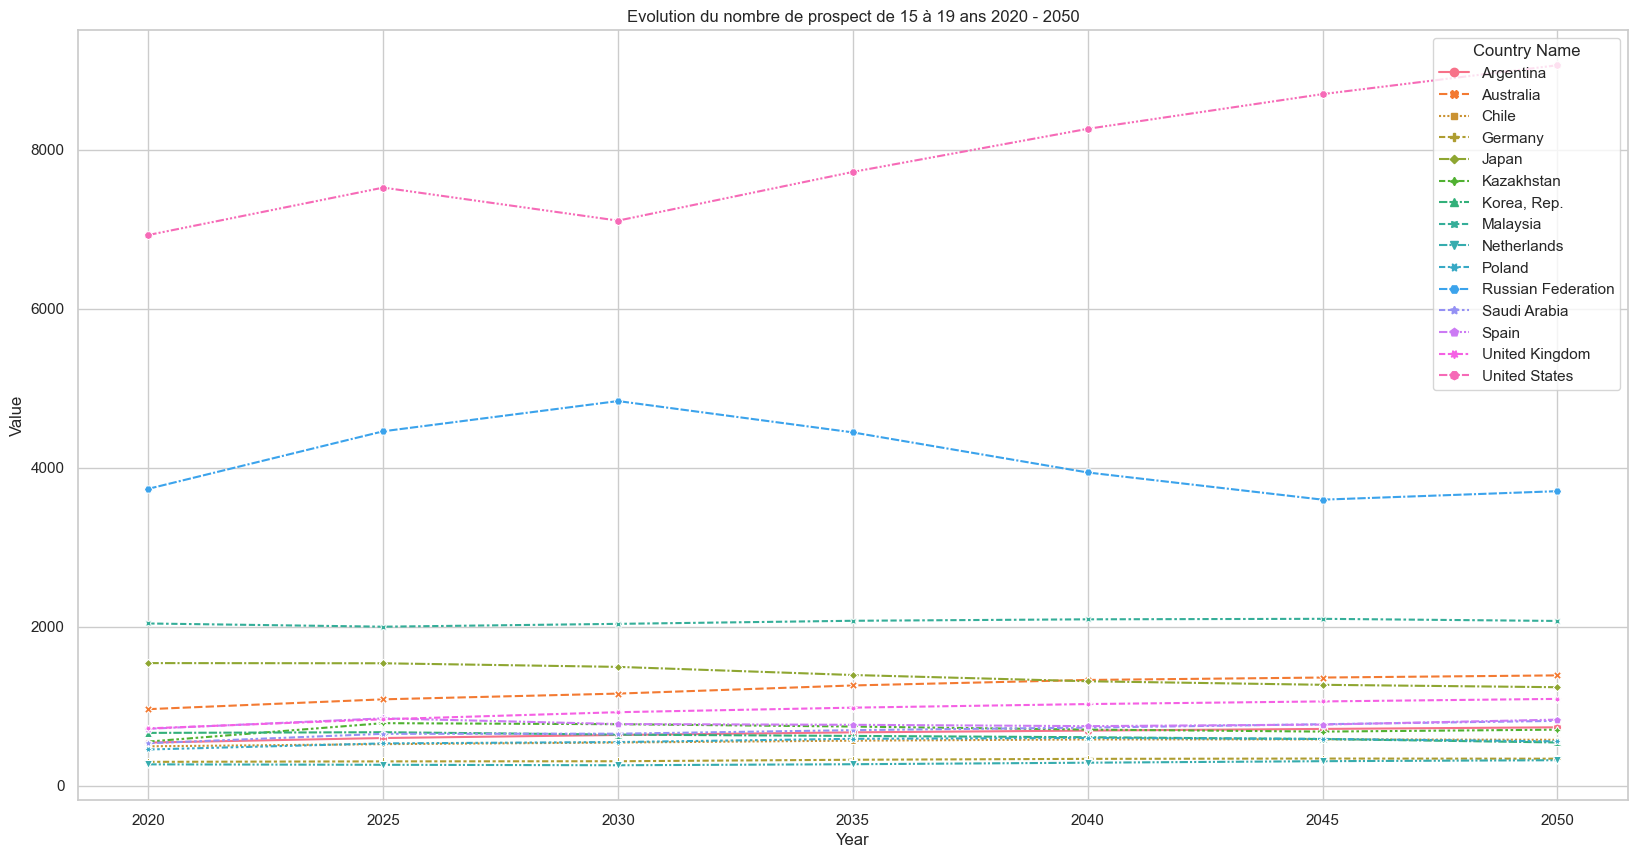

In [132]:
plt.figure(figsize = (20,10))
plt.title('Evolution du nombre de prospect de 15 à 19 ans 2020 - 2050')
sns.lineplot(data= df_projection_1519, x="Year", y="Value", hue="Country Name", style="Country Name", markers=True )
plt.show()

In [133]:
df_projection_all4_group = df_projection_all4.groupby('Country Name')['Value'].agg('median').reset_index()
df_projection_all4_group.columns=['Country Name','Value']
df_projection_all4_group.head(20).sort_values('Value', ascending= False)

Country Name      Value
14       United States  119972.68
4                Japan   53300.48
10  Russian Federation   27211.01
3              Germany   26669.61
6          Korea, Rep.   22867.28
13      United Kingdom   20781.95
11        Saudi Arabia   13994.95
12               Spain   13469.87
1            Australia   10343.40
7             Malaysia    9570.96
9               Poland    8355.74
0            Argentina    7205.32
5           Kazakhstan    5239.77
8          Netherlands    4998.15
2                Chile    3648.81

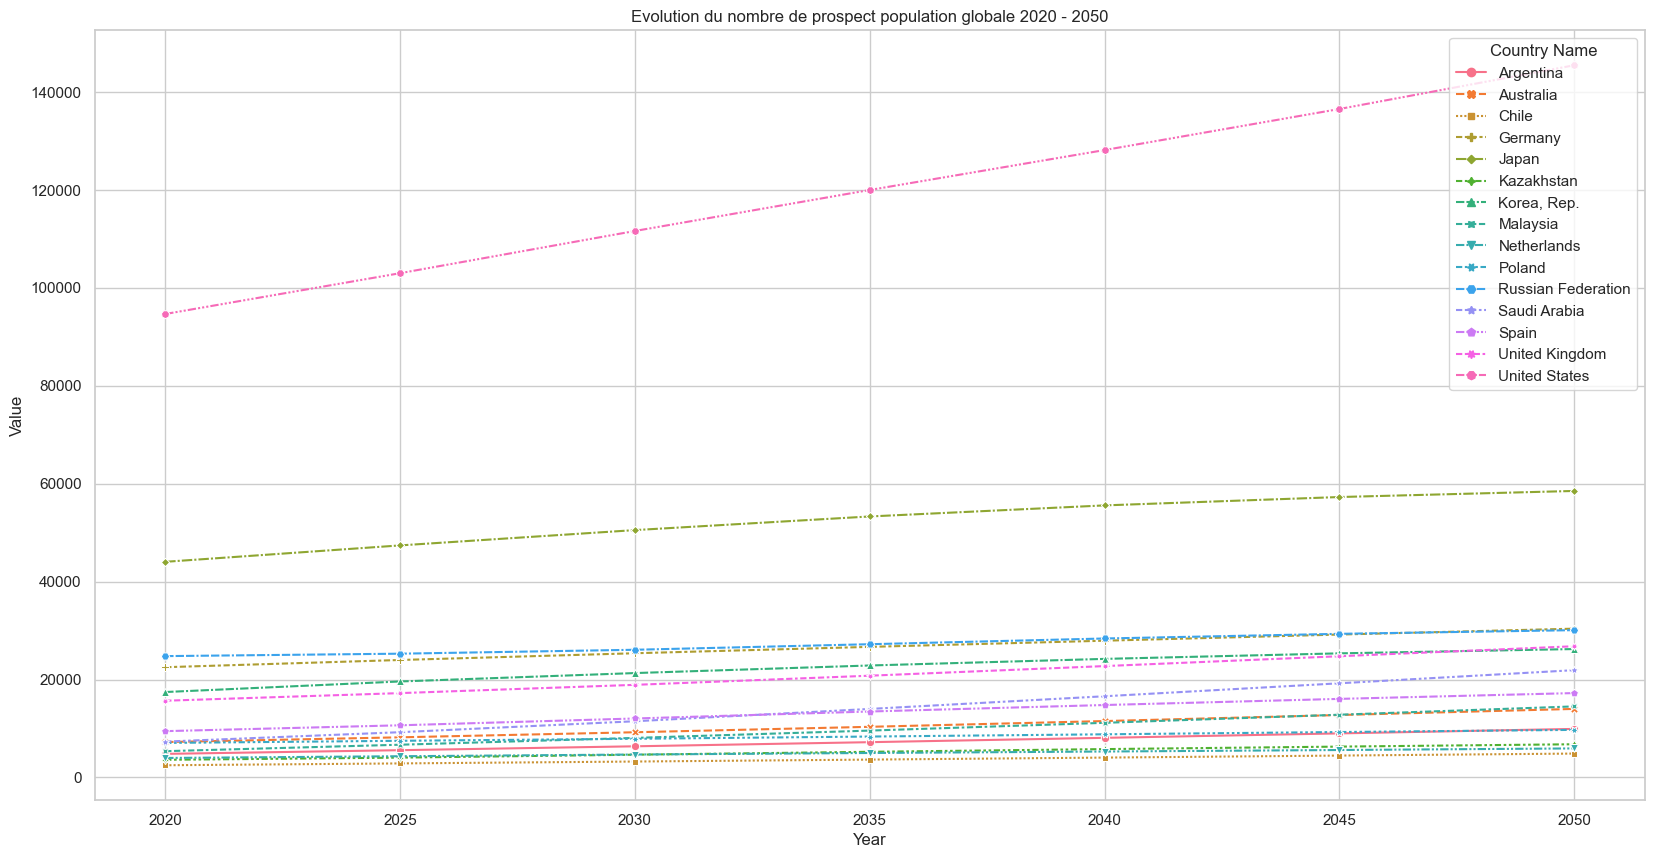

In [134]:
plt.figure(figsize = (20,10))
plt.title('Evolution du nombre de prospect population globale 2020 - 2050')
sns.lineplot(data= df_projection_all4, x="Year", y="Value", hue="Country Name", style="Country Name", markers=True)
plt.show()

L'évolution du potentiel client peut donc se mesurer sous 2 aspects, celui des 15-19 ans correspondant au viviers de clients, et celui de la croissance de population totale representant la tendance globale de l'évolution de la population. 
Les 3 pays ayant une évolution permettant de maintenir le potentiel de developpement de l'entreprise sont : 
* Les USA 
* Le Japon 
* Et l'allemagne 
Les USA et le Japon seront le marché prioritaire, car ils sont tous les 2 dans le top 5 des pays évoluant selon les 2 indicateurs. 

### Choix des pays où l'entreprise doit opérer en priorité

In [135]:
#Concatenation des dataframes
df_projection_evolution = df_projection_all4.append(df_projection_1519)
df_projection_evolution.head()

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/1193868070.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_projection_evolution = df_projection_all4.append(df_projection_1519)


Country Name Country Code  \
120930    Argentina          ARG   
131925    Australia          AUS   
241875        Chile          CHL   
359155      Germany          DEU   
450780        Japan          JPN   

                                                                                                            Indicator Name  \
120930  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
131925  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
241875  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
359155  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   
450780  Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total   

          Indicator Code  Year     Value  
120930  PRJ.POP.ALL.4.MF  2020   4815.90  
131925  PRJ.POP.ALL.4.MF  2020   7227.45  
241875  PRJ.POP.ALL.4.MF  2020   2493.65  
359155  PRJ.POP.ALL.4.MF  2020  22515.63  
450780  PRJ.POP.ALL.4.MF  2020  44038.31

In [136]:
#Création de la table pivot permettant la mise en place de la methode MinMaxScaler
df_projection_evolution_pivot= df_projection_evolution.pivot_table(index=['Country Name'], columns="Indicator Code")['Value']
df_projection_evolution_pivot.shape;

/var/folders/fm/4l9cd8f55vb4b4fb84ww8jx00000gn/T/ipykernel_41708/1872882960.py:2: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df_projection_evolution_pivot= df_projection_evolution.pivot_table(index=['Country Name'], columns="Indicator Code")['Value']


In [137]:
indicateurs_projection = ['PRJ.POP.1519.3.MF', 'PRJ.POP.ALL.4.MF']

In [138]:
df_projection_evolution_final = df_projection_evolution_pivot
proj_minmax_scale = MinMaxScaler((0,1))
df_projection_evolution_final[indicateurs_projection] = proj_minmax_scale.fit_transform(df_projection_evolution_final[indicateurs_projection])

In [139]:
#Création de l'indicateur composite
df_projection_evolution_final['indicateur_composite'] = (df_projection_evolution_final['PRJ.POP.1519.3.MF'] + df_projection_evolution_final['PRJ.POP.ALL.4.MF'])

In [140]:
#Uniformisation des valeurs des indicateurs
projection_minmax = MinMaxScaler((0,100))
df_projection_evolution_final['indicateur_composite']=projection_minmax.fit_transform(np.array(df_projection_evolution_final['indicateur_composite']).reshape(-1, 1))

In [141]:
df_projection_evolution_final.head(10)

Indicator Code  PRJ.POP.1519.3.MF  PRJ.POP.ALL.4.MF  indicateur_composite
Country Name                                                             
Argentina                 0.04905           0.03108               3.46330
Australia                 0.12320           0.05851               8.57085
Chile                     0.03549           0.00000               1.21862
Germany                   0.00528           0.19711               9.61087
Japan                     0.14653           0.41901              27.87118
Kazakhstan                0.05575           0.01321               2.90155
Korea, Rep.               0.04443           0.16144               9.78546
Malaysia                  0.23325           0.05226              13.78999
Netherlands               0.00000           0.01126               0.00000
Poland                    0.03556           0.04048               3.25740

In [142]:
#Classement des pays par ordre décroissant
df_projection_evolution_final = df_projection_evolution_final.groupby('Country Name')['indicateur_composite'].agg('median').reset_index()
df_projection_evolution_final.columns=['Country Name','indicateur_composite']
df_projection_viz = df_projection_evolution_final.sort_values('indicateur_composite', ascending= False)
df_projection_viz

Country Name  indicateur_composite
14       United States             100.00000
10  Russian Federation              34.87446
4                Japan              27.87118
7             Malaysia              13.78999
13      United Kingdom              11.32426
6          Korea, Rep.               9.78546
3              Germany               9.61087
1            Australia               8.57085
12               Spain               6.91590
11        Saudi Arabia               6.73102
0            Argentina               3.46330
9               Poland               3.25740
5           Kazakhstan               2.90155
2                Chile               1.21862
8          Netherlands               0.00000

<AxesSubplot: >

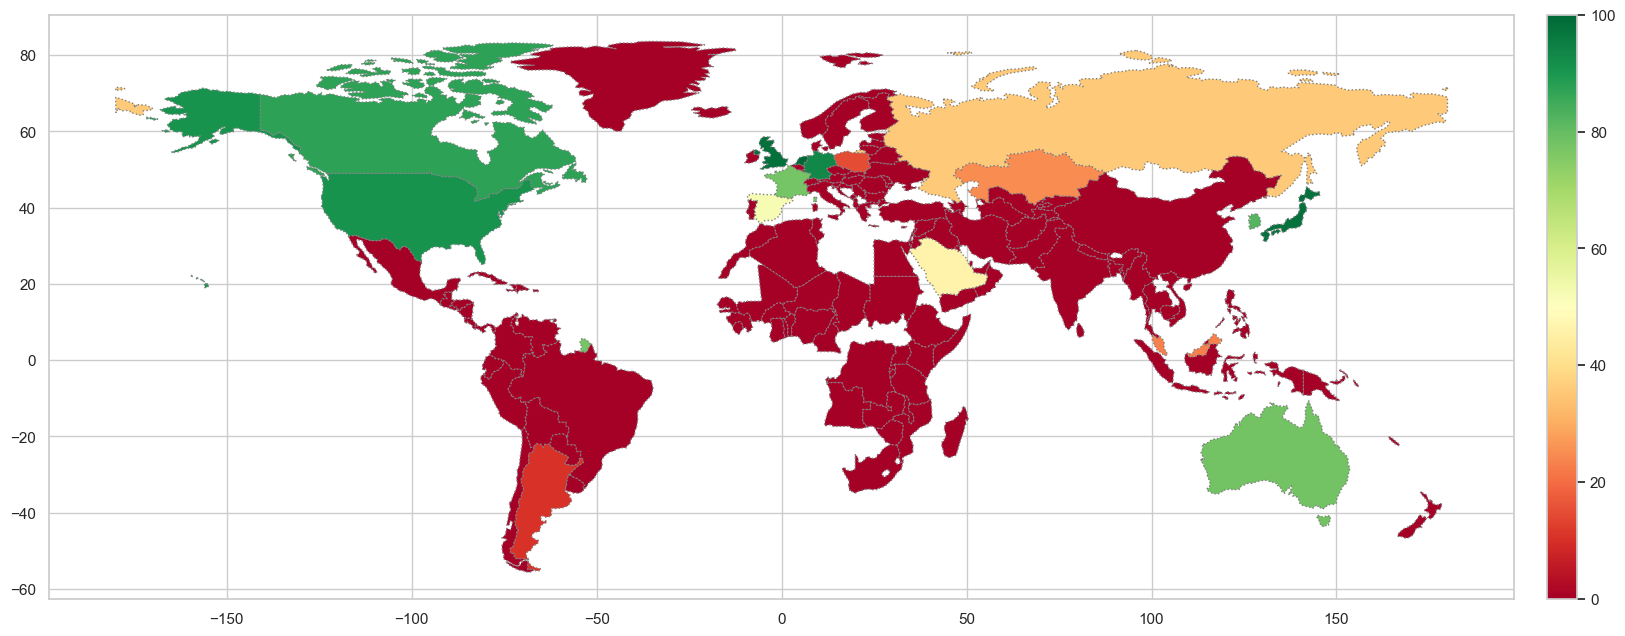

In [143]:
#Importation du dataset des pays du monde de geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) 
world.loc[world.index[[4,11,17,18, 149,66,67,153,163,80,107,105,152,108,40,157,96]], 'name'] = ["United States", "Congo, Dem. Rep.","Dominican Republic","Russian Federation","Brunei Darussalam","Central African Republic","Congo, Rep.","Czech Republic","Egypt, Arab Rep.","Gambia, The","Iran, Islamic Rep.","Kyrgyz Republic","Slovak Republic","Syrian Arab Republic","Venezuela, RB", "Yemen, Rep.","Korea, Rep."]

geomap_proj = world.merge(df_projection_viz, left_on = 'name', right_on = 'Country Name')[['geometry','Country Name','indicateur_composite']]
geomap_proj_clean = geomap_df.fillna(0)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots()
fig.set_size_inches(20,12)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.1)
geomap_proj_clean.plot(column=geomap_proj_clean['indicateur_composite'], legend = True, ax=ax, cax=cax, cmap='RdYlGn',linestyle=":",edgecolor='grey' )

L'uniformisation des variables d'évolution des 15 - 19 ans et de population globale permet d'obtenir un classement des pays ayant potentiel d'évolution démographique satisfaisant. La liste des 5 pays retenus pour s'implanter va nous servir de référence et nous établirons un classement de ces pays en 3 degrés : 
* Cible prioritaire : les Etats Unis d'Amérique, le Japon et le Royaume-Uni
* Cible secondaire : L'Allemagne
* Cible mineure : Les Pays bas